In [ ]:
# detecting acquiescence bias and correcting for it in value scales

# https://link.springer.com/article/10.1007/s11135-024-01891-0

In [ ]:
### TODO

## replicate Swatton process with a different variable/different wave
    ## empathy variables in Wave 20 (just need to change processing) DONE -> weak corr on Acq! (but also other vars!) DONE
    ## setup to run on other variables/waves XX (2) DONE
    ### processing is in python, scripts still run in R, setup to run over a bunch of variables then hit run DONE
    
    
## replicate Confirmatory Factor Analysis in Python
    ## semopy/factor_analyzer  
    ## try to replicate simple version of swatton model XXXXXXX

## get cronbach's alpha values for variable sets - DONE (think about automated testing to drop/retain/add)

## identify other balanced value sets - DONE
## automated search for other value sets?

## other ways of trying to fish directly for "acquiescence factor"? DONE
    ## try to improve the 'generalised acquiescence average' DONEish
    ## try to merge/average over the various Acq values   XXXXXXXX
    
## read around acquiesecence bias DONE ISH

## Evaluate Value Set XX (3) XXXXXXX
    ## Start with the measures he uses (looks more like balanced dataset values)
    ## Include easy stuff like "less cross-correlation between datasets?"
    ## Maybe also look at regressor power wrt stuff like voting behaviour

In [1]:
%%time
dataset_name = "W25_comb"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

Toggle code

var_type (10365, 13)
CPU times: total: 2min 28s
Wall time: 3min 20s


In [2]:
BES_reduced_with_na.index = BES_Panel.index

In [3]:
import pingouin as pg
import pyreadr
import semopy

def fix_df_var_names(df):
    df.columns = [x.split("__")[0] for x in df.columns]
    return df

In [ ]:
# Phil Swatton uses wave 14 BESIP because it has some balanced datasets

# empathy and zero(sum)

In [ ]:
zero_acq_dict = {"zero1":True,"zero4":True,"zero5":False,"zero7":True,"zero9":False,"zero11":False}

In [ ]:
# • zero1: One person’s loss is another person’s gain (zero-sum)
# • zero4: There’s only so much to go around. Life is about how big a slice of the pie you
# can get. (zero-sum)
# • zero5: Life isn’t about winners and losers, everyone can do well (everyone can win)
# • zero7: The only way to make someone better off is to make someone else worse off
# (zero-sum)
# • zero9: There are ways to make everyone better off without anyone losing out (everyone
# can win)
# • zero11: Everyone can be a winner at the same time (everyone can win)

In [ ]:
emp_acq_dict = {"empathy1":True,"empathy2":True,"empathy3":True,"empathy4":False,"empathy5":True,
                "empathy6":True,"empathy7":False,"empathy8":False,"empathy9":False,"empathy10":False,
               }

In [ ]:
# • empathy1: I can usually figure out when my friends are scared (empathetic)
# • empathy2: I can usually realize quickly when a friend is angry (empathetic)
# • empathy3: I can usually figure out when people are cheerful (empathetic)
# • empathy4: I am not usually aware of my friends’ feelings (unempathetic)
# • empathy5: When someone is feeling ‘down’ I can usually understand how they feel (empathetic)
# • empathy6: After being with a friend who is sad about something, I usually feel sad (empathetic)
# • empathy7: My friends’ unhappiness doesn’t make me feel anything (unempathetic)
# • empathy8: Other people’s feelings don’t bother me at all (unempathetic)
# • empathy9: I don’t become sad when I see other people crying (unempathetic)
# • empathy10: My friends’ emotions don’t affect me much (unempathetic)

In [ ]:
## crudest measure is simply subtracting for each individual

In [124]:
search(BES_Panel,"empathy|zeroSum")

groupempathy1W14    7691
groupempathy2W14    7691
groupempathy3W14    7691
groupempathy4W14    7691
empathy1W14         7691
empathy2W14         7691
empathy3W14         7691
empathy4W14         7691
empathy5W14         7691
empathy6W14         7691
empathy7W14         7691
empathy8W14         7691
empathy9W14         7691
empathy10W14        7691
zeroSum7W14         7939
zeroSum11W14        7939
zeroSum5W14         7939
zeroSum9W14         7939
zeroSum1W14         7939
zeroSum4W14         7939
empathy1W20         7900
empathy2W20         7900
empathy3W20         7900
empathy4W20         7900
empathy5W20         7900
empathy6W20         7900
empathy7W20         7900
empathy8W20         7900
empathy9W20         7900
empathy10W20        7900
cogempathyIRTW14    7430
affempathyIRTW14    7417
zeroSumIRTW14       7776
dtype: int64

In [21]:
zero_pos = BES_Panel[["zeroSum1W14","zeroSum4W14","zeroSum7W14" ]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).mean(axis=1)
zero_neg = BES_Panel[["zeroSum5W14","zeroSum9W14","zeroSum11W14"]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).mean(axis=1)

emp_pos = BES_Panel[["empathy1W14","empathy2W14","empathy3W14","empathy6W14","empathy5W14"  ]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).mean(axis=1)
emp_neg = BES_Panel[["empathy4W14","empathy7W14","empathy8W14","empathy9W14","empathy10W14" ]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).mean(axis=1)


In [76]:
zero_gap = ((zero_pos-zero_pos.mean())/zero_pos.std()) - ((zero_neg-zero_neg.mean())/zero_neg.std())
emp_gap = ((emp_pos-emp_pos.mean())/emp_pos.std()) - ((emp_neg-emp_neg.mean())/emp_neg.std())
# emp_gap  = emp_pos  - emp_neg
mask = (zero_gap.notnull())&(emp_gap.notnull())

<Axes: >

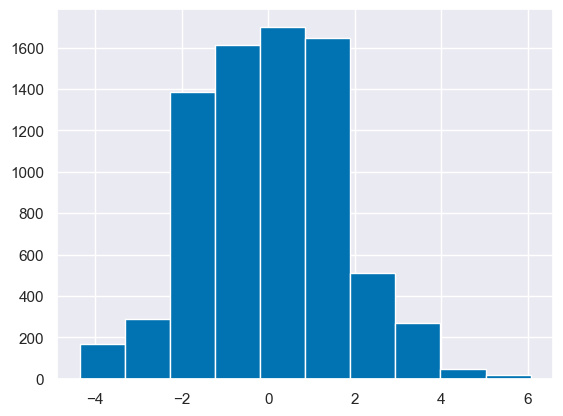

In [77]:
zero_gap.dropna().hist()

In [78]:
emp_gap.dropna()

id
18      -0.006036
19       2.957733
24      -1.820308
29      -0.146840
40      -3.809236
           ...   
75174    1.425070
75175   -0.146840
75176    1.808236
75179   -0.146840
75180    0.377130
Length: 7392, dtype: float64

In [79]:
zero_gap[mask].corr(emp_gap[mask])

nan

In [50]:
(zero_gap.notnull() & emp_gap.notnull())

id
1         False
2         False
3         False
4         False
5         False
          ...  
113062    False
113063    False
113064    False
113065    False
113066    False
Length: 111621, dtype: bool

In [55]:
zero_gap[emp_gap.notnull()].dropna()

Series([], dtype: float64)

<Axes: >

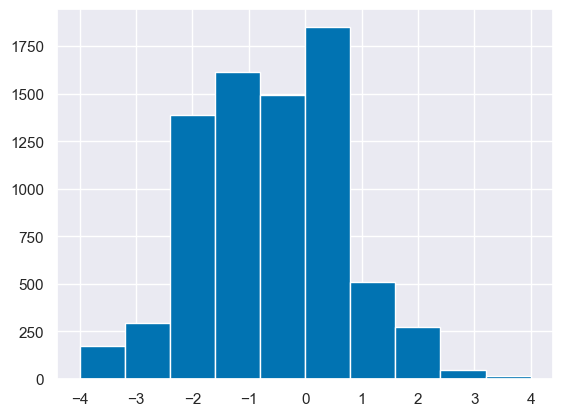

In [56]:
zero_gap.hist()

In [80]:
mask = zero_gap.notnull()
zero_acq_corrs = BES_reduced_with_na[mask].corrwith(zero_gap[mask])

In [81]:
mask = emp_gap.notnull()
emp_acq_corrs = BES_reduced_with_na[mask].corrwith(emp_gap[mask])

In [82]:
zero_acq_corrs.corr(emp_acq_corrs)

-0.43931627560925973

In [85]:
zero_acq_corrs.dropna().sort_values().tail(10)

leftRightW9__Right                                    0.348378
ldPriorities_noneW17_Yes                              0.352400
euID5W7__Strongly agree                               0.367001
handleMIIUKIPW4__Very well                            0.368536
handleMIIUKIPW9__Very well                            0.396236
pidRuinDayW3__Strongly agree                          0.492005
zeroSum1W14__Strongly agree                           0.566903
zeroSum4W14__Strongly agree                           0.618897
winConstituencyBrexitW16__100 - Very likely to win    0.647016
zeroSum7W14__Strongly agree                           0.691935
dtype: float64

In [86]:
emp_acq_corrs.dropna().sort_values().tail(10)

cuKnow4W16_False                 0.422729
winConstituencyGreenW16__98.0    0.482597
cspl1W7__Very often              0.500370
empathy6W14__Strongly agree      0.542745
empathy1W14__Strongly agree      0.601521
empathy3W14__Strongly agree      0.605430
empathy5W14__Strongly agree      0.614717
empathy2W14__Strongly agree      0.622523
cogempathyIRTW14                 0.773328
affempathyIRTW14                 0.834124
dtype: float64

In [91]:
strongly_agreeable = BES_reduced_with_na[search(BES_reduced_with_na,"__Strongly agree").index].mean(axis=1)

In [230]:
agree_df =BES_reduced_with_na[search(BES_reduced_with_na,"__Strongly agree").index]
agree_df = (agree_df-agree_df.mean())/agree_df.std()


difficultBlameCoalitionW1__Strongly agree  \
id                                                  
1                                        0.610439   
2                                       -1.244449   
3                                        0.610439   
4                                        1.537882   
5                                        0.610439   
...                                           ...   
113062                                        NaN   
113063                                        NaN   
113064                                        NaN   
113065                                        NaN   
113066                                        NaN   

        singlePartyEffectiveW1__Strongly agree  \
id                                               
1                                    -1.335810   
2                                     0.578598   
3                                     0.578598   
4                                    -1.335810   
5                                    -0.378606   
...                                        ...   
113062                                     NaN   
113063                                     NaN   
113064                                     NaN   
113065                                     NaN   
113066                                     NaN   

        coalitionInTuneW1__Strongly agree  \
id                                          
1                               -1.399470   
2                                1.333665   
3                                1.333665   
4                               -1.399470   
5                               -0.488425   
...                                   ...   
113062                                NaN   
113063                                NaN   
113064                                NaN   
113065                                NaN   
113066                                NaN   

        coalitionDontDeliverW1__Strongly agree  dutyToVote2W1__Strongly agree  \
id                                                                              
1                                    -0.716369                      -0.092984   
2                                    -1.703679                      -0.092984   
3                                    -0.716369                      -0.092984   
4                                     1.258251                      -1.122715   
5                                     0.270941                       0.936748   
...                                        ...                            ...   
113062                                     NaN                            NaN   
113063                                     NaN                            NaN   
113064                                     NaN                            NaN   
113065                                     NaN                            NaN   
113066                                     NaN                            NaN   

        socialPressureVoteW1__Strongly agree  \
id                                             
1                                  -0.546986   
2                                   0.514692   
3                                  -0.546986   
4                                  -1.608664   
5                                   0.514692   
...                                      ...   
113062                                   NaN   
113063                                   NaN   
113064                                   NaN   
113065                                   NaN   
113066                                   NaN   

        efficacyUnderstandW1__Strongly agree  \
id                                             
1                                  -0.887113   
2                                   0.262800   
3                                   0.262800   
4                                   0.262800   
5                                  -0.887113   
...                                      ...   
113062            

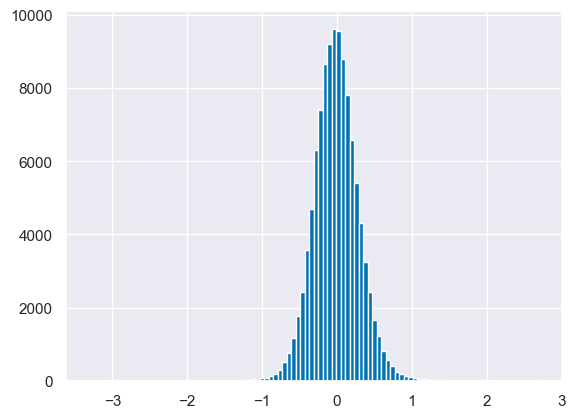

In [237]:
strongly_agreeable_normed = agree_df.mean(axis=1)
strongly_agreeable_normed.hist(bins=100);

In [281]:
agree_df =BES_reduced_with_na[search(BES_reduced_with_na,"__Strongly agree").index]
agree_df_minus_al = agree_df.drop(search(agree_df,"^al\d").index,axis=1)
agree_df_minus_al = (agree_df_minus_al-agree_df_minus_al.mean())/agree_df_minus_al.std()


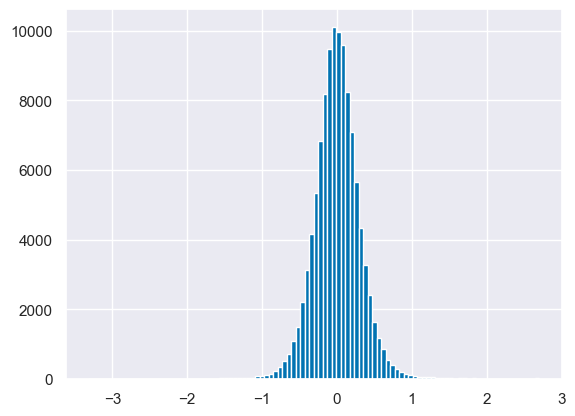

In [282]:
strongly_agreeable_normed_minus_al = agree_df_minus_al.mean(axis=1)
strongly_agreeable_normed_minus_al.hist(bins=100);

In [ ]:
agree_df =BES_reduced_with_na[search(BES_reduced_with_na,"__Strongly agree").index]
agree_df_minus_al = agree_df.drop(search(agree_df,"^al\d").index,axis=1)
agree_df_minus_al = (agree_df_minus_al-agree_df_minus_al.mean())/agree_df_minus_al.std()

strongly_agreeable_normed_minus_al = agree_df_minus_al.mean(axis=1)
strongly_agreeable_normed_minus_al.hist(bins=100);

In [92]:
strongly_agreeable_corrs = BES_reduced_with_na.corrwith(strongly_agreeable)

In [211]:
strongly_agreeable_corrs.sort_values().tail(150)[0:50]

euUndermineIdentityW7__Strongly agree            0.413728
euPriorityBalanceW10__Control immigration        0.414862
strongLeaderW17__Strongly agree                  0.415188
benevolentSexism2W19__Strongly agree             0.415684
polForTheRichW4__Strongly agree                  0.415910
euUndermineIdentityW8__Strongly agree            0.416337
al3W1_W5__Strongly agree                         0.416557
efficacyPolCareW8__Strongly agree                0.417567
populism1W17__Strongly agree                     0.417569
efficacyPolCareW2__Strongly agree                0.419944
authLong2W10__Strongly agree                     0.421631
al3W7_W9__Strongly agree                         0.421643
populism1W10__Strongly agree                     0.422940
efficacyPolCareW4__Strongly agree                0.423245
polForTheRichW2__Strongly agree                  0.423458
dealPriorityImmigW20__Extremely important        0.423704
al3W10_W12__Strongly agree                       0.424541
efficacyPolCar

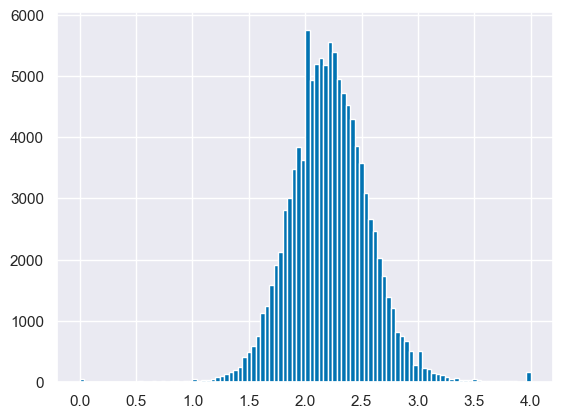

In [98]:
strongly_agreeable.hist(bins=100);

<Axes: >

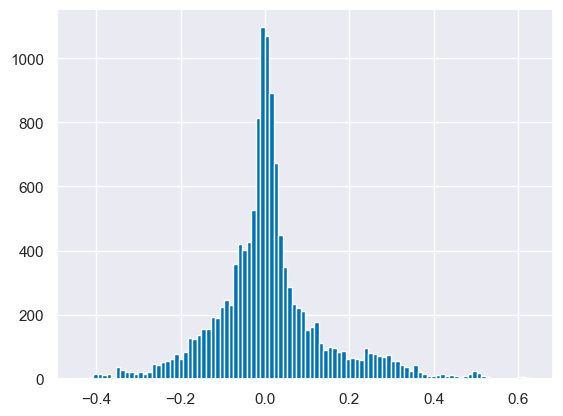

In [199]:
strongly_agreeable_corrs.hist(bins=100)

In [240]:
strongly_agreeable.corr(zero_gap),strongly_agreeable.corr(emp_gap)

(0.148813348349926, 0.04846483808792786)

In [241]:
strongly_agreeable.corr(ocfa2E_df["Acq"]),strongly_agreeable.corr(ocfa2Z_df["Acq"]),

(0.21851079020690203, 0.48109213943837914)

In [238]:
strongly_agreeable_normed.corr(zero_gap),strongly_agreeable_normed.corr(emp_gap)

(0.12134879407316007, 0.09899427549377857)

In [243]:
strongly_agreeable_normed.corr(ocfa2E_df["Acq"]),strongly_agreeable_normed.corr(ocfa2Z_df["Acq"]),

(0.2554642279531894, 0.4857485838568471)

In [244]:
strongly_agreeable_normed_corrs = BES_reduced_with_na.corrwith(strongly_agreeable_normed)

In [248]:
strongly_agreeable_normed_corrs.sort_values().tail(50)

al5W10_W12__Strongly agree                  0.466028
immigrantsWelfareStateW3__Strongly agree    0.466122
pidPraiseGoodW14__Strongly agree            0.466284
al2W6__Strongly agree                       0.467102
antiIntellectualW11__Strongly agree         0.467424
euID7W15__Strongly agree                    0.467940
al2W1_W5__Strongly agree                    0.468332
al5W6__Strongly agree                       0.469196
euID7W14__Strongly agree                    0.469492
populism5W7__Strongly agree                 0.469738
euID7W16__Strongly agree                    0.473134
overseasAidW11__Strongly agree              0.473724
al1W6__Strongly agree                       0.474494
al5W1_W5__Strongly agree                    0.474570
overseasAidW10__Strongly agree              0.475957
al1W10_W12__Strongly agree                  0.476260
polForTheRichW1__Strongly agree             0.477092
al5W7_W9__Strongly agree                    0.479450
populism5W11__Strongly agree                0.

In [ ]:
## how about trying to 'weight' the variables in the mean to try to avoid recreating the auth-scale?

# take crude mean across al_scale

In [251]:
al_scale = BES_reduced_with_na[search(BES_reduced_with_na,"al_scale").index].mean(axis=1)
al_scale_corrs = BES_reduced_with_na.corrwith(al_scale)

<Axes: >

0.13230713046747405


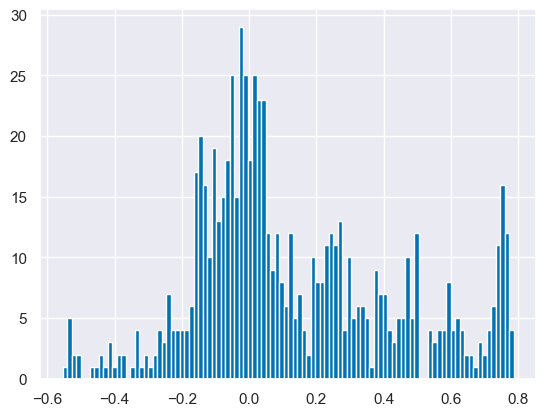

In [263]:
display(al_scale_corrs.loc[agree_df.columns].hist(bins=100));
print(al_scale_corrs.loc[agree_df.columns].mean())

0.0 -0.13005247516397497
0.01 -0.12527735485199729
0.02 -0.11683112984921079
0.03 -0.11107250213368357
0.04 -0.10194665910223906
0.05 -0.09656412276848529
0.06 -0.0931243080380153
0.07 -0.09032618610319842
0.08 -0.08705098970627852
0.09 -0.083722970764691
0.1 -0.08118161161423482
0.11 -0.07770253599663839
0.12 -0.07724228064177195
0.13 -0.07219275216044937
0.14 -0.07034761581647733
0.15 -0.06794899128188905
0.16 -0.06597531781058576
0.17 -0.06447023912814136
0.18 -0.06393924614726804
0.19 -0.06176920576792525
0.2 -0.056860569634185246
0.21 -0.054639083423430955
0.22 -0.05072735087898047
0.23 -0.04733371197737613
0.24 -0.041673072561544046
0.25 -0.036032919162122784
0.26 -0.031524188460345944
0.27 -0.02531695656054789
0.28 -0.02195141615530669
0.29 -0.02079654126452468
0.3 -0.015552531626694812
0.31 -0.013210005272914927
0.32 -0.01083531000329262
0.33 -0.007812536615294938
0.34 -0.005344514924759481
0.35000000000000003 -0.0028584766055795097
0.36 -0.0009685657053927798
0.37 -0.000322854

<Axes: >

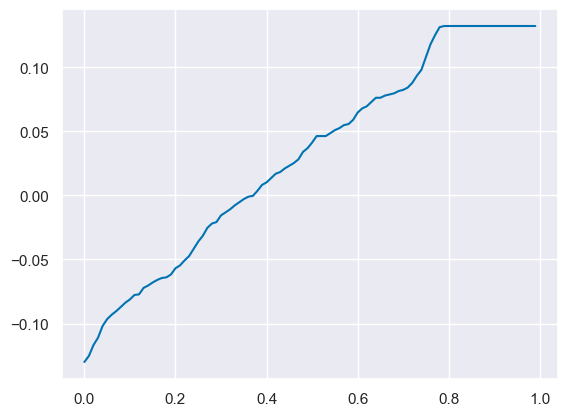

In [277]:
bias_df = pd.Series()
for thresh in np.arange(0,1,.01):
    print(thresh,al_scale_corrs.loc[agree_df.columns][al_scale_corrs.loc[agree_df.columns]<thresh].mean())
    bias_df.loc[thresh]=al_scale_corrs.loc[agree_df.columns][al_scale_corrs.loc[agree_df.columns]<thresh].mean()
sns.lineplot(bias_df)

In [278]:
al_scale_corrs.loc[agree_df.columns][al_scale_corrs.loc[agree_df.columns]>=.6].sort_values().head(50)

euUndermineIdentityW7__Strongly agree        0.600671
al4W25__Strongly agree                       0.604430
overseasAidW17__Strongly agree               0.605699
euUndermineIdentityW8__Strongly agree        0.606402
overseasAidW10__Strongly agree               0.614372
al4W10_W12__Strongly agree                   0.616135
overseasAidW14__Strongly agree               0.620584
al4W13__Strongly agree                       0.621627
immigrantsWelfareStateW10__Strongly agree    0.622269
overseasAidW12__Strongly agree               0.627742
immigrantsWelfareStateW20__Strongly agree    0.630937
govtHandoutsW20__Strongly agree              0.632599
immigrantsWelfareStateW11__Strongly agree    0.633896
overseasAidW11__Strongly agree               0.639583
immigrantsWelfareStateW2__Strongly agree     0.652850
immigrantsWelfareStateW4__Strongly agree     0.656504
immigrantsWelfareStateW1__Strongly agree     0.660495
immigrantsWelfareStateW8__Strongly agree     0.677730
immigrantsWelfareStateW3__St

In [283]:
strongly_agreeable_normed_minus_al.corr(zero_gap),strongly_agreeable_normed_minus_al.corr(emp_gap)

(0.07725202822506272, 0.11843150613411788)

In [284]:
strongly_agreeable_normed_minus_al.corr(ocfa2E_df["Acq"]),strongly_agreeable_normed_minus_al.corr(ocfa2Z_df["Acq"]),

(0.2529519849023288, 0.4463647173234848)

In [287]:
strongly_agreeable_normed_minus_al_corrs = BES_reduced_with_na.corrwith(strongly_agreeable_normed_minus_al)

In [290]:
strongly_agreeable_normed_minus_al_corrs.sort_values().tail(50)

pidMyPartyW9__Strongly agree        0.474937
euID6W14__Strongly agree            0.475334
euID3W12__Strongly agree            0.475856
polForTheRichW2__Strongly agree     0.476866
euID6W25__Strongly agree            0.477079
populism6W7__Strongly agree         0.477374
pidMyPartyW14__Strongly agree       0.477670
lr4W24__Strongly agree              0.478160
euID6W23__Strongly agree            0.479198
polForTheRichW3__Strongly agree     0.479853
euID6W17__Strongly agree            0.479977
pidConnectedW9__Strongly agree      0.480167
euID6W15__Strongly agree            0.483034
euID3W19__Strongly agree            0.483820
populism2W11__Strongly agree        0.485022
polForTheRichW4__Strongly agree     0.486669
euID7W11__Strongly agree            0.486955
lr4W1_W5__Strongly agree            0.487720
euID6W22__Strongly agree            0.489499
pidPraiseGoodW16__Strongly agree    0.491695
lr4W6__Strongly agree               0.491729
euID7W13__Strongly agree            0.491845
pidConnect

In [ ]:
###########################################

In [ ]:
# # cfa1Z$df
# cfa1Z_df <- cfa1Z$df
# save(cfa1Z_df, file = "results/cfa1Z.RData")

# cfa1E_df <- cfa1E$df
# save(cfa1E_df, file = "results/cfa1E.RData")

# cfa2Z_df <- cfa2Z$df
# save(cfa2Z_df, file = "results/cfa2Z.RData")

# cfa2E_df <- cfa2E$df
# save(cfa2E_df, file = "results/cfa2E.RData")


# ocfa1Z_df <- ocfa1Z$df
# save(ocfa1Z_df, file = "results/ocfa1Z.RData")

# ocfa1E_df <- ocfa1E$df
# save(ocfa1E_df, file = "results/ocfa1E.RData")

# ocfa2Z_df <- ocfa2Z$df
# save(ocfa2Z_df, file = "results/ocfa2Z.RData")

# ocfa2E_df <- ocfa2E$df
# save(ocfa2E_df, file = "results/ocfa2E.RData")

In [108]:
result = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\cfa1Z.RData')
cfa1Z_df = result['cfa1Z_df']
cfa1Z_df.index = cfa1Z_df["id"].astype(int)
result = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\cfa1E.RData')
cfa1E_df = result['cfa1E_df']
cfa1E_df.index = cfa1E_df["id"].astype(int)
result = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\cfa2Z.RData')
cfa2Z_df = result['cfa2Z_df']
cfa2Z_df.index = cfa2Z_df["id"].astype(int)
result = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\cfa2E.RData')
cfa2E_df = result['cfa2E_df']
cfa2E_df.index = cfa2E_df["id"].astype(int)

result = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\ocfa1Z.RData')
ocfa1Z_df = result['ocfa1Z_df']
ocfa1Z_df.index = ocfa1Z_df["id"].astype(int)
result = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\ocfa1E.RData')
ocfa1E_df = result['ocfa1E_df']
ocfa1E_df.index = ocfa1E_df["id"].astype(int)
result = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\ocfa2Z.RData')
ocfa2Z_df = result['ocfa2Z_df']
ocfa2Z_df.index = ocfa2Z_df["id"].astype(int)
result = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\ocfa2E.RData')
ocfa2E_df = result['ocfa2E_df']
ocfa2E_df.index = ocfa2E_df["id"].astype(int)

In [311]:
result = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\ocfa2EW20_df.RData')
ocfa2EW20_df = result['ocfa2EW20_df']
ocfa2EW20_df.index = ocfa2EW20_df["id"].astype(int)


In [313]:
ocfa2EW20_df.columns

Index(['id', 'weight', 'lr1', 'lr2', 'lr3', 'lr4', 'lr5', 'al1', 'al2', 'al3',
       'al4', 'al5', 'em1', 'em2', 'em3', 'em4', 'em5', 'em6', 'em7', 'em8',
       'em9', 'em10', 'edlevel', 'lrScale', 'alScale', 'emScale', 'lrcat',
       'alcat', 'edlevel2', 'LeftUncorrected', 'AuthUncorrected',
       'LeftCorrected', 'AuthCorrected', 'E', 'Acq', 'RightUncorrected',
       'RightCorrected'],
      dtype='object')

In [315]:
ocfa2EW20_df.select_dtypes('float').corrwith(ocfa1E_df.select_dtypes('float'))

id                  1.000000
weight              0.664666
lr1                 0.690693
lr2                 0.504443
lr3                 0.624415
lr4                 0.605396
lr5                 0.574647
al1                 0.709235
al2                 0.824411
al3                 0.714127
al4                 0.683991
al5                 0.703641
em1                 0.343846
em2                 0.467115
em3                 0.397827
em4                 0.324925
em5                 0.327474
em6                 0.445921
em7                 0.428654
em8                 0.471726
em9                 0.396665
em10                0.496057
lrScale             0.779031
alScale             0.875287
emScale             0.618296
LeftUncorrected     0.774539
AuthUncorrected     0.848160
LeftCorrected       0.745029
AuthCorrected       0.812481
E                   0.624145
Acq                 0.404083
RightUncorrected    0.774539
RightCorrected      0.745029
dtype: float64

In [ ]:
ocfa2EW20_df

In [330]:
# Acq                 0.404083



In [324]:
shared_inds = list(set(list(ocfa2EW20_df.index)).intersection(set(list(ocfa1E_df.index))))

In [326]:
ocfa2EW20_df.loc[ shared_inds ].select_dtypes('float').corrwith(ocfa1E_df.loc[ shared_inds ].select_dtypes('float'))

id                  1.000000
weight              0.664666
lr1                 0.690693
lr2                 0.504443
lr3                 0.624415
lr4                 0.605396
lr5                 0.574647
al1                 0.709235
al2                 0.824411
al3                 0.714127
al4                 0.683991
al5                 0.703641
em1                 0.343846
em2                 0.467115
em3                 0.397827
em4                 0.324925
em5                 0.327474
em6                 0.445921
em7                 0.428654
em8                 0.471726
em9                 0.396665
em10                0.496057
lrScale             0.779031
alScale             0.875287
emScale             0.618296
LeftUncorrected     0.774539
AuthUncorrected     0.848160
LeftCorrected       0.745029
AuthCorrected       0.812481
E                   0.624145
Acq                 0.404083
RightUncorrected    0.774539
RightCorrected      0.745029
dtype: float64

In [301]:
ocfa2E_df.sort_index().head(20)

id    weight  em1  em2  em3  em4  em5  em6  em7  em8  ...   alcat  \
id                                                            ...           
18    18.0  0.872525  2.0  3.0  2.0  1.0  2.0  2.0  1.0  1.0  ...     Lib   
19    19.0  0.465407  2.0  2.0  3.0  1.0  3.0  3.0  0.0  0.0  ...     Lib   
24    24.0  1.308983  2.0  2.0  2.0  1.0  2.0  1.0  1.0  2.0  ...     Lib   
29    29.0  0.614623  2.0  2.0  2.0  1.0  2.0  2.0  1.0  1.0  ...    Auth   
62    62.0  0.563203  2.0  2.0  2.0  0.0  3.0  2.0  1.0  1.0  ...  Centre   
99    99.0  0.637372  2.0  2.0  2.0  1.0  2.0  2.0  1.0  1.0  ...    Auth   
115  115.0  0.487063  3.0  3.0  2.0  1.0  2.0  2.0  0.0  0.0  ...    Auth   
126  126.0  0.685147  2.0  3.0  3.0  0.0  3.0  2.0  0.0  0.0  ...    Auth   
130  130.0  0.929573  2.0  2.0  2.0  1.0  3.0  1.0  1.0  1.0  ...    Auth   
135  135.0  0.521836  3.0  3.0  3.0  1.0  1.0  2.0  3.0  2.0  ...    Auth   
142  142.0  0.940134  2.0  2.0  2.0  1.0  2.0  2.0  1.0  1.0  ...  Centre   
154  154.0  0.846343  2.0  2.0  2.0  1.0  2.0  2.0  1.0  1.0  ...    Auth   
185  185.0  0.424173  2.0  2.0  2.0  1.0  2.0  2.0  1.0  1.0  ...    Auth   
190  190.0  0.784556  2.0  2.0  2.0  1.0  2.0  2.0  0.0  0.0  ...    Auth   
200  200.0  0.940214  1.0  2.0  2.0  1.0  2.0  1.0  2.0  1.0  ...  Centre   
228  228.0  0.409655  2.0  2.0  2.0  1.0  2.0  1.0  2.0  1.0  ...    Auth   
239  239.0  0.519748  2.0  2.0  2.0  1.0  2.0  1.0  1.0  1.0  ...    Auth   
243  243.0  0.955516  2.0  3.0  2.0  1.0  2.0  2.0  1.0  1.0  ...    Auth   
258  258.0  0.604216  3.0  3.0  3.0  1.0  3.0  1.0  1.0  2.0  ...    Auth   
278  278.0  0.898817  2.0  2.0  2.0  1.0  2.0  1.0  1.0  2.0  ...    Auth   

          edlevel2  LeftUncorrected  AuthUncorrected  LeftCorrected  \
id                                                                    
18        Postgrad         1.091520        -1.641124       0.806597   
19        Postgrad         1.651308        -1.660747       1.756235   
24        Postgrad         0.720021        -1.029485       0.510312   
29      GCSE/equiv        -0.494071         0.125412      -0.407875   
62             NaN         0.359634        -0.564302       0.550693   
99   A-level/equiv        -0.599298         0.978077      -0.562558   
115            NaN        -1.097644         0.264612      -0.820960   
126     GCSE/equiv         1.625197         1.054550       1.815376   
130  A-level/equiv         0.273281         0.676069       0.103473   
135            NaN         1.294769         1.395953       0.371536   
142      Undergrad        -0.596225        -0.621507      -0.533823   
154      Undergrad        -0.176573         0.975539      -0.154483   
185     Below GCSE        -0.212580         1.635866      -0.371589   
190     GCSE/equiv        -0.888087         0.281001      -0.523226   
200      Undergrad        -1.537236        -0.370370      -1.466114   
228     GCSE/equiv         1.099437         0.277775       0.814364   
239  A-level/equiv        -1.534419        -0.193165      -1.363280   
243     GCSE/equiv         1.628485         0.710387       1.034774   
258      Undergrad        -1.320093         0.982420      -1.993964   
278            NaN         0.224174        -0.335871       0.055836   

     AuthCorrected         E       Acq  RightUncorrected  RightCorrected  
id                                                                        
18       -1.790496 -0.035367  0.573673         -1.091520       -0.806597  
19       -1.403168  1.492765 -0.425039         -1.651308       -1.756235  
24       -1.137294 -1.214207  0.389265         -0.720021       -0.510312  
29        0.186092 -0.260242 -0.158447          0.494071        0.407875  
62       -0.348664  0.644777 -0.544821         -0.359634       -0.550693  
99        0.921711 -0.250118 -0.008086          0.599298        0.562558  
115       0.458693  1.148626 -0.451217          1.097644        0.820960  
126       1.288827  1.852519 -0.628873         -1.625197       -1.815376  


In [331]:
BES_reduced_with_na["strongly_agreeable_normed_minus_al"] =strongly_agreeable_normed_minus_al
BES_reduced_with_na["strongly_agreeable_normed"] =strongly_agreeable_normed
BES_reduced_with_na["strongly_agreeable"] =strongly_agreeable

In [789]:
non_agree_corrs = BES_reduced_with_na[list(set(BES_reduced_with_na.columns).difference(search(BES_reduced_with_na,"__Strongly agree").index))]\
    .corrwith(BES_reduced_with_na["strongly_agreeable_normed_minus_al"])

In [795]:
non_agree_corrs.sort_values()#.tail(50)

lr_scaleW23__Right                   -0.581372
lr_scaleW22__Right                   -0.581185
lr_scaleW24__Right                   -0.577916
lr_scaleW21__Right                   -0.565039
lr_scaleW25__Right                   -0.564776
                                        ...   
al_scaleW1_W5__Authoritarian          0.329779
al_scaleW7_W9__Authoritarian          0.347966
ocfa2EW20_Acq                         0.397510
ocfa2Z_Acq                            0.446365
strongly_agreeable_normed_minus_al    1.000000
Length: 12450, dtype: float64

In [113]:
ocfa2E_corrs = BES_reduced_with_na.corrwith(ocfa2E_df["Acq"])

In [116]:
ocfa2E_corrs.dropna().sort_values().head(20)

cuKnow4W16_False                                                                                                  -0.767663
handleMIILDW7__Very well                                                                                          -0.664747
ethno3W9__Strongly agree                                                                                          -0.625846
affempathyIRTW14                                                                                                  -0.572076
winConstituencyUKIPW16__100 - Very likely to win                                                                  -0.524586
csplRank_1W7__Least common reason                                                                                 -0.448618
cuKnow3W16_False                                                                                                  -0.436291
preferMPWorkClassW6__A lot more                                                                                   -0.430313
prPrefer

In [117]:
strongly_agreeable.corr(ocfa2E_df["Acq"])

0.21851079020690203

Top 20 positive (spearman) correlations for ocfa2EW20_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 empathy2W20__Strongly agree 
 0.560000 
 0.00 
 4372 
 
 
 empathy3W20__Strongly agree 
 0.520000 
 0.00 
 4372 
 
 
 empathy1W20__Strongly agree 
 0.480000 
 0.00 
 4372 
 
 
 empathy5W20__Strongly agree 
 0.440000 
 0.00 
 4372 
 
 
 strongly_agreeable_normed 
 0.390000 
 0.00 
 4372 
 
 
 strongly_agreeable_normed_minus_al 
 0.370000 
 0.00 
 4372 
 
 
 strongly_agreeable 
 0.340000 
 0.00 
 4372 
 
 
 ocfa2E_Acq 
 0.320000 
 0.00 
 1139 
 
 
 al_scaleW6__Authoritarian 
 0.270000 
 0.00 
 1011 
 
 
 cogempathyIRTW14 
 0.250000 
 0.00 
 1483 
 
 
 lr5W20__Strongly agree 
 0.250000 
 0.00 
 4372 
 
 
 immigrantsWelfareStateW1__Strongly agree 
 0.250000 
 0.00 
 877 
 
 
 al_scaleW1_W5__Authoritarian 
 0.250000 
 0.00 
 1120 
 
 
 al5W6__Strongly agree 
 0.240000 
 0.00 
 1048 
 
 
 al2W21__Strongly agree 
 0.240000 
 0.00 
 2167 
 
 
 immigManipCheck2W2__Very worried 
 0.230000 
 0.00 
 578 
 
 
 empathy9W20__Strongly agree 
 0.230000 
 0.00 
 4372 
 
 
 al1W1_W5__Strongly agree 
 0.230000 
 0.00 
 1161 
 
 
 empathy6W20__Strongly agree 
 0.230000 
 0.00 
 4372 
 
 
 empathy8W20__Strongly agree 
 0.230000 
 0.00 
 4372 
 
 
 

 
 Top 20 negative (spearman) correlations for ocfa2EW20_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigCulturalW2__Enriches cultural life 
 -0.220000 
 0.00 
 936 
 
 
 p_gross_householdW1__£150,000 and over 
 -0.200000 
 0.00 
 720 
 
 
 redistUKIPW7__Government should be less concerned[...] 
 -0.190000 
 0.00 
 869 
 
 
 immigSelfW9__Allow many more 
 -0.190000 
 0.00 
 1252 
 
 
 immigEconW1__Good for economy 
 -0.190000 
 0.00 
 876 
 
 
 immigExpDVW2__Strongly agree 
 -0.190000 
 0.00 
 555 
 
 
 lr_scaleW20__Right 
 -0.180000 
 0.00 
 4372 
 
 
 lr_scaleW1_W5__Right 
 -0.170000 
 0.00 
 1142 
 
 
 p_edlevelW2__Postgrad 
 -0.170000 
 0.00 
 787 
 
 
 p_education_ageW5__Still at school/Full time[...] 
 -0.170000 
 0.00 
 1068 
 
 
 likeBennettW4__Strongly like 
 -0.170000 
 0.00 
 686 
 
 
 euFinancialHelpW2__Strongly agree 
 -0.160000 
 0.00 
 915 
 
 
 likeLucasW10__Strongly like 
 -0.160000 
 0.00 
 808 
 
 
 mii_catW3_Economy-general 
 -0.160000 
 0.00 
 858 
 
 
 asylumMoreW7__Many more 
 -0.160000 
 0.00 
 1208 
 
 
 cvEconBrexitW22__Save the economy even if it[...] 
 -0.160000 
 0.00 
 823 
 
 
 likeBergerW15__Strongly like 
 -0.160000 
 0.00 
 717 
 
 
 achieveReduceImmigNoneW4_Yes 
 -0.160000 
 0.00 
 855 
 
 
 redistBrexitW25__Government should be less[...] 
 -0.160000 
 0.00 
 1008 
 
 
 partyIdStrengthW3__Not very strong 
 -0.160000 
 0.00 
 804

MSE: 0.02, MAE: 0.09, EV: 0.96, R2: 0.96


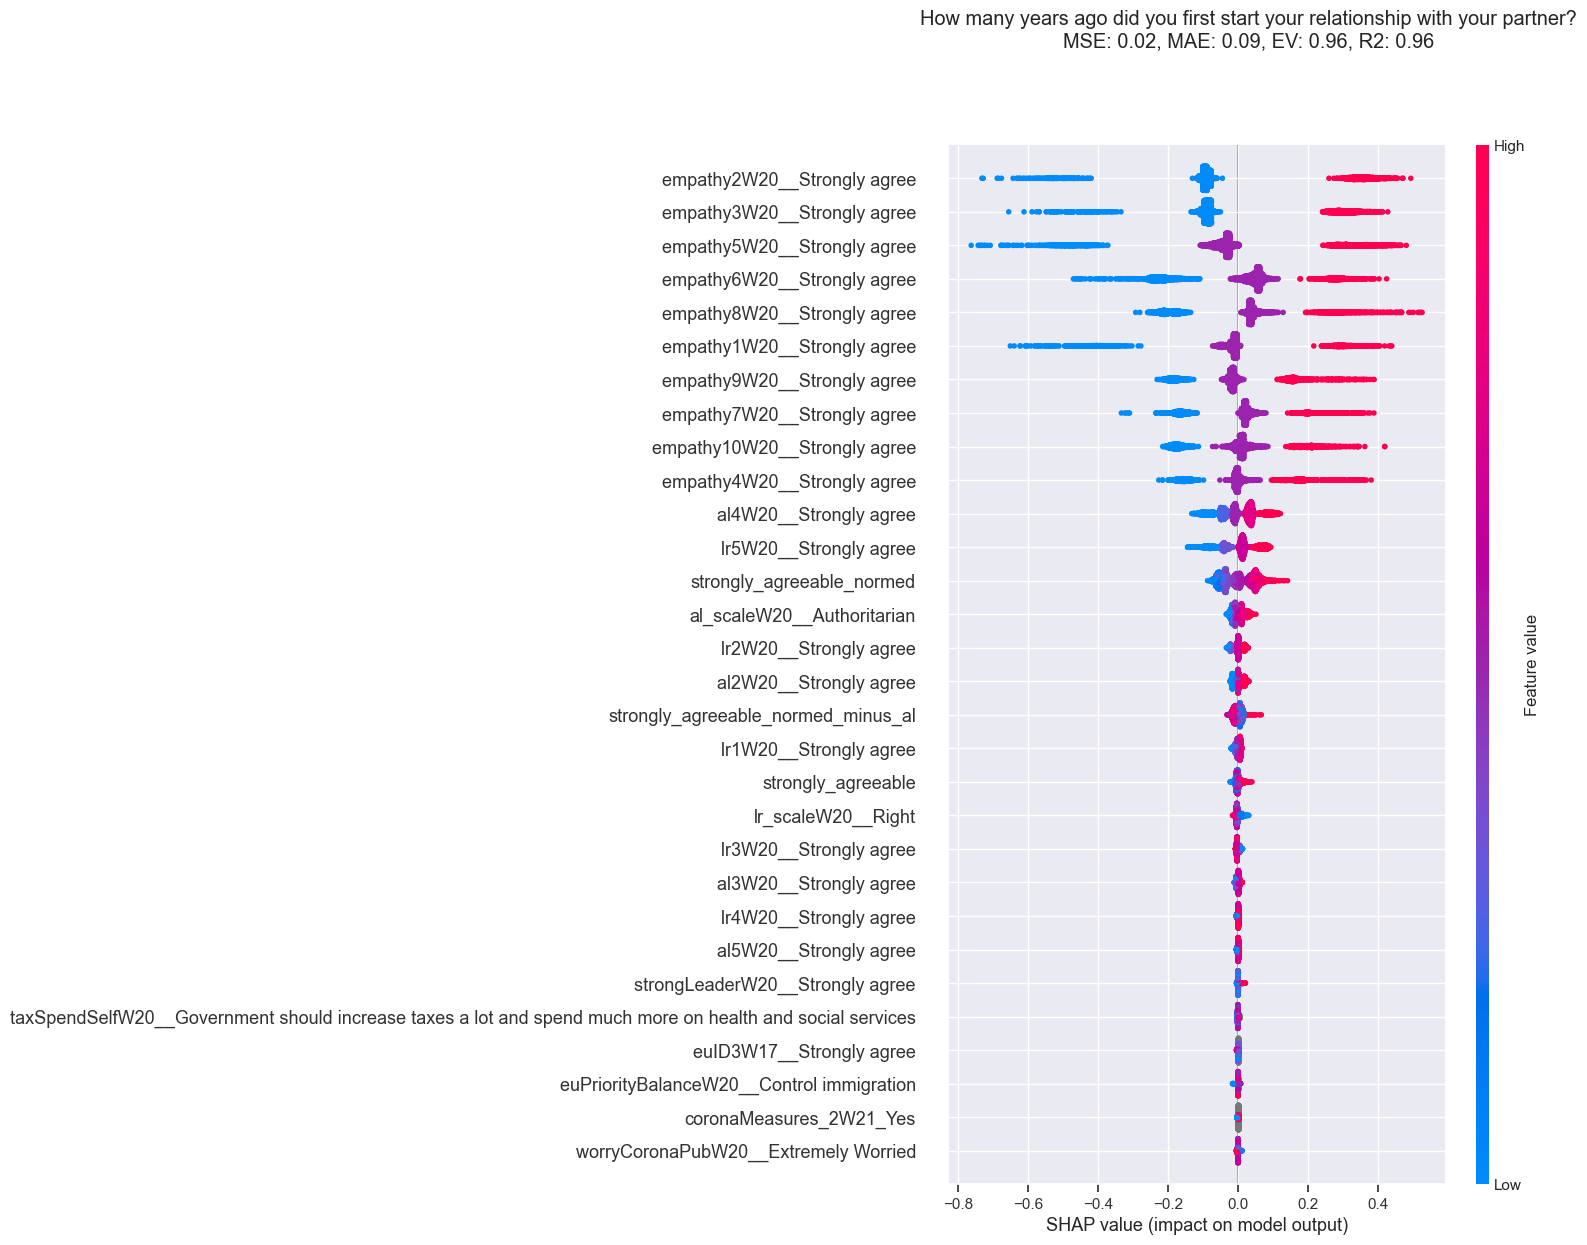

CPU times: total: 18min 52s
Wall time: 3min 24s


In [332]:
%%time
BES_reduced_with_na["ocfa2EW20_Acq"] = ocfa2EW20_df["Acq"]
name="ocfa2EW20_Acq"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

In [336]:
BES_reduced_with_na.drop(["strongly_agreeable","strongly_agreeable_normed"],axis=1,inplace=True)

Top 20 positive (spearman) correlations for ocfa2EW20_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 empathy2W20__Strongly agree 
 0.560000 
 0.00 
 4372 
 
 
 empathy3W20__Strongly agree 
 0.520000 
 0.00 
 4372 
 
 
 empathy1W20__Strongly agree 
 0.480000 
 0.00 
 4372 
 
 
 empathy5W20__Strongly agree 
 0.440000 
 0.00 
 4372 
 
 
 strongly_agreeable_normed_minus_al 
 0.370000 
 0.00 
 4372 
 
 
 ocfa2E_Acq 
 0.320000 
 0.00 
 1139 
 
 
 al_scaleW6__Authoritarian 
 0.270000 
 0.00 
 1011 
 
 
 immigrantsWelfareStateW1__Strongly agree 
 0.250000 
 0.00 
 877 
 
 
 lr5W20__Strongly agree 
 0.250000 
 0.00 
 4372 
 
 
 al_scaleW1_W5__Authoritarian 
 0.250000 
 0.00 
 1120 
 
 
 cogempathyIRTW14 
 0.250000 
 0.00 
 1483 
 
 
 al2W21__Strongly agree 
 0.240000 
 0.00 
 2167 
 
 
 al5W6__Strongly agree 
 0.240000 
 0.00 
 1048 
 
 
 empathy9W20__Strongly agree 
 0.230000 
 0.00 
 4372 
 
 
 immigManipCheck2W2__Very worried 
 0.230000 
 0.00 
 578 
 
 
 empathy6W20__Strongly agree 
 0.230000 
 0.00 
 4372 
 
 
 al1W1_W5__Strongly agree 
 0.230000 
 0.00 
 1161 
 
 
 empathy8W20__Strongly agree 
 0.230000 
 0.00 
 4372 
 
 
 al2W1_W5__Strongly agree 
 0.220000 
 0.00 
 1158 
 
 
 al5W1_W5__Strongly agree 
 0.220000 
 0.00 
 1160 
 
 
 

 
 Top 20 negative (spearman) correlations for ocfa2EW20_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigCulturalW2__Enriches cultural life 
 -0.220000 
 0.00 
 936 
 
 
 p_gross_householdW1__£150,000 and over 
 -0.200000 
 0.00 
 720 
 
 
 immigExpDVW2__Strongly agree 
 -0.190000 
 0.00 
 555 
 
 
 immigEconW2__Good for economy 
 -0.190000 
 0.00 
 929 
 
 
 redistUKIPW7__Government should be less concerned[...] 
 -0.190000 
 0.00 
 869 
 
 
 immigSelfW9__Allow many more 
 -0.190000 
 0.00 
 1252 
 
 
 lr_scaleW20__Right 
 -0.180000 
 0.00 
 4372 
 
 
 likeBennettW4__Strongly like 
 -0.170000 
 0.00 
 686 
 
 
 p_education_ageW5__Still at school/Full time[...] 
 -0.170000 
 0.00 
 1068 
 
 
 p_edlevelW2__Postgrad 
 -0.170000 
 0.00 
 787 
 
 
 lr_scaleW7_W9__Right 
 -0.170000 
 0.00 
 1480 
 
 
 asylumMoreW7__Many more 
 -0.160000 
 0.00 
 1208 
 
 
 redistBrexitW25__Government should be less[...] 
 -0.160000 
 0.00 
 1008 
 
 
 partyIdStrengthW3__Not very strong 
 -0.160000 
 0.00 
 804 
 
 
 euFinancialHelpW2__Strongly agree 
 -0.160000 
 0.00 
 915 
 
 
 likeBergerW15__Strongly like 
 -0.160000 
 0.00 
 717 
 
 
 likeLucasW10__Strongly like 
 -0.160000 
 0.00 
 808 
 
 
 cvEconBrexitW22__Save the economy even if it[...] 
 -0.160000 
 0.00 
 823 
 
 
 mii_catW3_Economy-general 
 -0.160000 
 0.00 
 858 
 
 
 achieveReduceImmigNoneW4_Yes 
 -0.160000 
 0.00 
 855

MSE: 0.41, MAE: 0.48, EV: 0.18, R2: 0.18


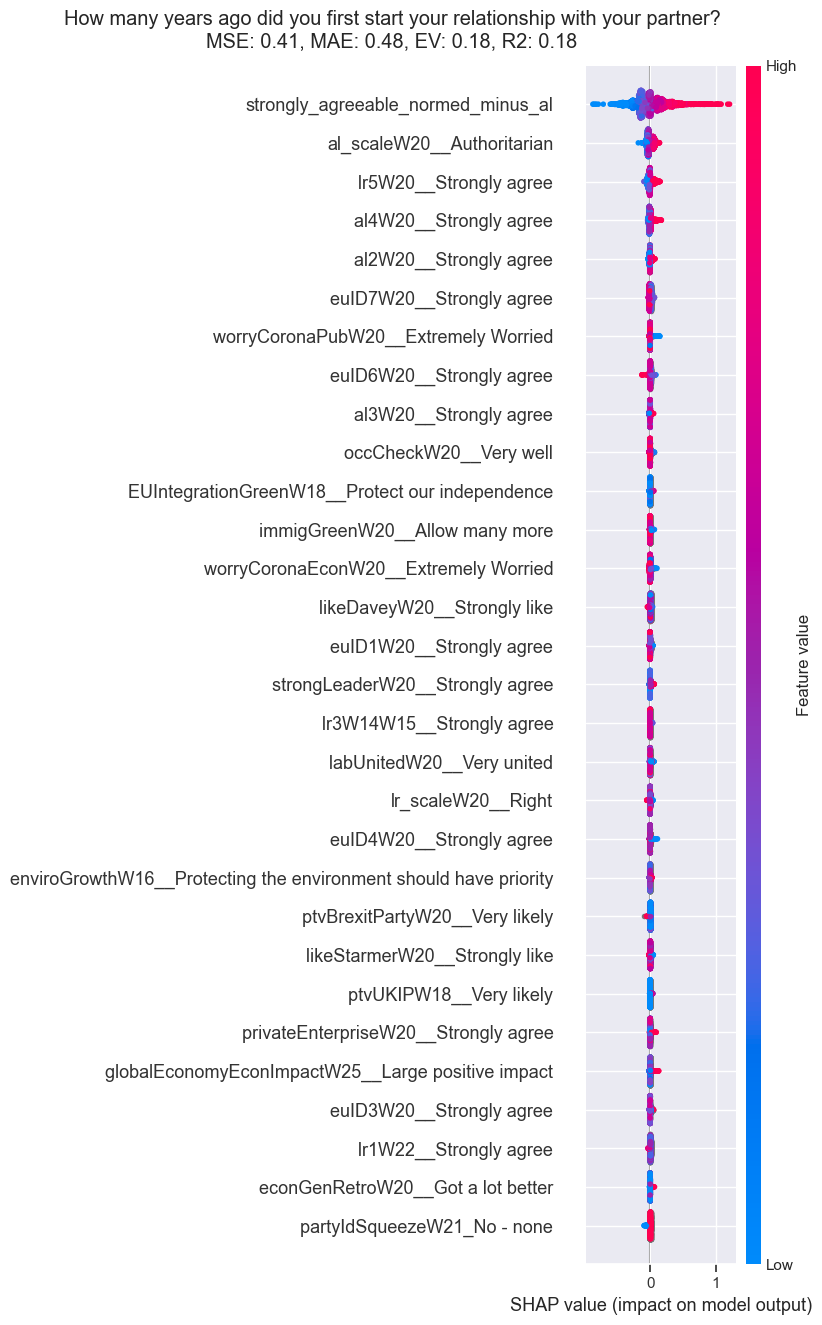

CPU times: total: 8min 54s
Wall time: 2min 16s


In [337]:
%%time
BES_reduced_with_na["ocfa2EW20_Acq"] = ocfa2EW20_df["Acq"]
name="ocfa2EW20_Acq"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,
                                                        "empathy","affempathy","cogempathy","ocfa2E_Acq",
                                                                                      
                                                                                      ],verbosity=0)

Top 20 positive (spearman) correlations for ocfa2E_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 empathy8W14__Strongly agree 
 0.510000 
 0.00 
 4478 
 
 
 empathy10W14__Strongly agree 
 0.500000 
 0.00 
 4478 
 
 
 empathy9W14__Strongly agree 
 0.470000 
 0.00 
 4478 
 
 
 empathy7W14__Strongly agree 
 0.470000 
 0.00 
 4478 
 
 
 empathy3W14__Strongly agree 
 0.330000 
 0.00 
 4478 
 
 
 empathy1W14__Strongly agree 
 0.320000 
 0.00 
 4478 
 
 
 empathy2W14__Strongly agree 
 0.320000 
 0.00 
 4478 
 
 
 empathy4W14__Strongly agree 
 0.280000 
 0.00 
 4478 
 
 
 cogempathyIRTW14 
 0.250000 
 0.00 
 4478 
 
 
 empathy5W14__Strongly agree 
 0.220000 
 0.00 
 4478 
 
 
 overseasAidW12__Strongly agree 
 0.220000 
 0.00 
 501 
 
 
 al2W13__Strongly agree 
 0.200000 
 0.00 
 2784 
 
 
 al2W10_W12__Strongly agree 
 0.200000 
 0.00 
 2701 
 
 
 al_scaleW25__Authoritarian 
 0.190000 
 0.00 
 1676 
 
 
 strongLeaderW16__Strongly agree 
 0.180000 
 0.00 
 2279 
 
 
 likeUKIPW5__Strongly like 
 0.170000 
 0.00 
 916 
 
 
 immigManipCheck2W2__Very worried 
 0.170000 
 0.00 
 1016 
 
 
 leftRightW16__Right 
 0.170000 
 0.00 
 1942 
 
 
 genderRolesW10__Strongly agree 
 0.170000 
 0.00 
 2503 
 
 
 al_scaleW10_W12__Authoritarian 
 0.160000 
 0.00 
 2600 
 
 
 

 
 Top 20 negative (spearman) correlations for ocfa2E_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 affempathyIRTW14 
 -0.520000 
 0.00 
 4478 
 
 
 blameLeave_6W9_Yes 
 -0.170000 
 0.00 
 1020 
 
 
 asylumMoreW13__Many more 
 -0.160000 
 0.00 
 2747 
 
 
 likeBerryW19__Strongly like 
 -0.150000 
 0.00 
 551 
 
 
 redistBrexitW21__Government should be less[...] 
 -0.150000 
 0.00 
 772 
 
 
 gender_Female 
 -0.150000 
 0.00 
 4478 
 
 
 redistUKIPW16__Government should be less concerned[...] 
 -0.140000 
 0.00 
 1323 
 
 
 EUIntegrationUKIPW16__Protect our independence 
 -0.140000 
 0.00 
 2022 
 
 
 competentLucasW13__A great deal of competence 
 -0.130000 
 0.00 
 2072 
 
 
 lrBrexitW21__Right 
 -0.130000 
 0.00 
 921 
 
 
 blameLeave_5W9_Yes 
 -0.130000 
 0.00 
 1020 
 
 
 EUIntegrationBrexitW21__Protect our independence 
 -0.130000 
 0.00 
 967 
 
 
 partyContactLab_5W12_Yes 
 -0.130000 
 0.00 
 653 
 
 
 prPreferenceW19_That every party's percentage of[...] 
 -0.130000 
 0.00 
 2010 
 
 
 redistConW17__Government should be less concerned[...] 
 -0.130000 
 0.00 
 1867 
 
 
 europeannessW16__Very strongly European 
 -0.130000 
 0.00 
 2321 
 
 
 customsUnionW16__Strongly support 
 -0.130000 
 0.00 
 2028 
 
 
 immigCulturalW2__Enriches cultural life 
 -0.130000 
 0.00 
 1629 
 
 
 localTurnoutRetroW23_Yes, voted 
 -0.130000 
 0.00 
 1123 
 
 
 negotiationSpecifics_2W13_Yes 
 -0.130000 
 0.00 
 2245

MSE: 0.01, MAE: 0.07, EV: 0.98, R2: 0.98


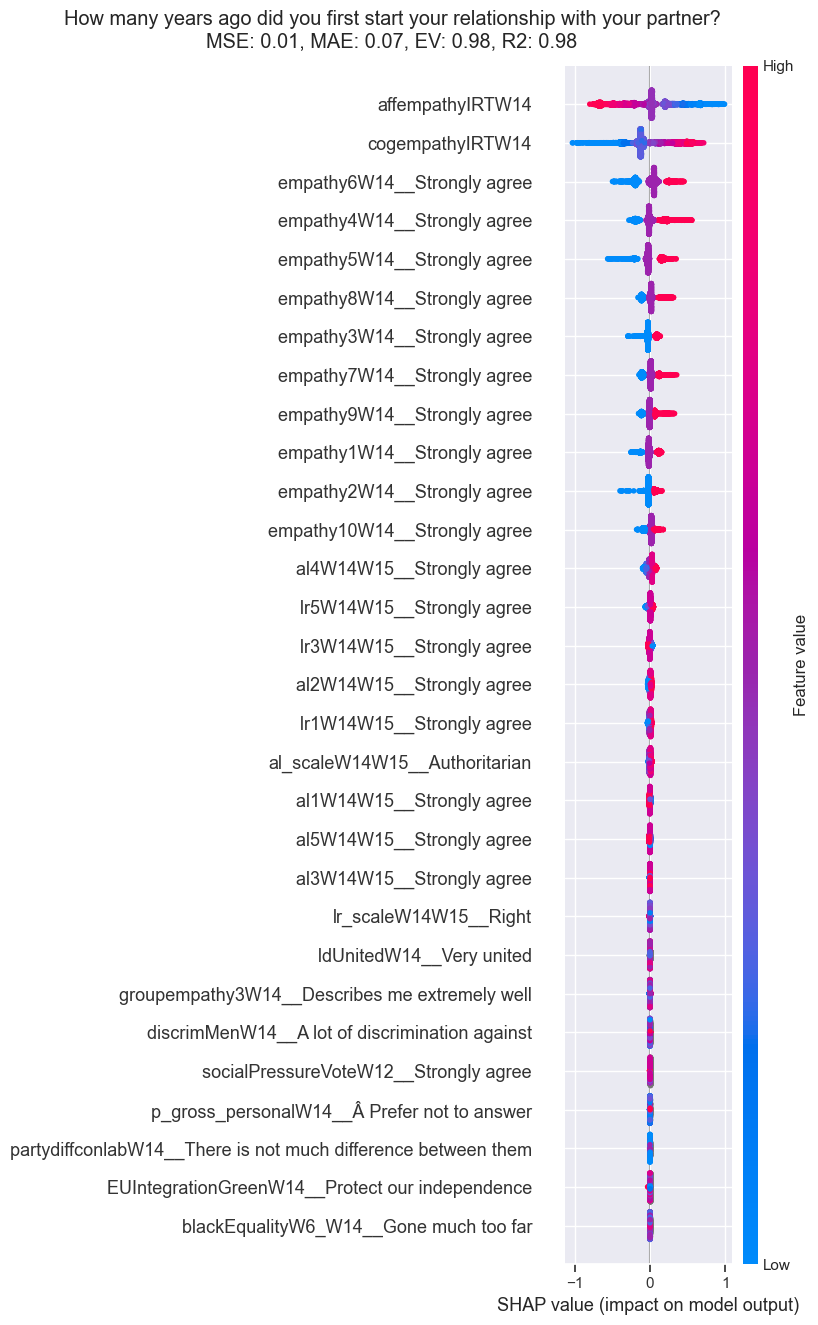

CPU times: total: 18min 39s
Wall time: 3min 39s


In [119]:
%%time
BES_reduced_with_na["ocfa2E_Acq"] = ocfa2E_df["Acq"]
name="ocfa2E_Acq"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for ocfa2E_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 empathy8W14__Strongly agree 
 0.510000 
 0.00 
 4478 
 
 
 empathy10W14__Strongly agree 
 0.500000 
 0.00 
 4478 
 
 
 empathy9W14__Strongly agree 
 0.470000 
 0.00 
 4478 
 
 
 empathy7W14__Strongly agree 
 0.470000 
 0.00 
 4478 
 
 
 empathy3W14__Strongly agree 
 0.330000 
 0.00 
 4478 
 
 
 empathy1W14__Strongly agree 
 0.320000 
 0.00 
 4478 
 
 
 empathy2W14__Strongly agree 
 0.320000 
 0.00 
 4478 
 
 
 empathy4W14__Strongly agree 
 0.280000 
 0.00 
 4478 
 
 
 cogempathyIRTW14 
 0.250000 
 0.00 
 4478 
 
 
 empathy5W14__Strongly agree 
 0.220000 
 0.00 
 4478 
 
 
 overseasAidW12__Strongly agree 
 0.220000 
 0.00 
 501 
 
 
 al2W13__Strongly agree 
 0.200000 
 0.00 
 2784 
 
 
 al2W10_W12__Strongly agree 
 0.200000 
 0.00 
 2701 
 
 
 al_scaleW25__Authoritarian 
 0.190000 
 0.00 
 1676 
 
 
 strongLeaderW16__Strongly agree 
 0.180000 
 0.00 
 2279 
 
 
 likeUKIPW5__Strongly like 
 0.170000 
 0.00 
 916 
 
 
 immigManipCheck2W2__Very worried 
 0.170000 
 0.00 
 1016 
 
 
 leftRightW16__Right 
 0.170000 
 0.00 
 1942 
 
 
 genderRolesW10__Strongly agree 
 0.170000 
 0.00 
 2503 
 
 
 al_scaleW10_W12__Authoritarian 
 0.160000 
 0.00 
 2600 
 
 
 

 
 Top 20 negative (spearman) correlations for ocfa2E_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 affempathyIRTW14 
 -0.520000 
 0.00 
 4478 
 
 
 blameLeave_6W9_Yes 
 -0.170000 
 0.00 
 1020 
 
 
 asylumMoreW13__Many more 
 -0.160000 
 0.00 
 2747 
 
 
 likeBerryW19__Strongly like 
 -0.150000 
 0.00 
 551 
 
 
 redistBrexitW21__Government should be less[...] 
 -0.150000 
 0.00 
 772 
 
 
 gender_Female 
 -0.150000 
 0.00 
 4478 
 
 
 redistUKIPW16__Government should be less concerned[...] 
 -0.140000 
 0.00 
 1323 
 
 
 EUIntegrationUKIPW16__Protect our independence 
 -0.140000 
 0.00 
 2022 
 
 
 competentLucasW13__A great deal of competence 
 -0.130000 
 0.00 
 2072 
 
 
 lrBrexitW21__Right 
 -0.130000 
 0.00 
 921 
 
 
 blameLeave_5W9_Yes 
 -0.130000 
 0.00 
 1020 
 
 
 EUIntegrationBrexitW21__Protect our independence 
 -0.130000 
 0.00 
 967 
 
 
 partyContactLab_5W12_Yes 
 -0.130000 
 0.00 
 653 
 
 
 prPreferenceW19_That every party's percentage of[...] 
 -0.130000 
 0.00 
 2010 
 
 
 redistConW17__Government should be less concerned[...] 
 -0.130000 
 0.00 
 1867 
 
 
 europeannessW16__Very strongly European 
 -0.130000 
 0.00 
 2321 
 
 
 customsUnionW16__Strongly support 
 -0.130000 
 0.00 
 2028 
 
 
 immigCulturalW2__Enriches cultural life 
 -0.130000 
 0.00 
 1629 
 
 
 localTurnoutRetroW23_Yes, voted 
 -0.130000 
 0.00 
 1123 
 
 
 negotiationSpecifics_2W13_Yes 
 -0.130000 
 0.00 
 2245

MSE: 0.54, MAE: 0.54, EV: 0.06, R2: 0.06


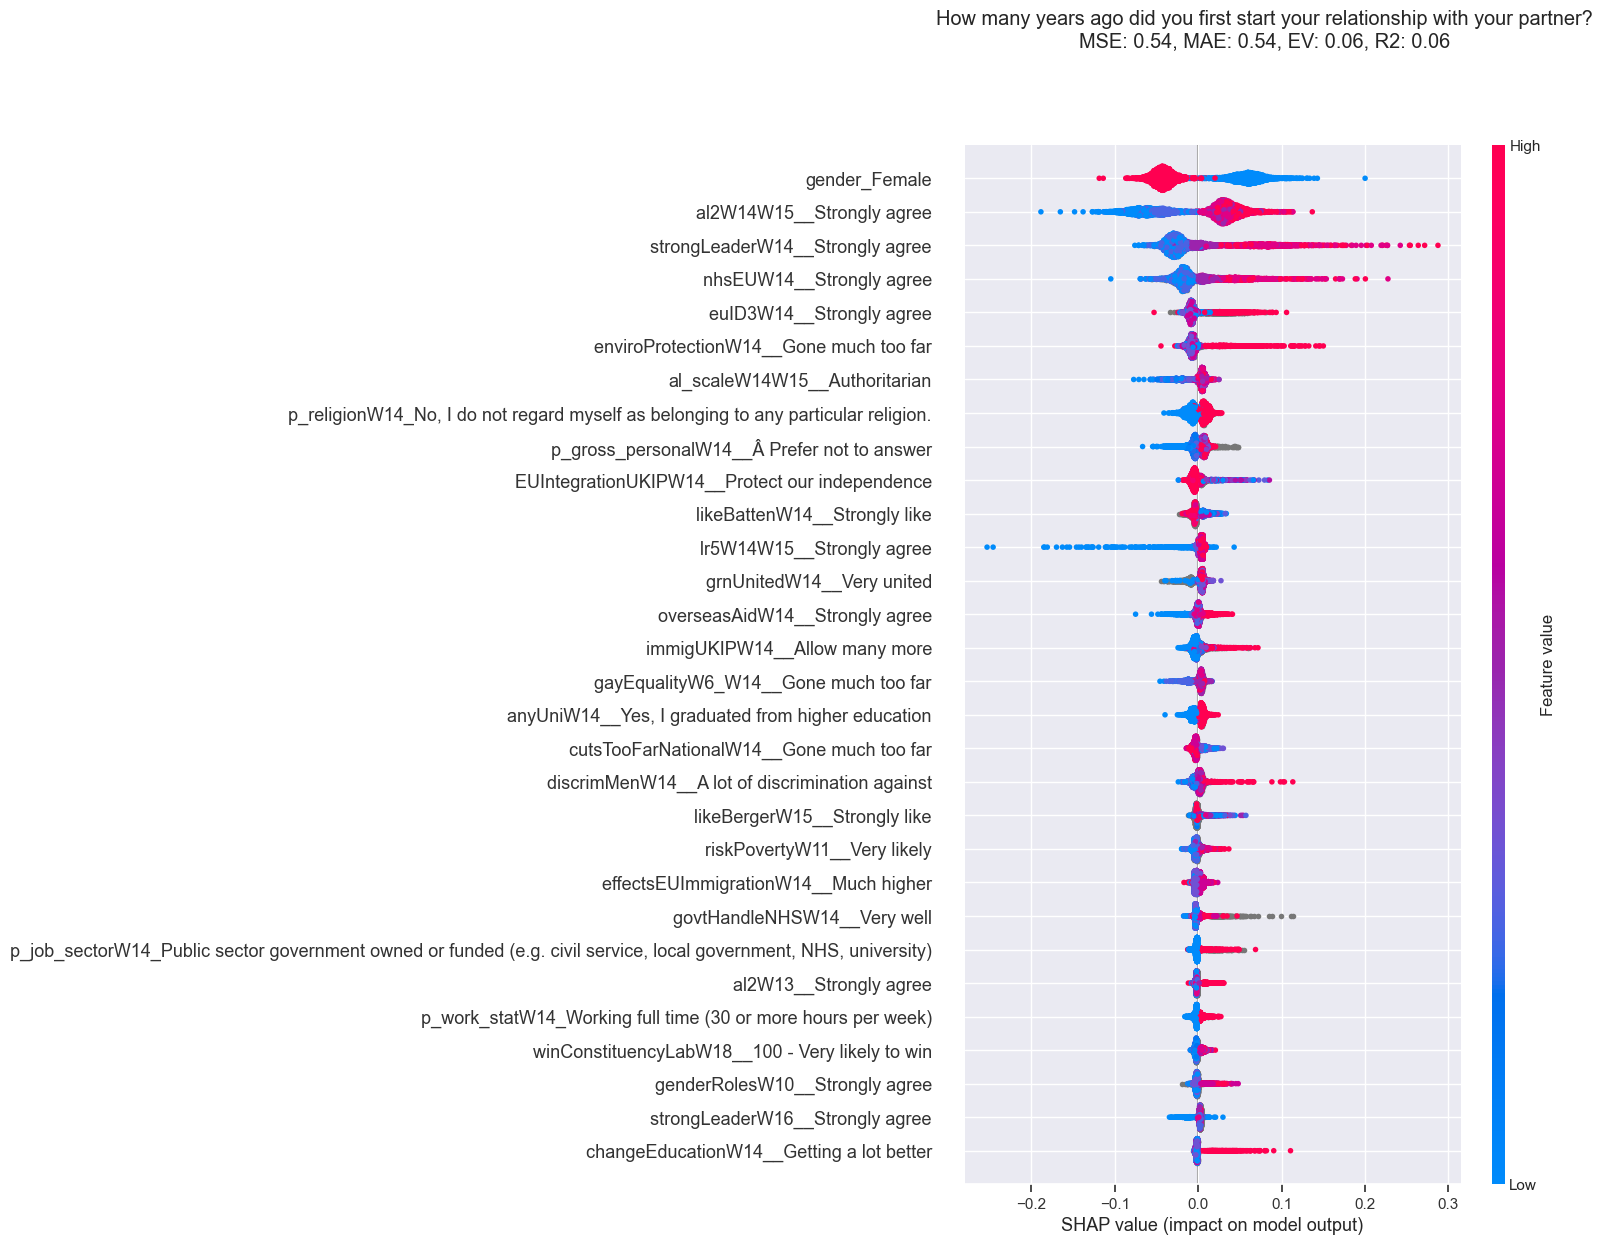

CPU times: total: 6min 8s
Wall time: 2min 18s


In [122]:
%%time
BES_reduced_with_na["ocfa2E_Acq"] = ocfa2E_df["Acq"]
name="ocfa2E_Acq"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,"empathy","affempathy","cogempathy"],verbosity=0)

Top 20 positive (spearman) correlations for ocfa2Z_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 zeroSum11W14__Strongly agree 
 0.500000 
 0.00 
 5836 
 
 
 zeroSum5W14__Strongly agree 
 0.440000 
 0.00 
 5836 
 
 
 zeroSum9W14__Strongly agree 
 0.440000 
 0.00 
 5836 
 
 
 zeroSum4W14__Strongly agree 
 0.410000 
 0.00 
 5836 
 
 
 zeroSum1W14__Strongly agree 
 0.410000 
 0.00 
 5836 
 
 
 al_scaleW14W15__Authoritarian 
 0.390000 
 0.00 
 5836 
 
 
 al_scaleW7_W9__Authoritarian 
 0.340000 
 0.00 
 3532 
 
 
 al4W14W15__Strongly agree 
 0.310000 
 0.00 
 5836 
 
 
 al1W24__Strongly agree 
 0.300000 
 0.00 
 1244 
 
 
 al2W14W15__Strongly agree 
 0.300000 
 0.00 
 5836 
 
 
 overseasAidW12__Strongly agree 
 0.300000 
 0.00 
 685 
 
 
 strongLeaderW14__Strongly agree 
 0.300000 
 0.00 
 5674 
 
 
 al5W14W15__Strongly agree 
 0.290000 
 0.00 
 5836 
 
 
 al2W10_W12__Strongly agree 
 0.280000 
 0.00 
 3603 
 
 
 al3W14W15__Strongly agree 
 0.280000 
 0.00 
 5836 
 
 
 al5W7_W9__Strongly agree 
 0.270000 
 0.00 
 3642 
 
 
 populism6W7__Strongly agree 
 0.270000 
 0.00 
 2740 
 
 
 benevolentSexism2W19__Strongly agree 
 0.270000 
 0.00 
 2761 
 
 
 al4W17_W19__Strongly agree 
 0.270000 
 0.00 
 3046 
 
 
 zeroSum7W14__Strongly agree 
 0.270000 
 0.00 
 5836 
 
 
 

 
 Top 20 negative (spearman) correlations for ocfa2Z_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 redistBrexitW24__Government should be less[...] 
 -0.270000 
 0.00 
 587 
 
 
 tryReduceInequalityGrnW4_Yes 
 -0.240000 
 0.00 
 2200 
 
 
 cvEconBrexitW21__Save the economy even if it[...] 
 -0.240000 
 0.00 
 993 
 
 
 immigSelfW12__Allow many more 
 -0.230000 
 0.00 
 661 
 
 
 p_edlevelW1__Postgrad 
 -0.230000 
 0.00 
 1787 
 
 
 redistUKIPW7__Government should be less concerned[...] 
 -0.230000 
 0.00 
 2069 
 
 
 asylumMoreW8__Many more 
 -0.220000 
 0.00 
 3262 
 
 
 p_edlevelUniW8__Postgrad 
 -0.220000 
 0.00 
 3084 
 
 
 immigEconW7__Good for economy 
 -0.200000 
 0.00 
 2850 
 
 
 lrBrexitW21__Right 
 -0.190000 
 0.00 
 1326 
 
 
 auth2W10_Self-reliance 
 -0.190000 
 0.00 
 3144 
 
 
 paperLast3_10W18_Yes 
 -0.190000 
 0.00 
 1692 
 
 
 lrUKIPW11__Right 
 -0.180000 
 0.00 
 2899 
 
 
 immigGreenW7__Allow many more 
 -0.180000 
 0.00 
 1992 
 
 
 lr_scaleW14W15__Right 
 -0.180000 
 0.00 
 5836 
 
 
 EUIntegrationUKIPW11__Protect our independence 
 -0.180000 
 0.00 
 3147 
 
 
 immigCulturalW8__Enriches cultural life 
 -0.180000 
 0.00 
 3316 
 
 
 resourceAccess3_5W7_Yes 
 -0.180000 
 0.00 
 2749 
 
 
 EUIntegrationBrexitW21__Protect our independence 
 -0.180000 
 0.00 
 1347 
 
 
 immigrationLevelW4__Increased a lot 
 -0.170000 
 0.00 
 2533

MSE: 0.01, MAE: 0.07, EV: 0.98, R2: 0.98


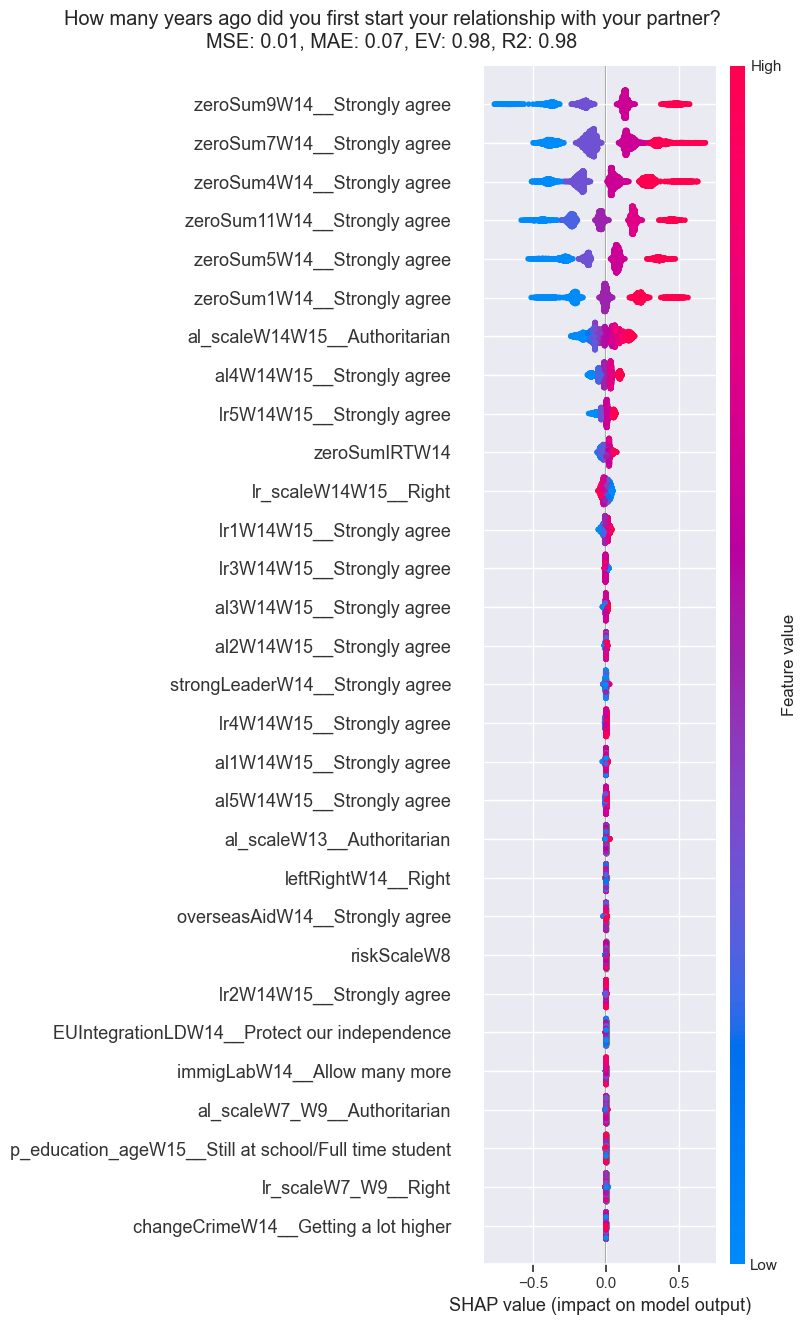

CPU times: total: 21min 16s
Wall time: 3min 59s


In [121]:
%%time
BES_reduced_with_na["ocfa2Z_Acq"] = ocfa2Z_df["Acq"]
name="ocfa2Z_Acq"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for ocfa2Z_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 zeroSum11W14__Strongly agree 
 0.500000 
 0.00 
 5836 
 
 
 zeroSum5W14__Strongly agree 
 0.440000 
 0.00 
 5836 
 
 
 zeroSum9W14__Strongly agree 
 0.440000 
 0.00 
 5836 
 
 
 zeroSum4W14__Strongly agree 
 0.410000 
 0.00 
 5836 
 
 
 zeroSum1W14__Strongly agree 
 0.410000 
 0.00 
 5836 
 
 
 al_scaleW14W15__Authoritarian 
 0.390000 
 0.00 
 5836 
 
 
 al_scaleW7_W9__Authoritarian 
 0.340000 
 0.00 
 3532 
 
 
 al4W14W15__Strongly agree 
 0.310000 
 0.00 
 5836 
 
 
 al1W24__Strongly agree 
 0.300000 
 0.00 
 1244 
 
 
 al2W14W15__Strongly agree 
 0.300000 
 0.00 
 5836 
 
 
 overseasAidW12__Strongly agree 
 0.300000 
 0.00 
 685 
 
 
 strongLeaderW14__Strongly agree 
 0.300000 
 0.00 
 5674 
 
 
 al5W14W15__Strongly agree 
 0.290000 
 0.00 
 5836 
 
 
 al2W10_W12__Strongly agree 
 0.280000 
 0.00 
 3603 
 
 
 al3W14W15__Strongly agree 
 0.280000 
 0.00 
 5836 
 
 
 al5W7_W9__Strongly agree 
 0.270000 
 0.00 
 3642 
 
 
 populism6W7__Strongly agree 
 0.270000 
 0.00 
 2740 
 
 
 benevolentSexism2W19__Strongly agree 
 0.270000 
 0.00 
 2761 
 
 
 al4W17_W19__Strongly agree 
 0.270000 
 0.00 
 3046 
 
 
 zeroSum7W14__Strongly agree 
 0.270000 
 0.00 
 5836 
 
 
 

 
 Top 20 negative (spearman) correlations for ocfa2Z_Acq 
 
 
   
 r 
 p 
 N 
 
 
 
 
 redistBrexitW24__Government should be less[...] 
 -0.270000 
 0.00 
 587 
 
 
 tryReduceInequalityGrnW4_Yes 
 -0.240000 
 0.00 
 2200 
 
 
 cvEconBrexitW21__Save the economy even if it[...] 
 -0.240000 
 0.00 
 993 
 
 
 immigSelfW12__Allow many more 
 -0.230000 
 0.00 
 661 
 
 
 p_edlevelW1__Postgrad 
 -0.230000 
 0.00 
 1787 
 
 
 redistUKIPW7__Government should be less concerned[...] 
 -0.230000 
 0.00 
 2069 
 
 
 asylumMoreW8__Many more 
 -0.220000 
 0.00 
 3262 
 
 
 p_edlevelUniW8__Postgrad 
 -0.220000 
 0.00 
 3084 
 
 
 immigEconW7__Good for economy 
 -0.200000 
 0.00 
 2850 
 
 
 lrBrexitW21__Right 
 -0.190000 
 0.00 
 1326 
 
 
 auth2W10_Self-reliance 
 -0.190000 
 0.00 
 3144 
 
 
 paperLast3_10W18_Yes 
 -0.190000 
 0.00 
 1692 
 
 
 lrUKIPW11__Right 
 -0.180000 
 0.00 
 2899 
 
 
 immigGreenW7__Allow many more 
 -0.180000 
 0.00 
 1992 
 
 
 lr_scaleW14W15__Right 
 -0.180000 
 0.00 
 5836 
 
 
 EUIntegrationUKIPW11__Protect our independence 
 -0.180000 
 0.00 
 3147 
 
 
 immigCulturalW8__Enriches cultural life 
 -0.180000 
 0.00 
 3316 
 
 
 resourceAccess3_5W7_Yes 
 -0.180000 
 0.00 
 2749 
 
 
 EUIntegrationBrexitW21__Protect our independence 
 -0.180000 
 0.00 
 1347 
 
 
 immigrationLevelW4__Increased a lot 
 -0.170000 
 0.00 
 2533

MSE: 0.40, MAE: 0.48, EV: 0.24, R2: 0.24


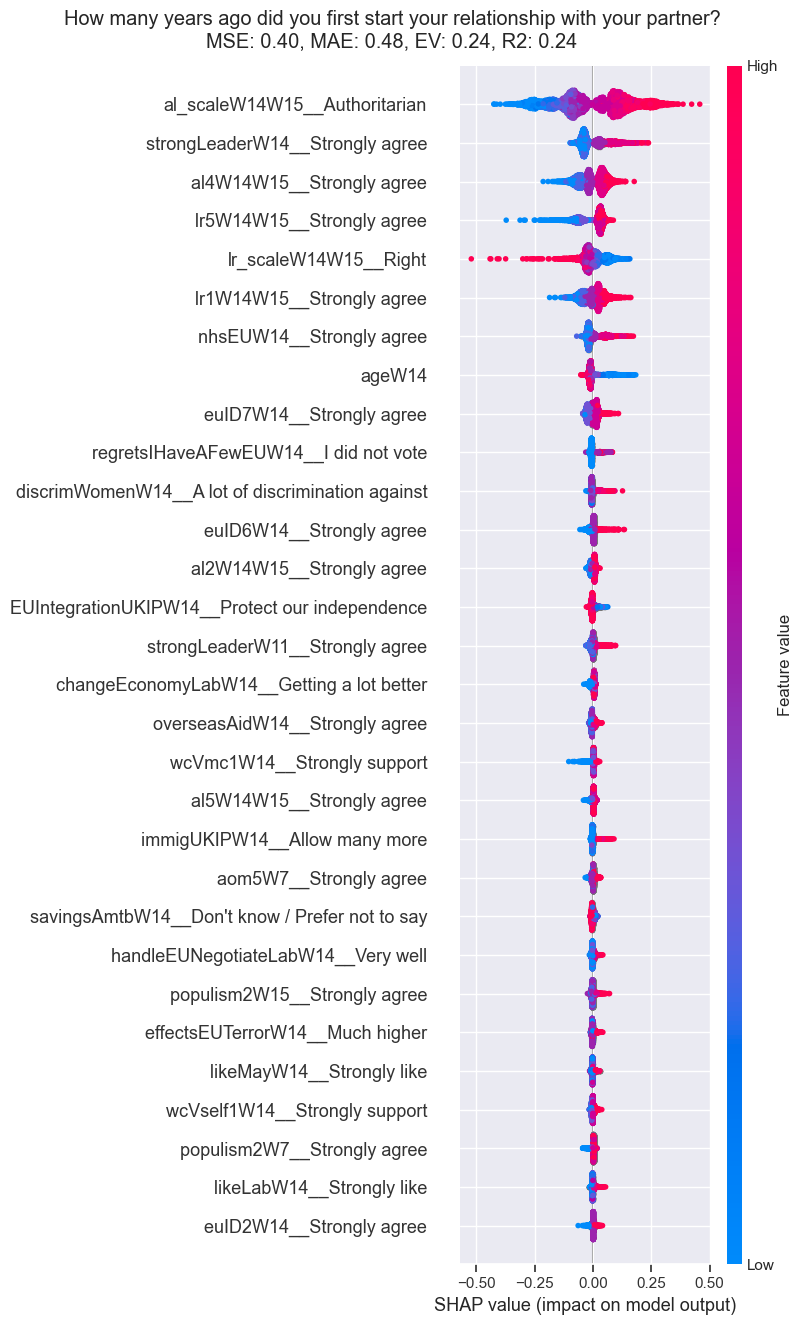

CPU times: total: 8min 12s
Wall time: 2min 22s


In [123]:
%%time
BES_reduced_with_na["ocfa2Z_Acq"] = ocfa2Z_df["Acq"]
name="ocfa2Z_Acq"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],var_stub_list = [name,"zeroSum"],verbosity=0)

In [ ]:
antiIntellectualW8          8966
efficacyTooMuchEffortW8     8966
efficacyNotUnderstandW8     8966
efficacyNoMatterW8          8966

efficacyVoteEffort- Show if
youngPerson!=1
Going to vote is a lot of effort W2W4W6
efficacyVoteEffort Going to vote is a lot of effort W11W25
efficacyEnjoyVote- Show if
youngPerson!=1
Voting is an enjoyable experience W2W4W6
efficacyEnjoyVote Voting is an enjoyable experience W25
efficacyEU I have a pretty good
understanding of the important
issues at stake in the EU
referendum
W8
COLUMNS

In [522]:
search(BES_Panel,"redistSelf")

redistSelfW1     30518
redistSelfW2     30871
redistSelfW3     27831
redistSelfW4     31530
redistSelfW6     30253
redistSelfW7     30895
redistSelfW10    30237
redistSelfW11    30956
redistSelfW12     8820
redistSelfW13    31135
redistSelfW14    31063
redistSelfW15    30842
redistSelfW16    37959
redistSelfW17    34366
redistSelfW18    37825
redistSelfW19    32177
redistSelfW20    31468
redistSelfW21    30281
redistSelfW22    28113
redistSelfW23    30949
redistSelfW24    15336
redistSelfW25    30407
dtype: int64

In [484]:
search(BES_Panel,"reasonForUnemployment|immigrantsWelfareState|govtHandouts|polForTheRich|businessBonus")

reasonForUnemploymentW1      30539
immigrantsWelfareStateW1     30539
govtHandoutsW1               30539
polForTheRichW1              30539
businessBonusW1              30539
reasonForUnemploymentW2      30895
immigrantsWelfareStateW2     30895
govtHandoutsW2               30895
polForTheRichW2              30895
businessBonusW2              30895
reasonForUnemploymentW3      27832
immigrantsWelfareStateW3     27832
govtHandoutsW3               27832
polForTheRichW3              27832
businessBonusW3              27832
reasonForUnemploymentW4      31551
immigrantsWelfareStateW4     31551
govtHandoutsW4               31551
polForTheRichW4              31551
businessBonusW4              31551
reasonForUnemploymentW7      30895
immigrantsWelfareStateW7     30895
govtHandoutsW7               30895
polForTheRichW7              30895
immigrantsWelfareStateW8     33502
immigrantsWelfareStateW10    30237
immigrantsWelfareStateW11    30956
reasonForUnemploymentW20     31468
immigrantsWelfareSta

In [ ]:
##########

In [142]:


pg.cronbach_alpha(data=BES_reduced_with_na[search(BES_reduced_with_na,"zeroSum\d").sort_index().index])

(0.2611328442741641, array([0.254, 0.268]))

In [529]:
%%time
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"(reasonForUnemployment|immigrantsWelfareState|govtHandouts|polForTheRich|businessBonus)W(1|2|3|4)__").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
pg.cronbach_alpha(value_subset*factor_align),display(value_subset.corr())



businessBonusW1__Strongly agree  \
businessBonusW1__Strongly agree                                  1.000000   
businessBonusW2__Strongly agree                                  0.570578   
businessBonusW3__Strongly agree                                  0.580286   
businessBonusW4__Strongly agree                                  0.583106   
govtHandoutsW1__Strongly agree                                   0.253011   
govtHandoutsW2__Strongly agree                                   0.233256   
govtHandoutsW3__Strongly agree                                   0.224060   
govtHandoutsW4__Strongly agree                                   0.225969   
immigrantsWelfareStateW1__Strongly agree                         0.112889   
immigrantsWelfareStateW2__Strongly agree                         0.113009   
immigrantsWelfareStateW3__Strongly agree                         0.104518   
immigrantsWelfareStateW4__Strongly agree                         0.102568   
polForTheRichW1__Strongly agree                                 -0.219133   
polForTheRichW2__Strongly agree                                 -0.184394   
polForTheRichW3__Strongly agree                                 -0.203148   
polForTheRichW4__Strongly agree                                 -0.197061   
reasonForUnemploymentW1__Strongly agree                         -0.142625   
reasonForUnemploymentW2__Strongly agree                         -0.158250   
reasonForUnemploymentW3__Strongly agree                         -0.147038   
reasonForUnemploymentW4__Strongly agree                         -0.151973   

                                          businessBonusW2__Strongly agree  \
businessBonusW1__Strongly agree                                  0.570578   
businessBonusW2__Strongly agree                                  1.000000   
businessBonusW3__Strongly agree                                  0.600576   
businessBonusW4__Strongly agree                                  0.594560   
govtHandoutsW1__Strongly agree                                   0.233596   
govtHandoutsW2__Strongly agree                                   0.236893   
govtHandoutsW3__Strongly agree                                   0.219881   
govtHandoutsW4__Strongly agree                                   0.225543   
immigrantsWelfareStateW1__Strongly agree                         0.102836   
immigrantsWelfareStateW2__Strongly agree                         0.112185   
immigrantsWelfareStateW3__Strongly agree                         0.098581   
immigrantsWelfareStateW4__Strongly agree                         0.100995   
polForTheRichW1__Strongly agree                                 -0.201414   
polForTheRichW2__Strongly agree                                 -0.177840   
polForTheRichW3__Strongly agree                                 -0.191512   
polForTheRichW4__Strongly agree                                 -0.180083   
reasonForUnemploymentW1__Strongly agree                         -0.138718   
reasonForUnemploymentW2__Strongly agree                         -0.139954   
reasonForUnemploymentW3__Strongly agree                         -0.140472   
reasonForUnemploymentW4__Strongly agree                         -0.148757   

                                          businessBonusW3__Strongly agree  \
businessBonusW1__Strongly agree                                  0.580286   
businessBonusW2__Strongly agree                                  0.600576   
businessBonusW3__Strongly agree                                  1.000000   
businessBonusW4__Strongly agree                                  0.619106   
govtHandoutsW1__Strongly agree                                   0.240469   
govtHandoutsW2__Strongly agree                                   0.240532   
govtHandoutsW3__Strongly agree                                   0.252416   
govtHandoutsW4__Strongly agree                                   0.241807   
immigrantsWelfareStateW1__Strongly agree                         0.110077   
immigrantsWelfareStateW2__Strongly a

CPU times: total: 78.1 ms
Wall time: 83.9 ms


((0.8871392417843927, array([0.885, 0.89 ])), None)

In [4]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"(reasonForUnemployment|immigrantsWelfareState|govtHandouts|polForTheRich|businessBonus)W(1)__").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3))

(0.5554687127005707, array([0.547, 0.564]))


businessBonusW1__Strongly agree  \
businessBonusW1__Strongly agree                                  1.000000   
govtHandoutsW1__Strongly agree                                   0.243520   
immigrantsWelfareStateW1__Strongly agree                         0.108541   
polForTheRichW1__Strongly agree                                 -0.197738   
reasonForUnemploymentW1__Strongly agree                         -0.126437   

                                          govtHandoutsW1__Strongly agree  \
businessBonusW1__Strongly agree                                 0.243520   
govtHandoutsW1__Strongly agree                                  1.000000   
immigrantsWelfareStateW1__Strongly agree                        0.509596   
polForTheRichW1__Strongly agree                                -0.135832   
reasonForUnemploymentW1__Strongly agree                        -0.393940   

                                          immigrantsWelfareStateW1__Strongly agree  \
businessBonusW1__Strongly agree                                           0.108541   
govtHandoutsW1__Strongly agree                                            0.509596   
immigrantsWelfareStateW1__Strongly agree                                  1.000000   
polForTheRichW1__Strongly agree                                           0.118028   
reasonForUnemploymentW1__Strongly agree                                  -0.182875   

                                          polForTheRichW1__Strongly agree  \
businessBonusW1__Strongly agree                                 -0.197738   
govtHandoutsW1__Strongly agree                                  -0.135832   
immigrantsWelfareStateW1__Strongly agree                         0.118028   
polForTheRichW1__Strongly agree                                  1.000000   
reasonForUnemploymentW1__Strongly agree                          0.211144   

                                          reasonForUnemploymentW1__Strongly agree  
businessBonusW1__Strongly agree                                         -0.126437  
govtHandoutsW1__Strongly agree                                          -0.393940  
immigrantsWelfareStateW1__Strongly agree                                -0.182875  
polForTheRichW1__Strongly agree                                          0.211144  
reasonForUnemploymentW1__Strongly agree                                  1.000000

eta1 =~ govtHandoutsW1 + immigrantsWelfareStateW1 + reasonForUnemploymentW1 + businessBonusW1 + polForTheRichW1



In [5]:
# print(semopy.efa.explore_pine_model(fix_df_var_names(value_subset)))
# ValueError: min_samples must be no greater than the number of samples (1). Got 2

ValueError: min_samples must be no greater than the number of samples (1). Got 2

In [672]:
search(BES_Panel,"efficacyPolCare")

efficacyPolCareW1     30533
efficacyPolCareW2     30895
efficacyPolCareW3     27830
efficacyPolCareW4     31551
efficacyPolCareW6     30258
efficacyPolCareW7     30895
efficacyPolCareW8     33502
efficacyPolCareW9     30036
efficacyPolCareW10    30237
efficacyPolCareW11    30956
efficacyPolCareW15    30842
efficacyPolCareW16    37959
efficacyPolCareW17    34366
efficacyPolCareW21    30281
efficacyPolCareW23    30949
efficacyPolCareW25    30407
dtype: int64

In [ ]:
efficacyUnderstandW1        30533
efficacyTooMuchEffortW1     30533
efficacyNotUnderstandW1     30533
efficacyPolCareW1           30533

In [558]:
# print(semopy.efa.explore_pine_model(fix_df_var_names(value_subset)))

In [559]:
# semopy.efa.find_latents(fix_df_var_names(value_subset))

In [763]:
loose_var_pattern = "polForTheRich|businessBonus|efficacy|antiIntellectual|smallVote|smallParty|reasonsForUnemployment|"+\
    "govtHandouts|immigrantsWelfareState|locus|tolUncertain|^sovereignty|refFairness|otherSide|"+\
    "radical|harkBack|euPreventWar|euUKRich|euCloser|euRedTape|euMemberJoin|"+\
    "euParlOverRide|euLawsLevel|euUndermineIdentity|^echr|normEU|cancelBrexit|willOfPeople|britishPride|"+\
    "prefTradeoff|beliefTradeoff|gayMarriage|genderRoles|womenJobs|"+\
    "overseasAid|refAreGood|renationaliseRail|strongLeader|populism|hostileSexism|benevolentSexism|"+\
    "groupempathy|pid|euID\d"

'polForTheRich|businessBonus|efficacy|antiIntellectual|smallVote|smallParty|reasonsForUnemployment|govtHandouts|immigrantsWelfareState|locus|tolUncertain|^sovereignty|refFairness|otherSide|radical|harkBack|UKsovereignty|euPreventWar|euUKRich|euCloser|euRedTape|euMemberJoin|euParlOverRide|euLawsLevel|euUndermineIdentity|echr|normEU|cancelBrexit|willOfPeople|britishPride|prefTradeoff|beliefTradeoff|gayMarriage|genderRoles|womenJobs|overseasAid|refAreGood|renationaliseRail|strongLeader|populism|hostileSexism|benevolentSexism|groupempathy|pid|euID|'

In [764]:
loose_corrs = BES_reduced_with_na[search(BES_reduced_with_na,loose_var_pattern).index].corr()

In [674]:
BES_reduced_with_na[search(BES_reduced_with_na,loose_var_pattern).index]

turnoutUKGeneralW1__Very likely that I will vote     29649
turnoutUKGeneralW2__Very likely that I will vote     30117
turnoutUKGeneralW3__Very likely that I will vote     27743
turnoutUKGeneralW4__Very likely that I will vote     30935
turnoutUKGeneralW5__Very likely that I will vote     26999
                                                     ...  
ukipPriorities2_noneW4_Yes                            6431
ocfa2E_Acq                                            4478
ocfa2Z_Acq                                            5836
ocfa2EW20_Acq                                         4372
strongly_agreeable_normed_minus_al                  110850
Length: 13184, dtype: int64

In [765]:
loose_corrs = loose_corrs.fillna(0)

In [704]:
# import pandas as pd
# import scipy.cluster.hierarchy as spc
# pdist_uncondensed = 1.0 - loose_corrs.abs().values
# pdist_condensed = np.concatenate([row[i+1:] for i, row in enumerate(pdist_uncondensed)])
# linkage = spc.linkage(pdist_condensed, method='complete')
# idx = spc.fcluster(linkage, 0.5 * pdist_condensed.max(), 'distance')

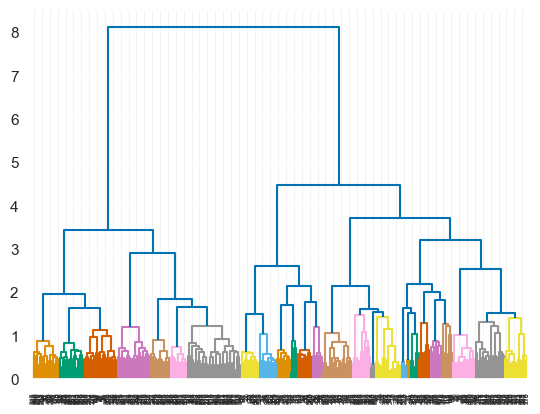

In [766]:
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd

distances = 1 - (loose_corrs.abs()).values  # pairwise distnces

distArray = ssd.squareform(distances)  # scipy converts matrix to 1d array
hier = hierarchy.linkage(distArray, method="ward")  # you can use other methods

dend = hierarchy.dendrogram(hier, truncate_mode="level", p=30, color_threshold=1.5)

In [852]:
search(BES_Panel,"euRedTape")

euRedTapeW7    30895
euRedTapeW8    33502
dtype: int64

In [848]:
cluster_labels.value_counts().sort_index()

1     75
2    108
3     71
4     69
5     44
6     66
Name: count, dtype: int64

In [ ]:
(0.9256238100245652, array([0.924, 0.927])) "(eu(PreventWar|UKRich|Closer|MemberJoin|ParlOverRide|LawsLevel|RedTape|UndermineIdentity)|echr|normEU)W7"
(0.931888259529129, array([0.931, 0.933]))  "(eu(PreventWar|UKRich|Closer|MemberJoin|ParlOverRide|LawsLevel|RedTape|UndermineIdentity)|echr|normEU)W8"
(0.9199683466766059, array([0.918, 0.921])) "(eu(PreventWar|UKRich|Closer|MemberJoin|ParlOverRide|LawsLevel|RedTape|UndermineIdentity)|echr)W7"
(0.9288507002360361, array([0.928, 0.93 ])) "(eu(PreventWar|UKRich|Closer|MemberJoin|ParlOverRide|LawsLevel|RedTape|UndermineIdentity)|echr)W8")


In [863]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,
    "(eu(UKRich|Closer|MemberJoin|ParlOverRide|LawsLevel|RedTape|UndermineIdentity)|echr)W7")\
    .sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display((value_subset.corr().abs().sum().sort_values()-1)/(len(value_subset.columns)-1))
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=2))

(0.9140891936125792, array([0.912, 0.916]))


echrW7__Strongly agree  \
echrW7__Strongly agree                               1.000000   
euCloserW7__Strongly agree                           0.510610   
euLawsLevelW7__Strongly agree                        0.676222   
euMemberJoinW7__Strongly agree                      -0.494044   
euParlOverRideW7__Strongly agree                    -0.649967   
euRedTapeW7__Strongly agree                         -0.523676   
euUKRichW7__Strongly agree                           0.565444   
euUndermineIdentityW7__Strongly agree               -0.608001   

                                       euCloserW7__Strongly agree  \
echrW7__Strongly agree                                   0.510610   
euCloserW7__Strongly agree                               1.000000   
euLawsLevelW7__Strongly agree                            0.585332   
euMemberJoinW7__Strongly agree                          -0.452311   
euParlOverRideW7__Strongly agree                        -0.523342   
euRedTapeW7__Strongly agree                             -0.434071   
euUKRichW7__Strongly agree                               0.652124   
euUndermineIdentityW7__Strongly agree                   -0.574806   

                                       euLawsLevelW7__Strongly agree  \
echrW7__Strongly agree                                      0.676222   
euCloserW7__Strongly agree                                  0.585332   
euLawsLevelW7__Strongly agree                               1.000000   
euMemberJoinW7__Strongly agree                             -0.492586   
euParlOverRideW7__Strongly agree                           -0.677165   
euRedTapeW7__Strongly agree                                -0.530341   
euUKRichW7__Strongly agree                                  0.647931   
euUndermineIdentityW7__Strongly agree                      -0.664226   

                                       euMemberJoinW7__Strongly agree  \
echrW7__Strongly agree                                      -0.494044   
euCloserW7__Strongly agree                                  -0.452311   
euLawsLevelW7__Strongly agree                               -0.492586   
euMemberJoinW7__Strongly agree                               1.000000   
euParlOverRideW7__Strongly agree                             0.541410   
euRedTapeW7__Strongly agree                                  0.531196   
euUKRichW7__Strongly agree                                  -0.492072   
euUndermineIdentityW7__Strongly agree                        0.549558   

                                       euParlOverRideW7__Strongly agree  \
echrW7__Strongly agree                                        -0.649967   
euCloserW7__Strongly agree                                    -0.523342   
euLawsLevelW7__Strongly agree                                 -0.677165   
euMemberJoinW7__Strongly agree                                 0.541410   
euParlOverRideW7__Strongly agree                               1.000000   
euRedTapeW7__Strongly agree                                    0.574145   
euUKRichW7__Strongly agree                                    -0.594891   
euUndermineIdentityW7__Strongly agree                          0.695978   

                                       euRedTapeW7__Strongly agree  \
echrW7__Strongly agree                                   -0.523676   
euCloserW7__Strongly agree                               -0.434071   
euLawsLevelW7__Strongly agree                            -0.530341   
euMemberJoinW7__Strongly agree                            0.531196   
euParlOverRideW7__Strongly agree                          0.574145   
euRedTapeW7__Strongly agree                               1.000000   
euUKRichW7__Strongly agree                               -0.513994   
euUndermineIdentityW7__Strongly agree                     0.581803   

                                       euUKRichW7__Strongly agree  \
echrW7__Strongly agree                                   0.565444   
euCloserW7__Strongly agree                               0.652124   
euLawsLeve

euMemberJoinW7__Strongly agree           0.507597
euRedTapeW7__Strongly agree              0.527032
euCloserW7__Strongly agree               0.533228
echrW7__Strongly agree                   0.575423
euUKRichW7__Strongly agree               0.590580
euParlOverRideW7__Strongly agree         0.608128
euLawsLevelW7__Strongly agree            0.610543
euUndermineIdentityW7__Strongly agree    0.620283
dtype: float64

eta1 =~ euUndermineIdentityW7 + euLawsLevelW7 + euParlOverRideW7 + euUKRichW7 + echrW7 + euCloserW7 + euRedTapeW7 + euMemberJoinW7



In [ ]:
# value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"^ethno\d+W10").sort_index().index].dropna()
# factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
# print(pg.cronbach_alpha(value_subset*factor_align))
# display(value_subset.corr())
# display(value_subset.corr().abs().sum())
# print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3))

In [849]:
threshold = 2  # choose threshold using dendrogram or any other method (e.g. quantile or desired number of features)

cluster_labels = hierarchy.fcluster(hier, threshold, criterion="distance")
cluster_labels = pd.Series(cluster_labels,index=loose_corrs.index)

for cluster in list(range(cluster_labels.min(),cluster_labels.max()+1)):

#
    print("*******************************************")
    print("Cluster Number: ",cluster)
    var_set = cluster_labels[cluster_labels==cluster].index
    wave_freq = pd.Series()
    # run through variables, count wave coverage
    for var in var_set:
        wave_no = int(var.split("__")[0].split("W")[-1])
        if wave_no not in wave_freq.index:
            wave_freq.loc[wave_no]=1
        else:
            wave_freq.loc[wave_no]=wave_freq.loc[wave_no]+1
            
    most_freq_cluster = wave_freq.idxmax()
    if wave_freq.loc[most_freq_cluster]>2:
        most_freq_var_list = [x for x in var_set if re.search("W"+str(most_freq_cluster)+"__",x) is not None]

        value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"|".join(most_freq_var_list)).sort_index().index].dropna()
        factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
        print(pg.cronbach_alpha(value_subset*factor_align))
        display(value_subset.corr())
        display(value_subset.corr().abs().sum())
        print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3))
    else:
        print("Cluster Frequency: ",wave_freq.loc[most_freq_cluster])
    print("---------------------------------------------")
    
    

*******************************************
Cluster Number:  1
(0.8745926977759091, array([0.869, 0.88 ]))


euID3W7__Strongly agree  \
euID3W7__Strongly agree                             1.000000   
euID5W7__Strongly agree                             0.642819   
pidConnectedW7__Strongly agree                      0.324449   
pidCriticisePartyW7__Strongly agree                 0.424026   
pidMyPartyW7__Strongly agree                        0.338009   
pidPraiseGoodW7__Strongly agree                     0.367337   
pidRuinDayW7__Strongly agree                        0.397159   
pidWeTheyW7__Strongly agree                         0.275984   

                                     euID5W7__Strongly agree  \
euID3W7__Strongly agree                             0.642819   
euID5W7__Strongly agree                             1.000000   
pidConnectedW7__Strongly agree                      0.322087   
pidCriticisePartyW7__Strongly agree                 0.355788   
pidMyPartyW7__Strongly agree                        0.321454   
pidPraiseGoodW7__Strongly agree                     0.359535   
pidRuinDayW7__Strongly agree                        0.477108   
pidWeTheyW7__Strongly agree                         0.256573   

                                     pidConnectedW7__Strongly agree  \
euID3W7__Strongly agree                                    0.324449   
euID5W7__Strongly agree                                    0.322087   
pidConnectedW7__Strongly agree                             1.000000   
pidCriticisePartyW7__Strongly agree                        0.534147   
pidMyPartyW7__Strongly agree                               0.560987   
pidPraiseGoodW7__Strongly agree                            0.703786   
pidRuinDayW7__Strongly agree                               0.497409   
pidWeTheyW7__Strongly agree                                0.443233   

                                     pidCriticisePartyW7__Strongly agree  \
euID3W7__Strongly agree                                         0.424026   
euID5W7__Strongly agree                                         0.355788   
pidConnectedW7__Strongly agree                                  0.534147   
pidCriticisePartyW7__Strongly agree                             1.000000   
pidMyPartyW7__Strongly agree                                    0.534729   
pidPraiseGoodW7__Strongly agree                                 0.598526   
pidRuinDayW7__Strongly agree                                    0.528594   
pidWeTheyW7__Strongly agree                                     0.488192   

                                     pidMyPartyW7__Strongly agree  \
euID3W7__Strongly agree                                  0.338009   
euID5W7__Strongly agree                                  0.321454   
pidConnectedW7__Strongly agree                           0.560987   
pidCriticisePartyW7__Strongly agree                      0.534729   
pidMyPartyW7__Strongly agree                             1.000000   
pidPraiseGoodW7__Strongly agree                          0.608315   
pidRuinDayW7__Strongly agree                             0.546361   
pidWeTheyW7__Strongly agree                              0.664172   

                                     pidPraiseGoodW7__Strongly agree  \
euID3W7__Strongly agree                                     0.367337   
euID5W7__Strongly agree                                     0.359535   
pidConnectedW7__Strongly agree                              0.703786   
pidCriticisePartyW7__Strongly agree                         0.598526   
pidMyPartyW7__Strongly agree                                0.608315   
pidPraiseGoodW7__Strongly agree                             1.000000   
pidRuinDayW7__Strongly agree                                0.545490   
pidWeTheyW7__Strongly agree                                 0.472499   

                                     pidRuinDayW7__Strongly agree  \
euID3W7__Strongly agree                                  0.397159   
euID5W7__Strongly agree                                  0.477108   
pidConnectedW7__Strongly agree                           0.497409   
pidCriticis

euID3W7__Strongly agree                3.769784
euID5W7__Strongly agree                3.735366
pidConnectedW7__Strongly agree         4.386098
pidCriticisePartyW7__Strongly agree    4.464002
pidMyPartyW7__Strongly agree           4.574027
pidPraiseGoodW7__Strongly agree        4.655489
pidRuinDayW7__Strongly agree           4.437164
pidWeTheyW7__Strongly agree            4.045696
dtype: float64

eta1 =~ pidPraiseGoodW7 + pidMyPartyW7 + pidCriticisePartyW7 + pidRuinDayW7 + pidConnectedW7 + pidWeTheyW7 + euID3W7 + euID5W7

---------------------------------------------
*******************************************
Cluster Number:  2
Cluster Frequency:  2
---------------------------------------------
*******************************************
Cluster Number:  3
(0.8199535737838587, array([0.816, 0.824]))


euID1W9__Strongly agree  euID3W9__Strongly agree  \
euID1W9__Strongly agree                 1.000000                 0.372928   
euID3W9__Strongly agree                 0.372928                 1.000000   
euID4W9__Strongly agree                 0.438932                 0.392627   
euID6W9__Strongly agree                 0.448379                 0.478193   
euID7W9__Strongly agree                 0.460799                 0.532678   

                         euID4W9__Strongly agree  euID6W9__Strongly agree  \
euID1W9__Strongly agree                 0.438932                 0.448379   
euID3W9__Strongly agree                 0.392627                 0.478193   
euID4W9__Strongly agree                 1.000000                 0.560530   
euID6W9__Strongly agree                 0.560530                 1.000000   
euID7W9__Strongly agree                 0.516000                 0.728720   

                         euID7W9__Strongly agree  
euID1W9__Strongly agree                 0.460799  
euID3W9__Strongly agree                 0.532678  
euID4W9__Strongly agree                 0.516000  
euID6W9__Strongly agree                 0.728720  
euID7W9__Strongly agree                 1.000000

euID1W9__Strongly agree    2.721038
euID3W9__Strongly agree    2.776425
euID4W9__Strongly agree    2.908088
euID6W9__Strongly agree    3.215821
euID7W9__Strongly agree    3.238196
dtype: float64

eta1 =~ euID7W9 + euID6W9 + euID4W9 + euID3W9 + euID1W9

---------------------------------------------
*******************************************
Cluster Number:  4
Cluster Frequency:  2
---------------------------------------------
*******************************************
Cluster Number:  5
(0.45563301677832985, array([0.445, 0.466]))


efficacyNoMatterW7__Strongly agree  \
efficacyNoMatterW7__Strongly agree                            1.000000   
efficacyPolCareW7__Strongly agree                             0.361967   
euRedTapeW7__Strongly agree                                   0.148132   
radicalW7__Strongly agree                                     0.077353   

                                    efficacyPolCareW7__Strongly agree  \
efficacyNoMatterW7__Strongly agree                           0.361967   
efficacyPolCareW7__Strongly agree                            1.000000   
euRedTapeW7__Strongly agree                                  0.177576   
radicalW7__Strongly agree                                    0.259875   

                                    euRedTapeW7__Strongly agree  \
efficacyNoMatterW7__Strongly agree                     0.148132   
efficacyPolCareW7__Strongly agree                      0.177576   
euRedTapeW7__Strongly agree                            1.000000   
radicalW7__Strongly agree                             -0.004048   

                                    radicalW7__Strongly agree  
efficacyNoMatterW7__Strongly agree                   0.077353  
efficacyPolCareW7__Strongly agree                    0.259875  
euRedTapeW7__Strongly agree                         -0.004048  
radicalW7__Strongly agree                            1.000000

efficacyNoMatterW7__Strongly agree    1.587452
efficacyPolCareW7__Strongly agree     1.799419
euRedTapeW7__Strongly agree           1.329756
radicalW7__Strongly agree             1.341276
dtype: float64

eta1 =~ efficacyPolCareW7 + efficacyNoMatterW7 + radicalW7 + euRedTapeW7

---------------------------------------------
*******************************************
Cluster Number:  6
(0.5752055829895961, array([0.567, 0.584]))


efficacyEnjoyVoteW2__Strongly agree  \
efficacyEnjoyVoteW2__Strongly agree                                 1.000000   
efficacyTooMuchEffortW2__Strongly agree                            -0.275425   
efficacyVoteEffortW2__Strongly agree                               -0.351651   

                                         efficacyTooMuchEffortW2__Strongly agree  \
efficacyEnjoyVoteW2__Strongly agree                                    -0.275425   
efficacyTooMuchEffortW2__Strongly agree                                 1.000000   
efficacyVoteEffortW2__Strongly agree                                    0.310019   

                                         efficacyVoteEffortW2__Strongly agree  
efficacyEnjoyVoteW2__Strongly agree                                 -0.351651  
efficacyTooMuchEffortW2__Strongly agree                              0.310019  
efficacyVoteEffortW2__Strongly agree                                 1.000000

efficacyEnjoyVoteW2__Strongly agree        1.627076
efficacyTooMuchEffortW2__Strongly agree    1.585444
efficacyVoteEffortW2__Strongly agree       1.661670
dtype: float64

eta1 =~ efficacyVoteEffortW2 + efficacyEnjoyVoteW2 + efficacyTooMuchEffortW2

---------------------------------------------
*******************************************
Cluster Number:  7
(0.931888259529129, array([0.931, 0.933]))


echrW8__Strongly agree  \
echrW8__Strongly agree                               1.000000   
euCloserW8__Strongly agree                           0.542854   
euLawsLevelW8__Strongly agree                        0.692880   
euMemberJoinW8__Strongly agree                      -0.539079   
euParlOverRideW8__Strongly agree                    -0.678870   
euPreventWarW8__Strongly agree                       0.538954   
euRedTapeW8__Strongly agree                         -0.569210   
euUKRichW8__Strongly agree                           0.589145   
euUndermineIdentityW8__Strongly agree               -0.642837   
normEUW8__Strongly agree                             0.474896   

                                       euCloserW8__Strongly agree  \
echrW8__Strongly agree                                   0.542854   
euCloserW8__Strongly agree                               1.000000   
euLawsLevelW8__Strongly agree                            0.617807   
euMemberJoinW8__Strongly agree                          -0.492344   
euParlOverRideW8__Strongly agree                        -0.558431   
euPreventWarW8__Strongly agree                           0.645241   
euRedTapeW8__Strongly agree                             -0.479994   
euUKRichW8__Strongly agree                               0.679980   
euUndermineIdentityW8__Strongly agree                   -0.619382   
normEUW8__Strongly agree                                 0.488272   

                                       euLawsLevelW8__Strongly agree  \
echrW8__Strongly agree                                      0.692880   
euCloserW8__Strongly agree                                  0.617807   
euLawsLevelW8__Strongly agree                               1.000000   
euMemberJoinW8__Strongly agree                             -0.538473   
euParlOverRideW8__Strongly agree                           -0.696357   
euPreventWarW8__Strongly agree                              0.615543   
euRedTapeW8__Strongly agree                                -0.573864   
euUKRichW8__Strongly agree                                  0.670543   
euUndermineIdentityW8__Strongly agree                      -0.697654   
normEUW8__Strongly agree                                    0.520584   

                                       euMemberJoinW8__Strongly agree  \
echrW8__Strongly agree                                      -0.539079   
euCloserW8__Strongly agree                                  -0.492344   
euLawsLevelW8__Strongly agree                               -0.538473   
euMemberJoinW8__Strongly agree                               1.000000   
euParlOverRideW8__Strongly agree                             0.584295   
euPreventWarW8__Strongly agree                              -0.473305   
euRedTapeW8__Strongly agree                                  0.585487   
euUKRichW8__Strongly agree                                  -0.524550   
euUndermineIdentityW8__Strongly agree                        0.598448   
normEUW8__Strongly agree                                    -0.435392   

                                       euParlOverRideW8__Strongly agree  \
echrW8__Strongly agree                                        -0.678870   
euCloserW8__Strongly agree                                    -0.558431   
euLawsLevelW8__Strongly agree                                 -0.696357   
euMemberJoinW8__Strongly agree                                 0.584295   
euParlOverRideW8__Strongly agree                               1.000000   
euPreventWarW8__Strongly agree                                -0.561904   
euRedTapeW8__Strongly agree                                    0.619208   
euUKRichW8__Strongly agree                                    -0.615488   
euUndermineIdentityW8__Strongly agree                          0.719997   
normEUW8__Strongly agree                                      -0.487920   

                                       euPreventWarW8__Strongly agree  \
echrW8__Strongly agree                                       0.5389

echrW8__Strongly agree                   6.268725
euCloserW8__Strongly agree               6.124306
euLawsLevelW8__Strongly agree            6.623705
euMemberJoinW8__Strongly agree           5.771373
euParlOverRideW8__Strongly agree         6.522471
euPreventWarW8__Strongly agree           6.118569
euRedTapeW8__Strongly agree              5.949031
euUKRichW8__Strongly agree               6.543519
euUndermineIdentityW8__Strongly agree    6.762170
normEUW8__Strongly agree                 5.396608
dtype: float64

eta1 =~ euUndermineIdentityW8 + euLawsLevelW8 + euUKRichW8 + euParlOverRideW8 + echrW8 + euCloserW8 + euPreventWarW8 + euRedTapeW8 + euMemberJoinW8 + normEUW8

---------------------------------------------
*******************************************
Cluster Number:  8
(0.7874076339651698, array([0.783, 0.792]))


gayMarriageW10__Strongly agree  \
gayMarriageW10__Strongly agree                                   1.000000   
genderRolesW10__Strongly agree                                  -0.397810   
harkBackW10__Strongly agree                                     -0.222830   
immigrantsWelfareStateW10__Strongly agree                       -0.323673   
overseasAidW10__Strongly agree                                  -0.312541   
strongLeaderW10__Strongly agree                                 -0.185000   
womenJobsW10__Strongly agree                                    -0.264889   

                                           genderRolesW10__Strongly agree  \
gayMarriageW10__Strongly agree                                  -0.397810   
genderRolesW10__Strongly agree                                   1.000000   
harkBackW10__Strongly agree                                      0.300647   
immigrantsWelfareStateW10__Strongly agree                        0.326058   
overseasAidW10__Strongly agree                                   0.341238   
strongLeaderW10__Strongly agree                                  0.293667   
womenJobsW10__Strongly agree                                     0.348918   

                                           harkBackW10__Strongly agree  \
gayMarriageW10__Strongly agree                               -0.222830   
genderRolesW10__Strongly agree                                0.300647   
harkBackW10__Strongly agree                                   1.000000   
immigrantsWelfareStateW10__Strongly agree                     0.432764   
overseasAidW10__Strongly agree                                0.445302   
strongLeaderW10__Strongly agree                               0.347179   
womenJobsW10__Strongly agree                                  0.299731   

                                           immigrantsWelfareStateW10__Strongly agree  \
gayMarriageW10__Strongly agree                                             -0.323673   
genderRolesW10__Strongly agree                                              0.326058   
harkBackW10__Strongly agree                                                 0.432764   
immigrantsWelfareStateW10__Strongly agree                                   1.000000   
overseasAidW10__Strongly agree                                              0.606923   
strongLeaderW10__Strongly agree                                             0.397997   
womenJobsW10__Strongly agree                                                0.323388   

                                           overseasAidW10__Strongly agree  \
gayMarriageW10__Strongly agree                                  -0.312541   
genderRolesW10__Strongly agree                                   0.341238   
harkBackW10__Strongly agree                                      0.445302   
immigrantsWelfareStateW10__Strongly agree                        0.606923   
overseasAidW10__Strongly agree                                   1.000000   
strongLeaderW10__Strongly agree                                  0.421915   
womenJobsW10__Strongly agree                                     0.382214   

                                           strongLeaderW10__Strongly agree  \
gayMarriageW10__Strongly agree                                   -0.185000   
genderRolesW10__Strongly agree                                    0.293667   
harkBackW10__Strongly agree                                       0.347179   
immigrantsWelfareStateW10__Strongly agree                         0.397997   
overseasAidW10__Strongly agree                                    0.421915   
strongLeaderW10__Strongly agree                                   1.000000   
womenJobsW10__Strongly agree                                      0.287147   

                                           womenJobsW10__Strongly agree  
gayMarriageW10__Strongly agree                                -0.264889  
genderRolesW10__Strongly agree                                 0.348918  
harkBackW10__Strongly agree                    

gayMarriageW10__Strongly agree               2.706742
genderRolesW10__Strongly agree               3.008337
harkBackW10__Strongly agree                  3.048452
immigrantsWelfareStateW10__Strongly agree    3.410803
overseasAidW10__Strongly agree               3.510133
strongLeaderW10__Strongly agree              2.932906
womenJobsW10__Strongly agree                 2.906286
dtype: float64

eta1 =~ overseasAidW10 + immigrantsWelfareStateW10 + harkBackW10 + genderRolesW10 + strongLeaderW10 + womenJobsW10 + gayMarriageW10

---------------------------------------------
*******************************************
Cluster Number:  9
(0.5035470942311675, array([0.482, 0.524]))


britishPrideW25__Strongly agree  \
britishPrideW25__Strongly agree                              1.000000   
radicalW25__Strongly agree                                  -0.259643   
renationaliseRailW25__Strongly agree                        -0.205625   

                                      radicalW25__Strongly agree  \
britishPrideW25__Strongly agree                        -0.259643   
radicalW25__Strongly agree                              1.000000   
renationaliseRailW25__Strongly agree                    0.319826   

                                      renationaliseRailW25__Strongly agree  
britishPrideW25__Strongly agree                                  -0.205625  
radicalW25__Strongly agree                                        0.319826  
renationaliseRailW25__Strongly agree                              1.000000

britishPrideW25__Strongly agree         1.465268
radicalW25__Strongly agree              1.579469
renationaliseRailW25__Strongly agree    1.525451
dtype: float64

eta1 =~ radicalW25 + renationaliseRailW25 + britishPrideW25

---------------------------------------------
*******************************************
Cluster Number:  10
Cluster Frequency:  2
---------------------------------------------
*******************************************
Cluster Number:  11
(0.5837944342801997, array([0.575, 0.592]))


beliefTradeoffW8__Strongly agree  \
beliefTradeoffW8__Strongly agree                          1.000000   
locus1W8__Strongly agree                                  0.054957   
locus2W8__Strongly agree                                  0.097785   
prefTradeoffW8__Strongly agree                            0.428043   
tolUncertain1W8__Strongly agree                           0.063218   
tolUncertain2W8__Strongly agree                           0.067817   
tolUncertain3W8__Strongly agree                           0.094452   

                                  locus1W8__Strongly agree  \
beliefTradeoffW8__Strongly agree                  0.054957   
locus1W8__Strongly agree                          1.000000   
locus2W8__Strongly agree                         -0.112650   
prefTradeoffW8__Strongly agree                    0.075879   
tolUncertain1W8__Strongly agree                   0.281348   
tolUncertain2W8__Strongly agree                   0.166497   
tolUncertain3W8__Strongly agree                   0.236959   

                                  locus2W8__Strongly agree  \
beliefTradeoffW8__Strongly agree                  0.097785   
locus1W8__Strongly agree                         -0.112650   
locus2W8__Strongly agree                          1.000000   
prefTradeoffW8__Strongly agree                    0.091326   
tolUncertain1W8__Strongly agree                   0.061255   
tolUncertain2W8__Strongly agree                   0.156869   
tolUncertain3W8__Strongly agree                   0.103221   

                                  prefTradeoffW8__Strongly agree  \
beliefTradeoffW8__Strongly agree                        0.428043   
locus1W8__Strongly agree                                0.075879   
locus2W8__Strongly agree                                0.091326   
prefTradeoffW8__Strongly agree                          1.000000   
tolUncertain1W8__Strongly agree                         0.035516   
tolUncertain2W8__Strongly agree                         0.066532   
tolUncertain3W8__Strongly agree                         0.076807   

                                  tolUncertain1W8__Strongly agree  \
beliefTradeoffW8__Strongly agree                         0.063218   
locus1W8__Strongly agree                                 0.281348   
locus2W8__Strongly agree                                 0.061255   
prefTradeoffW8__Strongly agree                           0.035516   
tolUncertain1W8__Strongly agree                          1.000000   
tolUncertain2W8__Strongly agree                          0.408113   
tolUncertain3W8__Strongly agree                          0.536245   

                                  tolUncertain2W8__Strongly agree  \
beliefTradeoffW8__Strongly agree                         0.067817   
locus1W8__Strongly agree                                 0.166497   
locus2W8__Strongly agree                                 0.156869   
prefTradeoffW8__Strongly agree                           0.066532   
tolUncertain1W8__Strongly agree                          0.408113   
tolUncertain2W8__Strongly agree                          1.000000   
tolUncertain3W8__Strongly agree                          0.439632   

                                  tolUncertain3W8__Strongly agree  
beliefTradeoffW8__Strongly agree                         0.094452  
locus1W8__Strongly agree                                 0.236959  
locus2W8__Strongly agree                                 0.103221  
prefTradeoffW8__Strongly agree                           0.076807  
tolUncertain1W8__Strongly agree                          0.536245  
tolUncertain2W8__Strongly agree                          0.439632  
tolUncertain3W8__Strongly agree                          1.000000

beliefTradeoffW8__Strongly agree    1.806272
locus1W8__Strongly agree            1.928290
locus2W8__Strongly agree            1.623107
prefTradeoffW8__Strongly agree      1.774104
tolUncertain1W8__Strongly agree     2.385695
tolUncertain2W8__Strongly agree     2.305460
tolUncertain3W8__Strongly agree     2.487316
dtype: float64

eta1 =~ tolUncertain3W8 + tolUncertain1W8 + tolUncertain2W8 + locus1W8 + beliefTradeoffW8 + prefTradeoffW8 + locus2W8

---------------------------------------------
*******************************************
Cluster Number:  12
Cluster Frequency:  2
---------------------------------------------
*******************************************
Cluster Number:  13
(0.8574232578690777, array([0.855, 0.86 ]))


antiIntellectualW10__Strongly agree  \
antiIntellectualW10__Strongly agree                             1.000000   
populism1W10__Strongly agree                                    0.460621   
populism2W10__Strongly agree                                    0.558382   
populism4W10__Strongly agree                                    0.525820   
populism5W10__Strongly agree                                    0.406252   
populism6W10__Strongly agree                                    0.444327   
refAreGoodW10__Strongly agree                                   0.484753   

                                     populism1W10__Strongly agree  \
antiIntellectualW10__Strongly agree                      0.460621   
populism1W10__Strongly agree                             1.000000   
populism2W10__Strongly agree                             0.538356   
populism4W10__Strongly agree                             0.433506   
populism5W10__Strongly agree                             0.469772   
populism6W10__Strongly agree                             0.426530   
refAreGoodW10__Strongly agree                            0.490912   

                                     populism2W10__Strongly agree  \
antiIntellectualW10__Strongly agree                      0.558382   
populism1W10__Strongly agree                             0.538356   
populism2W10__Strongly agree                             1.000000   
populism4W10__Strongly agree                             0.619975   
populism5W10__Strongly agree                             0.457573   
populism6W10__Strongly agree                             0.487833   
refAreGoodW10__Strongly agree                            0.557700   

                                     populism4W10__Strongly agree  \
antiIntellectualW10__Strongly agree                      0.525820   
populism1W10__Strongly agree                             0.433506   
populism2W10__Strongly agree                             0.619975   
populism4W10__Strongly agree                             1.000000   
populism5W10__Strongly agree                             0.460446   
populism6W10__Strongly agree                             0.452018   
refAreGoodW10__Strongly agree                            0.378467   

                                     populism5W10__Strongly agree  \
antiIntellectualW10__Strongly agree                      0.406252   
populism1W10__Strongly agree                             0.469772   
populism2W10__Strongly agree                             0.457573   
populism4W10__Strongly agree                             0.460446   
populism5W10__Strongly agree                             1.000000   
populism6W10__Strongly agree                             0.484605   
refAreGoodW10__Strongly agree                            0.326391   

                                     populism6W10__Strongly agree  \
antiIntellectualW10__Strongly agree                      0.444327   
populism1W10__Strongly agree                             0.426530   
populism2W10__Strongly agree                             0.487833   
populism4W10__Strongly agree                             0.452018   
populism5W10__Strongly agree                             0.484605   
populism6W10__Strongly agree                             1.000000   
refAreGoodW10__Strongly agree                            0.372181   

                                     refAreGoodW10__Strongly agree  
antiIntellectualW10__Strongly agree                       0.484753  
populism1W10__Strongly agree                              0.490912  
populism2W10__Strongly agree                              0.557700  
populism4W10__Strongly agree                              0.378467  
populism5W10__Strongly agree                              0.326391  
populism6W10__Strongly agree                              0.372181  
refAreGoodW10__Strongly agree                             1.000000

antiIntellectualW10__Strongly agree    3.880156
populism1W10__Strongly agree           3.819698
populism2W10__Strongly agree           4.219820
populism4W10__Strongly agree           3.870232
populism5W10__Strongly agree           3.605041
populism6W10__Strongly agree           3.667495
refAreGoodW10__Strongly agree          3.610406
dtype: float64

eta1 =~ populism2W10 + antiIntellectualW10 + populism4W10 + populism1W10 + populism6W10 + refAreGoodW10 + populism5W10

---------------------------------------------


In [843]:
echrW8__Strongly agree                   6.268725
euCloserW8__Strongly agree               6.124306
euLawsLevelW8__Strongly agree            6.623705
euMemberJoinW8__Strongly agree           5.771373
euParlOverRideW8__Strongly agree         6.522471
euPreventWarW8__Strongly agree           6.118569
euRedTapeW8__Strongly agree              5.949031
euUKRichW8__Strongly agree               6.543519
euUndermineIdentityW8__Strongly agree    6.762170
normEUW8__Strongly agree                 5.396608

echrW7__Strongly agree                      6.960800
euCloserW7__Strongly agree                  6.790865
euLawsLevelW7__Strongly agree               7.317749
euMemberJoinW7__Strongly agree              6.295319
euParlOverRideW7__Strongly agree            7.282107
euPreventWarW7__Strongly agree              6.509785
euUKRichW7__Strongly agree                  7.332191
euUndermineIdentityW7__Strongly agree       7.553171
govtHandoutsW7__Strongly agree              5.408929
harkBackW7__Strongly agree                  5.452375
immigrantsWelfareStateW7__Strongly agree    7.156555
normEUW7__Strongly agree                    6.099710

echrW7__Strongly agree                      6.960800
euCloserW7__Strongly agree                  6.790865
euLawsLevelW7__Strongly agree               7.317749
euMemberJoinW7__Strongly agree              6.295319
euParlOverRideW7__Strongly agree            7.282107
euPreventWarW7__Strongly agree              6.509785
euUKRichW7__Strongly agree                  7.332191
euUndermineIdentityW7__Strongly agree       7.553171
govtHandoutsW7__Strongly agree              5.408929
harkBackW7__Strongly agree                  5.452375
immigrantsWelfareStateW7__Strongly agree    7.156555
normEUW7__Strongly agree                    6.099710

['pidWeTheyW7__Strongly agree',
 'pidCriticisePartyW7__Strongly agree',
 'pidRuinDayW7__Strongly agree',
 'pidConnectedW7__Strongly agree',
 'pidMyPartyW7__Strongly agree',
 'pidPraiseGoodW7__Strongly agree',
 'euID3W7__Strongly agree',
 'euID5W7__Strongly agree']

In [842]:
re.search("W"+str(3)+"__",'pidWeTheyW3__Strongly agree')

<re.Match object; span=(9, 13), match='W3__'>

In [835]:
var_set

Index(['pidWeTheyW3__Strongly agree', 'pidCriticisePartyW3__Strongly agree',
       'pidRuinDayW3__Strongly agree', 'pidMyPartyW3__Strongly agree',
       'pidWeTheyW4__Strongly agree', 'pidCriticisePartyW4__Strongly agree',
       'pidRuinDayW4__Strongly agree', 'pidConnectedW4__Strongly agree',
       'pidMyPartyW4__Strongly agree', 'pidPraiseGoodW4__Strongly agree',
       'pidWeTheyW7__Strongly agree', 'pidCriticisePartyW7__Strongly agree',
       'pidRuinDayW7__Strongly agree', 'pidConnectedW7__Strongly agree',
       'pidMyPartyW7__Strongly agree', 'pidPraiseGoodW7__Strongly agree',
       'euID3W7__Strongly agree', 'euID5W7__Strongly agree',
       'pidWeTheyW9__Strongly agree', 'pidCriticisePartyW9__Strongly agree',
       'pidRuinDayW9__Strongly agree', 'pidConnectedW9__Strongly agree',
       'pidMyPartyW9__Strongly agree', 'pidPraiseGoodW9__Strongly agree',
       'euID5W9__Strongly agree', 'pidWeTheyW10__Strongly agree',
       'pidCriticisePartyW10__Strongly agree', 'pidRu

In [785]:
cluster_labels[cluster_labels==13].sort_index().head(50)

#1: pid, euID
#2: pidInterested, euID2
#3: euID
#4: efficacyUnderstand, efficacyNotUnderstand (efficacyEU, overseasAid)
#5: efficacyNoMatter, (...)
#6: efficacyTooMuchEffor,efficacyVoteEffort,efficacyEnjoyVote
#7: eu(PreventWar|UKRich|Closer|LawsLevel|UndermineIdentity|RedTape)
#8: immigrantsWelfareState,govtHandouts,harkBack,overseasAid,strongLeader,Sexism,gayMarriage,genderRole,womenJobs,groupEmpathy
#9: britishPride|businessBonus|radical|renationaliseRail
#10: smallParty,smallVoter
#11: beliefTradeoff,prefTradeoff,locus,tolUncertain
#12: efficacyPolCare,polForTheRich
#13: antiIntellectual,refAreGood,populism

antiIntellectualW10__Strongly agree    13
antiIntellectualW11__Strongly agree    13
antiIntellectualW15__Strongly agree    13
antiIntellectualW16__Strongly agree    13
antiIntellectualW17__Strongly agree    13
antiIntellectualW20__Strongly agree    13
antiIntellectualW21__Strongly agree    13
antiIntellectualW23__Strongly agree    13
antiIntellectualW7__Strongly agree     13
antiIntellectualW8__Strongly agree     13
antiIntellectualW9__Strongly agree     13
euID3W12__Strongly agree               13
populism1W10__Strongly agree           13
populism1W11__Strongly agree           13
populism1W15__Strongly agree           13
populism1W17__Strongly agree           13
populism1W20__Strongly agree           13
populism1W7__Strongly agree            13
populism2W10__Strongly agree           13
populism2W11__Strongly agree           13
populism2W15__Strongly agree           13
populism2W17__Strongly agree           13
populism2W20__Strongly agree           13
populism2W7__Strongly agree       

In [565]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"(efficacyNotUnderstand|efficacyPolCare|efficacyNoMatter|antiIntellectual|efficacyTooMuchEffort)W(7|9|10|11|15|16|17)").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
pg.cronbach_alpha(value_subset*factor_align),display(value_subset.corr())

antiIntellectualW10__Strongly agree  \
antiIntellectualW10__Strongly agree                                  1.000000   
antiIntellectualW11__Strongly agree                                  0.670438   
antiIntellectualW15__Strongly agree                                  0.676931   
antiIntellectualW16__Strongly agree                                  0.660684   
antiIntellectualW17__Strongly agree                                  0.659755   
antiIntellectualW7__Strongly agree                                   0.606176   
antiIntellectualW9__Strongly agree                                   0.659438   
efficacyNoMatterW10__Strongly agree                                  0.341272   
efficacyNoMatterW11__Strongly agree                                  0.258012   
efficacyNoMatterW15__Strongly agree                                  0.315807   
efficacyNoMatterW16__Strongly agree                                  0.339326   
efficacyNoMatterW17__Strongly agree                                  0.264723   
efficacyNoMatterW7__Strongly agree                                   0.275648   
efficacyNoMatterW9__Strongly agree                                   0.291633   
efficacyNotUnderstandW10__Strongly agree                             0.254918   
efficacyNotUnderstandW11__Strongly agree                             0.229356   
efficacyNotUnderstandW15__Strongly agree                             0.231057   
efficacyNotUnderstandW16__Strongly agree                             0.229285   
efficacyNotUnderstandW17__Strongly agree                             0.222408   
efficacyNotUnderstandW7__Strongly agree                              0.223573   
efficacyNotUnderstandW9__Strongly agree                              0.235934   
efficacyPolCareW10__Strongly agree                                   0.414035   
efficacyPolCareW11__Strongly agree                                   0.277874   
efficacyPolCareW15__Strongly agree                                   0.374355   
efficacyPolCareW16__Strongly agree                                   0.370653   
efficacyPolCareW17__Strongly agree                                   0.325764   
efficacyPolCareW7__Strongly agree                                    0.353523   
efficacyPolCareW9__Strongly agree                                    0.355120   
efficacyTooMuchEffortW10__Strongly agree                             0.212615   
efficacyTooMuchEffortW11__Strongly agree                             0.174663   
efficacyTooMuchEffortW15__Strongly agree                             0.189251   
efficacyTooMuchEffortW16__Strongly agree                             0.202606   
efficacyTooMuchEffortW17__Strongly agree                             0.181455   
efficacyTooMuchEffortW7__Strongly agree                              0.167259   
efficacyTooMuchEffortW9__Strongly agree                              0.214179   

                                          antiIntellectualW11__Strongly agree  \
antiIntellectualW10__Strongly agree                                  0.670438   
antiIntellectualW11__Strongly agree                                  1.000000   
antiIntellectualW15__Strongly agree                                  0.663639   
antiIntellectualW16__Strongly agree                                  0.661685   
antiIntellectualW17__Strongly agree                                  0.637407   
antiIntellectualW7__Strongly agree                                   0.589615   
antiIntellectualW9__Strongly agree                                   0.624597   
efficacyNoMatterW10__Strongly agree                                  0.304377   
efficacyNoMatterW11__Strongly agree                                  0.281606   
efficacyNoMatterW15__Strongly agree                                  0.303375   
efficacyNoMatterW16__Strongly agree                                  0.308497   
efficacyNoMatterW17__Strongly agree                                  0.264734   
efficacyNoMatterW7__Strongly agree                                   0.2

((0.9401716315310107, array([0.937, 0.943])), None)

In [616]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"(efficacyNotUnderstand|efficacyPolCare|efficacyNoMatter|antiIntellectual|efficacyTooMuchEffort)W7").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3))

(0.674693655324225, array([0.669, 0.681]))


antiIntellectualW7__Strongly agree  \
antiIntellectualW7__Strongly agree                                 1.000000   
efficacyNoMatterW7__Strongly agree                                 0.332256   
efficacyNotUnderstandW7__Strongly agree                            0.249354   
efficacyPolCareW7__Strongly agree                                  0.397566   
efficacyTooMuchEffortW7__Strongly agree                            0.188719   

                                         efficacyNoMatterW7__Strongly agree  \
antiIntellectualW7__Strongly agree                                 0.332256   
efficacyNoMatterW7__Strongly agree                                 1.000000   
efficacyNotUnderstandW7__Strongly agree                            0.286130   
efficacyPolCareW7__Strongly agree                                  0.356622   
efficacyTooMuchEffortW7__Strongly agree                            0.280989   

                                         efficacyNotUnderstandW7__Strongly agree  \
antiIntellectualW7__Strongly agree                                      0.249354   
efficacyNoMatterW7__Strongly agree                                      0.286130   
efficacyNotUnderstandW7__Strongly agree                                 1.000000   
efficacyPolCareW7__Strongly agree                                       0.223857   
efficacyTooMuchEffortW7__Strongly agree                                 0.385153   

                                         efficacyPolCareW7__Strongly agree  \
antiIntellectualW7__Strongly agree                                0.397566   
efficacyNoMatterW7__Strongly agree                                0.356622   
efficacyNotUnderstandW7__Strongly agree                           0.223857   
efficacyPolCareW7__Strongly agree                                 1.000000   
efficacyTooMuchEffortW7__Strongly agree                           0.234382   

                                         efficacyTooMuchEffortW7__Strongly agree  
antiIntellectualW7__Strongly agree                                      0.188719  
efficacyNoMatterW7__Strongly agree                                      0.280989  
efficacyNotUnderstandW7__Strongly agree                                 0.385153  
efficacyPolCareW7__Strongly agree                                       0.234382  
efficacyTooMuchEffortW7__Strongly agree                                 1.000000

eta1 =~ efficacyNoMatterW7 + efficacyPolCareW7 + antiIntellectualW7 + efficacyNotUnderstandW7 + efficacyTooMuchEffortW7



In [571]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"(locus|tolUncertain)\dW(8|9)").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=2))

(0.6320209443027759, array([0.616, 0.648]))


locus1W8__Strongly agree  \
locus1W8__Strongly agree                         1.000000   
locus1W9__Strongly agree                         0.425573   
locus2W8__Strongly agree                        -0.148344   
locus2W9__Strongly agree                        -0.184929   
tolUncertain1W8__Strongly agree                  0.302744   
tolUncertain2W8__Strongly agree                  0.173105   
tolUncertain3W8__Strongly agree                  0.254445   

                                 locus1W9__Strongly agree  \
locus1W8__Strongly agree                         0.425573   
locus1W9__Strongly agree                         1.000000   
locus2W8__Strongly agree                        -0.148449   
locus2W9__Strongly agree                        -0.229363   
tolUncertain1W8__Strongly agree                  0.194718   
tolUncertain2W8__Strongly agree                  0.085713   
tolUncertain3W8__Strongly agree                  0.178036   

                                 locus2W8__Strongly agree  \
locus1W8__Strongly agree                        -0.148344   
locus1W9__Strongly agree                        -0.148449   
locus2W8__Strongly agree                         1.000000   
locus2W9__Strongly agree                         0.391007   
tolUncertain1W8__Strongly agree                  0.013833   
tolUncertain2W8__Strongly agree                  0.143390   
tolUncertain3W8__Strongly agree                  0.071241   

                                 locus2W9__Strongly agree  \
locus1W8__Strongly agree                        -0.184929   
locus1W9__Strongly agree                        -0.229363   
locus2W8__Strongly agree                         0.391007   
locus2W9__Strongly agree                         1.000000   
tolUncertain1W8__Strongly agree                 -0.056709   
tolUncertain2W8__Strongly agree                  0.013015   
tolUncertain3W8__Strongly agree                 -0.033744   

                                 tolUncertain1W8__Strongly agree  \
locus1W8__Strongly agree                                0.302744   
locus1W9__Strongly agree                                0.194718   
locus2W8__Strongly agree                                0.013833   
locus2W9__Strongly agree                               -0.056709   
tolUncertain1W8__Strongly agree                         1.000000   
tolUncertain2W8__Strongly agree                         0.386971   
tolUncertain3W8__Strongly agree                         0.532916   

                                 tolUncertain2W8__Strongly agree  \
locus1W8__Strongly agree                                0.173105   
locus1W9__Strongly agree                                0.085713   
locus2W8__Strongly agree                                0.143390   
locus2W9__Strongly agree                                0.013015   
tolUncertain1W8__Strongly agree                         0.386971   
tolUncertain2W8__Strongly agree                         1.000000   
tolUncertain3W8__Strongly agree                         0.448716   

                                 tolUncertain3W8__Strongly agree  
locus1W8__Strongly agree                                0.254445  
locus1W9__Strongly agree                                0.178036  
locus2W8__Strongly agree                                0.071241  
locus2W9__Strongly agree                               -0.033744  
tolUncertain1W8__Strongly agree                         0.532916  
tolUncertain2W8__Strongly agree                         0.448716  
tolUncertain3W8__Strongly agree                         1.000000

eta1 =~ tolUncertain3W8 + tolUncertain1W8 + tolUncertain2W8 + locus1W8
eta2 =~ locus1W9 + locus1W8
eta3 =~ locus2W8 + tolUncertain2W8 + locus2W9 + tolUncertain1W8



In [474]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"sdodominance\d").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
pg.cronbach_alpha(value_subset*factor_align)

(0.7319617828487953, array([0.721, 0.743]))

In [469]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"sdoantiegal\d").sort_index().index].dropna()#*[1,1,-1,-1]
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
pg.cronbach_alpha(value_subset*factor_align)

(0.7417679549751546, array([0.731, 0.752]))

In [577]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"sdoantiegal\d|sdodominance\d").sort_index().index].dropna()#*[1,1,-1,-1,1,1,-1,-1]
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3))

# confusing amount of overlap with min_loadings =2 , 3 -> all in one factor

(0.8383749671235661, array([0.832, 0.845]))


sdoantiegal1W15__Strongly favour  \
sdoantiegal1W15__Strongly favour                           1.000000   
sdoantiegal2W15__Strongly favour                           0.487707   
sdoantiegal3W15__Strongly favour                          -0.330785   
sdoantiegal4W15__Strongly favour                          -0.193731   
sdodominance1W15__Strongly favour                          0.356938   
sdodominance2W15__Strongly favour                          0.299292   
sdodominance3W15__Strongly favour                         -0.173930   
sdodominance4W15__Strongly favour                         -0.176008   

                                   sdoantiegal2W15__Strongly favour  \
sdoantiegal1W15__Strongly favour                           0.487707   
sdoantiegal2W15__Strongly favour                           1.000000   
sdoantiegal3W15__Strongly favour                          -0.534277   
sdoantiegal4W15__Strongly favour                          -0.370471   
sdodominance1W15__Strongly favour                          0.501601   
sdodominance2W15__Strongly favour                          0.471904   
sdodominance3W15__Strongly favour                         -0.269915   
sdodominance4W15__Strongly favour                         -0.357839   

                                   sdoantiegal3W15__Strongly favour  \
sdoantiegal1W15__Strongly favour                          -0.330785   
sdoantiegal2W15__Strongly favour                          -0.534277   
sdoantiegal3W15__Strongly favour                           1.000000   
sdoantiegal4W15__Strongly favour                           0.690242   
sdodominance1W15__Strongly favour                         -0.445260   
sdodominance2W15__Strongly favour                         -0.479422   
sdodominance3W15__Strongly favour                          0.380902   
sdodominance4W15__Strongly favour                          0.544289   

                                   sdoantiegal4W15__Strongly favour  \
sdoantiegal1W15__Strongly favour                          -0.193731   
sdoantiegal2W15__Strongly favour                          -0.370471   
sdoantiegal3W15__Strongly favour                           0.690242   
sdoantiegal4W15__Strongly favour                           1.000000   
sdodominance1W15__Strongly favour                         -0.351083   
sdodominance2W15__Strongly favour                         -0.456668   
sdodominance3W15__Strongly favour                          0.361570   
sdodominance4W15__Strongly favour                          0.548654   

                                   sdodominance1W15__Strongly favour  \
sdoantiegal1W15__Strongly favour                            0.356938   
sdoantiegal2W15__Strongly favour                            0.501601   
sdoantiegal3W15__Strongly favour                           -0.445260   
sdoantiegal4W15__Strongly favour                           -0.351083   
sdodominance1W15__Strongly favour                           1.000000   
sdodominance2W15__Strongly favour                           0.606823   
sdodominance3W15__Strongly favour                          -0.305802   
sdodominance4W15__Strongly favour                          -0.362577   

                                   sdodominance2W15__Strongly favour  \
sdoantiegal1W15__Strongly favour                            0.299292   
sdoantiegal2W15__Strongly favour                            0.471904   
sdoantiegal3W15__Strongly favour                           -0.479422   
sdoantiegal4W15__Strongly favour                           -0.456668   
sdodominance1W15__Strongly favour                           0.606823   
sdodominance2W15__Strongly favour                           1.000000   
sdodominance3W15__Strongly favour                          -0.317947   
sdodominance4W15__Strongly favour                          -0.484985   

                                   sdodominance3W15__Strongly favour  \
sdoantiegal1W15__Strongly favour                           -0.173930   
sdoantiegal2W15__Strongly favour 

eta1 =~ sdoantiegal3W15 + sdodominance2W15 + sdoantiegal2W15 + sdoantiegal4W15 + sdodominance1W15 + sdodominance4W15 + sdodominance3W15 + sdoantiegal1W15



In [432]:
search(BES_Panel,"^authLong")

authLong1W10    7631
authLong2W10    7631
authLong3W10    7631
authLong4W10    7631
dtype: int64

In [581]:
# • zero11: Everyone can be a winner at the same time (everyone can win)
# • zero1: One person’s loss is another person’s gain (zero-sum)
# • zero4: There’s only so much to go around. Life is about how big a slice of the pie you
# can get. (zero-sum)
# • zero5: Life isn’t about winners and losers, everyone can do well (everyone can win)
# • zero7: The only way to make someone better off is to make someone else worse off
# (zero-sum)
# • zero9: There are ways to make everyone better off without anyone losing out (everyone
# can win)

# df = BES_reduced_with_na[search(BES_reduced_with_na,"zeroSum\d").sort_index().index]*[-1,1,1,-1,1,-1]
# df.dropna()
# pg.cronbach_alpha(data=df)


value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"zeroSum\d").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display(value_subset.corr().abs().sum())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=4))
# min_loadings = 4 before it turns into one factor

(0.7057021724637812, array([0.695, 0.717]))


zeroSum11W14__Strongly agree  \
zeroSum11W14__Strongly agree                      1.000000   
zeroSum1W14__Strongly agree                      -0.106519   
zeroSum4W14__Strongly agree                      -0.130914   
zeroSum5W14__Strongly agree                       0.479623   
zeroSum7W14__Strongly agree                      -0.241704   
zeroSum9W14__Strongly agree                       0.455716   

                              zeroSum1W14__Strongly agree  \
zeroSum11W14__Strongly agree                    -0.106519   
zeroSum1W14__Strongly agree                      1.000000   
zeroSum4W14__Strongly agree                      0.386725   
zeroSum5W14__Strongly agree                     -0.119429   
zeroSum7W14__Strongly agree                      0.412227   
zeroSum9W14__Strongly agree                     -0.150294   

                              zeroSum4W14__Strongly agree  \
zeroSum11W14__Strongly agree                    -0.130914   
zeroSum1W14__Strongly agree                      0.386725   
zeroSum4W14__Strongly agree                      1.000000   
zeroSum5W14__Strongly agree                     -0.178177   
zeroSum7W14__Strongly agree                      0.403608   
zeroSum9W14__Strongly agree                     -0.224278   

                              zeroSum5W14__Strongly agree  \
zeroSum11W14__Strongly agree                     0.479623   
zeroSum1W14__Strongly agree                     -0.119429   
zeroSum4W14__Strongly agree                     -0.178177   
zeroSum5W14__Strongly agree                      1.000000   
zeroSum7W14__Strongly agree                     -0.248813   
zeroSum9W14__Strongly agree                      0.409405   

                              zeroSum7W14__Strongly agree  \
zeroSum11W14__Strongly agree                    -0.241704   
zeroSum1W14__Strongly agree                      0.412227   
zeroSum4W14__Strongly agree                      0.403608   
zeroSum5W14__Strongly agree                     -0.248813   
zeroSum7W14__Strongly agree                      1.000000   
zeroSum9W14__Strongly agree                     -0.356974   

                              zeroSum9W14__Strongly agree  
zeroSum11W14__Strongly agree                     0.455716  
zeroSum1W14__Strongly agree                     -0.150294  
zeroSum4W14__Strongly agree                     -0.224278  
zeroSum5W14__Strongly agree                      0.409405  
zeroSum7W14__Strongly agree                     -0.356974  
zeroSum9W14__Strongly agree                      1.000000

zeroSum11W14__Strongly agree    2.414476
zeroSum1W14__Strongly agree     2.175194
zeroSum4W14__Strongly agree     2.323702
zeroSum5W14__Strongly agree     2.435446
zeroSum7W14__Strongly agree     2.663326
zeroSum9W14__Strongly agree     2.596666
dtype: float64

eta1 =~ zeroSum7W14 + zeroSum9W14 + zeroSum5W14 + zeroSum11W14 + zeroSum4W14 + zeroSum1W14



In [157]:
search(BES_reduced_with_na,"^empathy\d+W14").sort_index().index

Index(['empathy10W14__Strongly agree', 'empathy1W14__Strongly agree',
       'empathy2W14__Strongly agree', 'empathy3W14__Strongly agree',
       'empathy4W14__Strongly agree', 'empathy5W14__Strongly agree',
       'empathy6W14__Strongly agree', 'empathy7W14__Strongly agree',
       'empathy8W14__Strongly agree', 'empathy9W14__Strongly agree'],
      dtype='object')

In [156]:
search(BES_reduced_with_na,"empathy10").sort_index().index

Index(['empathy10W14__Strongly agree', 'empathy10W20__Strongly agree'], dtype='object')

In [ ]:
# • empathy10: My friends’ emotions don’t affect me much (unempathetic)
# • empathy1: I can usually figure out when my friends are scared (empathetic)
# • empathy2: I can usually realize quickly when a friend is angry (empathetic)
# • empathy3: I can usually figure out when people are cheerful (empathetic)
# • empathy4: I am not usually aware of my friends’ feelings (unempathetic)
# • empathy5: When someone is feeling ‘down’ I can usually understand how they feel (empathetic)

# • empathy6: After being with a friend who is sad about something, I usually feel sad (empathetic)
# • empathy7: My friends’ unhappiness doesn’t make me feel anything (unempathetic)
# • empathy8: Other people’s feelings don’t bother me at all (unempathetic)
# • empathy9: I don’t become sad when I see other people crying (unempathetic)


In [589]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"^empathy\d+W14").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display(value_subset.corr().abs().sum())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=5))
# min_loadings = 5 before it turns into one factor

(0.8210064437155677, array([0.814, 0.828]))


empathy10W14__Strongly agree  \
empathy10W14__Strongly agree                      1.000000   
empathy1W14__Strongly agree                      -0.231718   
empathy2W14__Strongly agree                      -0.241137   
empathy3W14__Strongly agree                      -0.226842   
empathy4W14__Strongly agree                       0.319776   
empathy5W14__Strongly agree                      -0.292566   
empathy6W14__Strongly agree                      -0.361050   
empathy7W14__Strongly agree                       0.634727   
empathy8W14__Strongly agree                       0.670921   
empathy9W14__Strongly agree                       0.557191   

                              empathy1W14__Strongly agree  \
empathy10W14__Strongly agree                    -0.231718   
empathy1W14__Strongly agree                      1.000000   
empathy2W14__Strongly agree                      0.609992   
empathy3W14__Strongly agree                      0.536659   
empathy4W14__Strongly agree                     -0.267864   
empathy5W14__Strongly agree                      0.351310   
empathy6W14__Strongly agree                      0.193654   
empathy7W14__Strongly agree                     -0.218835   
empathy8W14__Strongly agree                     -0.197583   
empathy9W14__Strongly agree                     -0.123449   

                              empathy2W14__Strongly agree  \
empathy10W14__Strongly agree                    -0.241137   
empathy1W14__Strongly agree                      0.609992   
empathy2W14__Strongly agree                      1.000000   
empathy3W14__Strongly agree                      0.706781   
empathy4W14__Strongly agree                     -0.267810   
empathy5W14__Strongly agree                      0.401781   
empathy6W14__Strongly agree                      0.205032   
empathy7W14__Strongly agree                     -0.242465   
empathy8W14__Strongly agree                     -0.244132   
empathy9W14__Strongly agree                     -0.128214   

                              empathy3W14__Strongly agree  \
empathy10W14__Strongly agree                    -0.226842   
empathy1W14__Strongly agree                      0.536659   
empathy2W14__Strongly agree                      0.706781   
empathy3W14__Strongly agree                      1.000000   
empathy4W14__Strongly agree                     -0.243106   
empathy5W14__Strongly agree                      0.412828   
empathy6W14__Strongly agree                      0.193832   
empathy7W14__Strongly agree                     -0.224395   
empathy8W14__Strongly agree                     -0.231657   
empathy9W14__Strongly agree                     -0.130157   

                              empathy4W14__Strongly agree  \
empathy10W14__Strongly agree                     0.319776   
empathy1W14__Strongly agree                     -0.267864   
empathy2W14__Strongly agree                     -0.267810   
empathy3W14__Strongly agree                     -0.243106   
empathy4W14__Strongly agree                      1.000000   
empathy5W14__Strongly agree                     -0.188594   
empathy6W14__Strongly agree                     -0.018203   
empathy7W14__Strongly agree                      0.375941   
empathy8W14__Strongly agree                      0.374943   
empathy9W14__Strongly agree                      0.212284   

                              empathy5W14__Strongly agree  \
empathy10W14__Strongly agree                    -0.292566   
empathy1W14__Strongly agree                      0.351310   
empathy2W14__Strongly agree                      0.401781   
empathy3W14__Strongly agree                      0.412828   
empathy4W14__Strongly agree                     -0.188594   
empathy5W14__Strongly agree                      1.000000   
empathy6W14__Strongly agree                      0.356846   
empathy7W14__Strongly agree                     -0.294540   
empathy8W14__Strongly agree                     -0.291080   
empathy9W14__Strongly agree                     -

empathy10W14__Strongly agree    4.535927
empathy1W14__Strongly agree     3.731063
empathy2W14__Strongly agree     4.047344
empathy3W14__Strongly agree     3.906257
empathy4W14__Strongly agree     3.268521
empathy5W14__Strongly agree     3.776296
empathy6W14__Strongly agree     3.192848
empathy7W14__Strongly agree     4.446567
empathy8W14__Strongly agree     4.441847
empathy9W14__Strongly agree     3.573560
dtype: float64

eta1 =~ empathy10W14 + empathy7W14 + empathy8W14 + empathy2W14 + empathy3W14 + empathy5W14 + empathy1W14 + empathy9W14 + empathy4W14 + empathy6W14



In [588]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"^empathy\d+W20").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display(value_subset.corr().abs().sum())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=5))
# min_loadings = 5 before it turns into one factor

(0.8162745664254908, array([0.809, 0.824]))


empathy10W20__Strongly agree  \
empathy10W20__Strongly agree                      1.000000   
empathy1W20__Strongly agree                      -0.214260   
empathy2W20__Strongly agree                      -0.217529   
empathy3W20__Strongly agree                      -0.240038   
empathy4W20__Strongly agree                       0.317738   
empathy5W20__Strongly agree                      -0.314884   
empathy6W20__Strongly agree                      -0.378750   
empathy7W20__Strongly agree                       0.615729   
empathy8W20__Strongly agree                       0.664729   
empathy9W20__Strongly agree                       0.560397   

                              empathy1W20__Strongly agree  \
empathy10W20__Strongly agree                    -0.214260   
empathy1W20__Strongly agree                      1.000000   
empathy2W20__Strongly agree                      0.527610   
empathy3W20__Strongly agree                      0.463704   
empathy4W20__Strongly agree                     -0.281724   
empathy5W20__Strongly agree                      0.335917   
empathy6W20__Strongly agree                      0.145151   
empathy7W20__Strongly agree                     -0.220060   
empathy8W20__Strongly agree                     -0.200752   
empathy9W20__Strongly agree                     -0.110996   

                              empathy2W20__Strongly agree  \
empathy10W20__Strongly agree                    -0.217529   
empathy1W20__Strongly agree                      0.527610   
empathy2W20__Strongly agree                      1.000000   
empathy3W20__Strongly agree                      0.638555   
empathy4W20__Strongly agree                     -0.265739   
empathy5W20__Strongly agree                      0.370173   
empathy6W20__Strongly agree                      0.165670   
empathy7W20__Strongly agree                     -0.229216   
empathy8W20__Strongly agree                     -0.217889   
empathy9W20__Strongly agree                     -0.109053   

                              empathy3W20__Strongly agree  \
empathy10W20__Strongly agree                    -0.240038   
empathy1W20__Strongly agree                      0.463704   
empathy2W20__Strongly agree                      0.638555   
empathy3W20__Strongly agree                      1.000000   
empathy4W20__Strongly agree                     -0.255611   
empathy5W20__Strongly agree                      0.386490   
empathy6W20__Strongly agree                      0.159408   
empathy7W20__Strongly agree                     -0.250988   
empathy8W20__Strongly agree                     -0.256091   
empathy9W20__Strongly agree                     -0.128162   

                              empathy4W20__Strongly agree  \
empathy10W20__Strongly agree                     0.317738   
empathy1W20__Strongly agree                     -0.281724   
empathy2W20__Strongly agree                     -0.265739   
empathy3W20__Strongly agree                     -0.255611   
empathy4W20__Strongly agree                      1.000000   
empathy5W20__Strongly agree                     -0.219805   
empathy6W20__Strongly agree                     -0.011780   
empathy7W20__Strongly agree                      0.361358   
empathy8W20__Strongly agree                      0.368991   
empathy9W20__Strongly agree                      0.229508   

                              empathy5W20__Strongly agree  \
empathy10W20__Strongly agree                    -0.314884   
empathy1W20__Strongly agree                      0.335917   
empathy2W20__Strongly agree                      0.370173   
empathy3W20__Strongly agree                      0.386490   
empathy4W20__Strongly agree                     -0.219805   
empathy5W20__Strongly agree                      1.000000   
empathy6W20__Strongly agree                      0.299786   
empathy7W20__Strongly agree                     -0.302713   
empathy8W20__Strongly agree                     -0.317074   
empathy9W20__Strongly agree                     -

empathy10W20__Strongly agree    4.524054
empathy1W20__Strongly agree     3.500174
empathy2W20__Strongly agree     3.741433
empathy3W20__Strongly agree     3.779048
empathy4W20__Strongly agree     3.312253
empathy5W20__Strongly agree     3.738462
empathy6W20__Strongly agree     3.085553
empathy7W20__Strongly agree     4.395995
empathy8W20__Strongly agree     4.404810
empathy9W20__Strongly agree     3.543135
dtype: float64

eta1 =~ empathy10W20 + empathy8W20 + empathy7W20 + empathy3W20 + empathy2W20 + empathy5W20 + empathy9W20 + empathy1W20 + empathy4W20 + empathy6W20



In [ ]:
###

In [592]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"^ethno\d+W7").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display(value_subset.corr().abs().sum())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3))
# min_loadings = 3 before it turns into one factor

(0.6764553137819463, array([0.671, 0.682]))


ethno1W7__Strongly agree  ethno2W7__Strongly agree  \
ethno1W7__Strongly agree                  1.000000                 -0.319131   
ethno2W7__Strongly agree                 -0.319131                  1.000000   
ethno3W7__Strongly agree                  0.253394                 -0.245523   
ethno4W7__Strongly agree                 -0.160379                  0.311796   
ethno5W7__Strongly agree                 -0.315367                  0.423581   
ethno6W7__Strongly agree                  0.194132                 -0.242051   

                          ethno3W7__Strongly agree  ethno4W7__Strongly agree  \
ethno1W7__Strongly agree                  0.253394                 -0.160379   
ethno2W7__Strongly agree                 -0.245523                  0.311796   
ethno3W7__Strongly agree                  1.000000                 -0.134888   
ethno4W7__Strongly agree                 -0.134888                  1.000000   
ethno5W7__Strongly agree                 -0.203348                  0.280888   
ethno6W7__Strongly agree                  0.508190                 -0.102965   

                          ethno5W7__Strongly agree  ethno6W7__Strongly agree  
ethno1W7__Strongly agree                 -0.315367                  0.194132  
ethno2W7__Strongly agree                  0.423581                 -0.242051  
ethno3W7__Strongly agree                 -0.203348                  0.508190  
ethno4W7__Strongly agree                  0.280888                 -0.102965  
ethno5W7__Strongly agree                  1.000000                 -0.184017  
ethno6W7__Strongly agree                 -0.184017                  1.000000

ethno1W7__Strongly agree    2.242403
ethno2W7__Strongly agree    2.542082
ethno3W7__Strongly agree    2.345343
ethno4W7__Strongly agree    1.990916
ethno5W7__Strongly agree    2.407202
ethno6W7__Strongly agree    2.231355
dtype: float64

eta1 =~ ethno2W7 + ethno5W7 + ethno3W7 + ethno1W7 + ethno6W7 + ethno4W7



In [593]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"^ethno\d+W9").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display(value_subset.corr().abs().sum())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3))
# min_loadings = 3 before it turns into one factor

(0.7447935745750612, array([0.735, 0.754]))


ethno1W9__Strongly agree  ethno2W9__Strongly agree  \
ethno1W9__Strongly agree                  1.000000                 -0.368889   
ethno2W9__Strongly agree                 -0.368889                  1.000000   
ethno3W9__Strongly agree                  0.364000                 -0.350637   
ethno4W9__Strongly agree                 -0.192180                  0.358800   
ethno5W9__Strongly agree                 -0.332665                  0.504926   
ethno6W9__Strongly agree                  0.315392                 -0.334098   

                          ethno3W9__Strongly agree  ethno4W9__Strongly agree  \
ethno1W9__Strongly agree                  0.364000                 -0.192180   
ethno2W9__Strongly agree                 -0.350637                  0.358800   
ethno3W9__Strongly agree                  1.000000                 -0.146342   
ethno4W9__Strongly agree                 -0.146342                  1.000000   
ethno5W9__Strongly agree                 -0.293247                  0.344369   
ethno6W9__Strongly agree                  0.555152                 -0.127049   

                          ethno5W9__Strongly agree  ethno6W9__Strongly agree  
ethno1W9__Strongly agree                 -0.332665                  0.315392  
ethno2W9__Strongly agree                  0.504926                 -0.334098  
ethno3W9__Strongly agree                 -0.293247                  0.555152  
ethno4W9__Strongly agree                  0.344369                 -0.127049  
ethno5W9__Strongly agree                  1.000000                 -0.287127  
ethno6W9__Strongly agree                 -0.287127                  1.000000

ethno1W9__Strongly agree    2.573125
ethno2W9__Strongly agree    2.917350
ethno3W9__Strongly agree    2.709378
ethno4W9__Strongly agree    2.168740
ethno5W9__Strongly agree    2.762333
ethno6W9__Strongly agree    2.618817
dtype: float64

eta1 =~ ethno2W9 + ethno5W9 + ethno3W9 + ethno6W9 + ethno1W9 + ethno4W9



In [594]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"^ethno\d+W10").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display(value_subset.corr().abs().sum())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3))
# min_loadings = 3 before it turns into one factor

(0.7217478435819096, array([0.716, 0.727]))


ethno1W10__Strongly agree  \
ethno1W10__Strongly agree                   1.000000   
ethno2W10__Strongly agree                  -0.298205   
ethno3W10__Strongly agree                   0.332508   
ethno4W10__Strongly agree                  -0.163884   
ethno5W10__Strongly agree                  -0.221760   
ethno6W10__Strongly agree                   0.274094   

                           ethno2W10__Strongly agree  \
ethno1W10__Strongly agree                  -0.298205   
ethno2W10__Strongly agree                   1.000000   
ethno3W10__Strongly agree                  -0.306258   
ethno4W10__Strongly agree                   0.402213   
ethno5W10__Strongly agree                   0.491532   
ethno6W10__Strongly agree                  -0.301120   

                           ethno3W10__Strongly agree  \
ethno1W10__Strongly agree                   0.332508   
ethno2W10__Strongly agree                  -0.306258   
ethno3W10__Strongly agree                   1.000000   
ethno4W10__Strongly agree                  -0.165532   
ethno5W10__Strongly agree                  -0.247983   
ethno6W10__Strongly agree                   0.553404   

                           ethno4W10__Strongly agree  \
ethno1W10__Strongly agree                  -0.163884   
ethno2W10__Strongly agree                   0.402213   
ethno3W10__Strongly agree                  -0.165532   
ethno4W10__Strongly agree                   1.000000   
ethno5W10__Strongly agree                   0.366713   
ethno6W10__Strongly agree                  -0.141121   

                           ethno5W10__Strongly agree  \
ethno1W10__Strongly agree                  -0.221760   
ethno2W10__Strongly agree                   0.491532   
ethno3W10__Strongly agree                  -0.247983   
ethno4W10__Strongly agree                   0.366713   
ethno5W10__Strongly agree                   1.000000   
ethno6W10__Strongly agree                  -0.235399   

                           ethno6W10__Strongly agree  
ethno1W10__Strongly agree                   0.274094  
ethno2W10__Strongly agree                  -0.301120  
ethno3W10__Strongly agree                   0.553404  
ethno4W10__Strongly agree                  -0.141121  
ethno5W10__Strongly agree                  -0.235399  
ethno6W10__Strongly agree                   1.000000

ethno1W10__Strongly agree    2.290451
ethno2W10__Strongly agree    2.799328
ethno3W10__Strongly agree    2.605684
ethno4W10__Strongly agree    2.239464
ethno5W10__Strongly agree    2.563387
ethno6W10__Strongly agree    2.505138
dtype: float64

eta1 =~ ethno2W10 + ethno3W10 + ethno5W10 + ethno6W10 + ethno1W10 + ethno4W10



In [609]:
# W7

# aom1|Allowing oneself to be convinced by an opposing argument is a sign of good character
# aom2|People should take into consideration evidence that goes against their beliefs
# aom3|People should revise their beliefs in response to new information or evidence
# aom4|Changing your mind is a sign of weakness
# aom5|Intuition is the best guide in making decisions
# aom6|It is important to persevere in your beliefs even when evidence is brought to bear against them
# aom7|One should disregard evidence that conflicts with one's established beliefs

# aom_items = [1,1,1, -1,-1,-1,-1]
# # W7
# BES_reduced_with_na[search(BES_reduced_with_na,"^aom\d+").index].corr().round(2)

value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"^aom(1|2|3|4|5|6|7)+").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display(value_subset.corr().abs().sum())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3))
# min_loadings = 3 before it turns into one factor

# balance not perfect - removing 5 feels like best option, but efa goes weird...

(0.7417416125578374, array([0.732, 0.751]))


aom1W7__Strongly agree  aom2W7__Strongly agree  \
aom1W7__Strongly agree                1.000000                0.296143   
aom2W7__Strongly agree                0.296143                1.000000   
aom3W7__Strongly agree                0.335250                0.510682   
aom4W7__Strongly agree               -0.187174               -0.322459   
aom5W7__Strongly agree               -0.044801               -0.168271   
aom6W7__Strongly agree               -0.173208               -0.320559   
aom7W7__Strongly agree               -0.212906               -0.454889   

                        aom3W7__Strongly agree  aom4W7__Strongly agree  \
aom1W7__Strongly agree                0.335250               -0.187174   
aom2W7__Strongly agree                0.510682               -0.322459   
aom3W7__Strongly agree                1.000000               -0.277930   
aom4W7__Strongly agree               -0.277930                1.000000   
aom5W7__Strongly agree               -0.142225                0.192288   
aom6W7__Strongly agree               -0.353933                0.332614   
aom7W7__Strongly agree               -0.379663                0.452415   

                        aom5W7__Strongly agree  aom6W7__Strongly agree  \
aom1W7__Strongly agree               -0.044801               -0.173208   
aom2W7__Strongly agree               -0.168271               -0.320559   
aom3W7__Strongly agree               -0.142225               -0.353933   
aom4W7__Strongly agree                0.192288                0.332614   
aom5W7__Strongly agree                1.000000                0.308949   
aom6W7__Strongly agree                0.308949                1.000000   
aom7W7__Strongly agree                0.295700                0.490211   

                        aom7W7__Strongly agree  
aom1W7__Strongly agree               -0.212906  
aom2W7__Strongly agree               -0.454889  
aom3W7__Strongly agree               -0.379663  
aom4W7__Strongly agree                0.452415  
aom5W7__Strongly agree                0.295700  
aom6W7__Strongly agree                0.490211  
aom7W7__Strongly agree                1.000000

aom1W7__Strongly agree    2.249482
aom2W7__Strongly agree    3.073003
aom3W7__Strongly agree    2.999683
aom4W7__Strongly agree    2.764880
aom5W7__Strongly agree    2.152235
aom6W7__Strongly agree    2.979476
aom7W7__Strongly agree    3.285784
dtype: float64

eta1 =~ aom7W7 + aom2W7 + aom3W7 + aom6W7 + aom4W7 + aom1W7 + aom5W7



In [602]:
semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=3)

'eta1 =~ aom7W7 + aom2W7 + aom3W7 + aom6W7 + aom4W7\n'

In [183]:
# populism1|The politicians in the UK Parliament need to follow the will of the people
# populism2|The people, and not politicians, should make our most important policy decisions.
# populism4|I would rather be represented by a citizen than by a specialized politician
# populism5|Elected officials talk too much and take too little action
# populism6|What people call “compromise” in politics is really just selling out on one’s principles

# W7 W10 W11 W15 W17 W20

BES_reduced_with_na[search(BES_reduced_with_na,"^populism\d+W(7)").index].corr().round(2)

# all unbalanced

# maybe look for 

populism1W7__Strongly agree  \
populism1W7__Strongly agree                         1.00   
populism2W7__Strongly agree                         0.50   
populism4W7__Strongly agree                         0.41   
populism5W7__Strongly agree                         0.42   
populism6W7__Strongly agree                         0.36   

                             populism2W7__Strongly agree  \
populism1W7__Strongly agree                         0.50   
populism2W7__Strongly agree                         1.00   
populism4W7__Strongly agree                         0.61   
populism5W7__Strongly agree                         0.44   
populism6W7__Strongly agree                         0.43   

                             populism4W7__Strongly agree  \
populism1W7__Strongly agree                         0.41   
populism2W7__Strongly agree                         0.61   
populism4W7__Strongly agree                         1.00   
populism5W7__Strongly agree                         0.45   
populism6W7__Strongly agree                         0.40   

                             populism5W7__Strongly agree  \
populism1W7__Strongly agree                         0.42   
populism2W7__Strongly agree                         0.44   
populism4W7__Strongly agree                         0.45   
populism5W7__Strongly agree                         1.00   
populism6W7__Strongly agree                         0.41   

                             populism6W7__Strongly agree  
populism1W7__Strongly agree                         0.36  
populism2W7__Strongly agree                         0.43  
populism4W7__Strongly agree                         0.40  
populism5W7__Strongly agree                         0.41  
populism6W7__Strongly agree                         1.00

In [186]:
BES_reduced_with_na[search(BES_reduced_with_na,"(hostile|benevolent)sexism\d+W").index].corr().round(2)
# W19

# all unbalanced

hostileSexism1W19__Strongly agree  \
hostileSexism1W19__Strongly agree                                  1.00   
hostileSexism2W19__Strongly agree                                  0.51   
hostileSexism3W19__Strongly agree                                  0.48   
benevolentSexism1W19__Strongly agree                               0.28   
benevolentSexism2W19__Strongly agree                               0.17   
benevolentSexism3W19__Strongly agree                               0.26   

                                      hostileSexism2W19__Strongly agree  \
hostileSexism1W19__Strongly agree                                  0.51   
hostileSexism2W19__Strongly agree                                  1.00   
hostileSexism3W19__Strongly agree                                  0.49   
benevolentSexism1W19__Strongly agree                               0.25   
benevolentSexism2W19__Strongly agree                               0.18   
benevolentSexism3W19__Strongly agree                               0.27   

                                      hostileSexism3W19__Strongly agree  \
hostileSexism1W19__Strongly agree                                  0.48   
hostileSexism2W19__Strongly agree                                  0.49   
hostileSexism3W19__Strongly agree                                  1.00   
benevolentSexism1W19__Strongly agree                               0.24   
benevolentSexism2W19__Strongly agree                               0.20   
benevolentSexism3W19__Strongly agree                               0.25   

                                      benevolentSexism1W19__Strongly agree  \
hostileSexism1W19__Strongly agree                                     0.28   
hostileSexism2W19__Strongly agree                                     0.25   
hostileSexism3W19__Strongly agree                                     0.24   
benevolentSexism1W19__Strongly agree                                  1.00   
benevolentSexism2W19__Strongly agree                                  0.40   
benevolentSexism3W19__Strongly agree                                  0.51   

                                      benevolentSexism2W19__Strongly agree  \
hostileSexism1W19__Strongly agree                                     0.17   
hostileSexism2W19__Strongly agree                                     0.18   
hostileSexism3W19__Strongly agree                                     0.20   
benevolentSexism1W19__Strongly agree                                  0.40   
benevolentSexism2W19__Strongly agree                                  1.00   
benevolentSexism3W19__Strongly agree                                  0.40   

                                      benevolentSexism3W19__Strongly agree  
hostileSexism1W19__Strongly agree                                     0.26  
hostileSexism2W19__Strongly agree                                     0.27  
hostileSexism3W19__Strongly agree                                     0.25  
benevolentSexism1W19__Strongly agree                                  0.51  
benevolentSexism2W19__Strongly agree                                  0.40  
benevolentSexism3W19__Strongly agree                                  1.00

In [187]:
BES_reduced_with_na[search(BES_reduced_with_na,"authLong\d+W").index].corr().round(2)
# W19

# 1 vs 3

authLong1W10__Strongly agree  \
authLong1W10__Strongly agree                          1.00   
authLong2W10__Strongly agree                         -0.24   
authLong3W10__Strongly agree                          0.34   
authLong4W10__Strongly agree                          0.54   

                              authLong2W10__Strongly agree  \
authLong1W10__Strongly agree                         -0.24   
authLong2W10__Strongly agree                          1.00   
authLong3W10__Strongly agree                         -0.14   
authLong4W10__Strongly agree                         -0.26   

                              authLong3W10__Strongly agree  \
authLong1W10__Strongly agree                          0.34   
authLong2W10__Strongly agree                         -0.14   
authLong3W10__Strongly agree                          1.00   
authLong4W10__Strongly agree                          0.38   

                              authLong4W10__Strongly agree  
authLong1W10__Strongly agree                          0.54  
authLong2W10__Strongly agree                         -0.26  
authLong3W10__Strongly agree                          0.38  
authLong4W10__Strongly agree                          1.00

In [611]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,"^authLong").sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display(value_subset.corr().abs().sum())
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=2))

(0.6523298540426193, array([0.639, 0.665]))


authLong1W10__Strongly agree  \
authLong1W10__Strongly agree                      1.000000   
authLong2W10__Strongly agree                     -0.243465   
authLong3W10__Strongly agree                      0.339723   
authLong4W10__Strongly agree                      0.541990   

                              authLong2W10__Strongly agree  \
authLong1W10__Strongly agree                     -0.243465   
authLong2W10__Strongly agree                      1.000000   
authLong3W10__Strongly agree                     -0.141260   
authLong4W10__Strongly agree                     -0.258706   

                              authLong3W10__Strongly agree  \
authLong1W10__Strongly agree                      0.339723   
authLong2W10__Strongly agree                     -0.141260   
authLong3W10__Strongly agree                      1.000000   
authLong4W10__Strongly agree                      0.384626   

                              authLong4W10__Strongly agree  
authLong1W10__Strongly agree                      0.541990  
authLong2W10__Strongly agree                     -0.258706  
authLong3W10__Strongly agree                      0.384626  
authLong4W10__Strongly agree                      1.000000

authLong1W10__Strongly agree    2.125178
authLong2W10__Strongly agree    1.643431
authLong3W10__Strongly agree    1.865609
authLong4W10__Strongly agree    2.185323
dtype: float64

eta1 =~ authLong4W10 + authLong1W10 + authLong3W10 + authLong2W10



In [191]:
BES_reduced_with_na[search(BES_reduced_with_na,"sdodominance|sdoantiegal\d+W").index].corr().round(2)
# W15

# 2 v 2
# 2 v 2

# two separate factors or one?

sdodominance1W15__Strongly favour  \
sdodominance1W15__Strongly favour                               1.00   
sdodominance2W15__Strongly favour                               0.60   
sdodominance3W15__Strongly favour                              -0.30   
sdodominance4W15__Strongly favour                              -0.35   
sdoantiegal1W15__Strongly favour                                0.35   
sdoantiegal2W15__Strongly favour                                0.49   
sdoantiegal3W15__Strongly favour                               -0.44   
sdoantiegal4W15__Strongly favour                               -0.34   

                                   sdodominance2W15__Strongly favour  \
sdodominance1W15__Strongly favour                               0.60   
sdodominance2W15__Strongly favour                               1.00   
sdodominance3W15__Strongly favour                              -0.30   
sdodominance4W15__Strongly favour                              -0.47   
sdoantiegal1W15__Strongly favour                                0.28   
sdoantiegal2W15__Strongly favour                                0.46   
sdoantiegal3W15__Strongly favour                               -0.47   
sdoantiegal4W15__Strongly favour                               -0.45   

                                   sdodominance3W15__Strongly favour  \
sdodominance1W15__Strongly favour                              -0.30   
sdodominance2W15__Strongly favour                              -0.30   
sdodominance3W15__Strongly favour                               1.00   
sdodominance4W15__Strongly favour                               0.41   
sdoantiegal1W15__Strongly favour                               -0.16   
sdoantiegal2W15__Strongly favour                               -0.27   
sdoantiegal3W15__Strongly favour                                0.37   
sdoantiegal4W15__Strongly favour                                0.35   

                                   sdodominance4W15__Strongly favour  \
sdodominance1W15__Strongly favour                              -0.35   
sdodominance2W15__Strongly favour                              -0.47   
sdodominance3W15__Strongly favour                               0.41   
sdodominance4W15__Strongly favour                               1.00   
sdoantiegal1W15__Strongly favour                               -0.16   
sdoantiegal2W15__Strongly favour                               -0.35   
sdoantiegal3W15__Strongly favour                                0.54   
sdoantiegal4W15__Strongly favour                                0.54   

                                   sdoantiegal1W15__Strongly favour  \
sdodominance1W15__Strongly favour                              0.35   
sdodominance2W15__Strongly favour                              0.28   
sdodominance3W15__Strongly favour                             -0.16   
sdodominance4W15__Strongly favour                             -0.16   
sdoantiegal1W15__Strongly favour                               1.00   
sdoantiegal2W15__Strongly favour                               0.48   
sdoantiegal3W15__Strongly favour                              -0.32   
sdoantiegal4W15__Strongly favour                              -0.17   

                                   sdoantiegal2W15__Strongly favour  \
sdodominance1W15__Strongly favour                              0.49   
sdodominance2W15__Strongly favour                              0.46   
sdodominance3W15__Strongly favour                             -0.27   
sdodominance4W15__Strongly favour                             -0.35   
sdoantiegal1W15__Strongly favour                               0.48   
sdoantiegal2W15__Strongly favour                               1.00   
sdoantiegal3W15__Strongly favour                              -0.53   
sdoantiegal4W15__Strongly favour                              -0.36   

                                   sdoantiegal3W15__Strongly favour  \
sdodominance1W15__Strongly favour                             -0.44   
sdodominance2W15_

In [193]:
# locus1
# Many times I feel that I have little influence over the things that happen to me.W9
# locus2
# When I make plans, I am almost certain that I can make them work.W9
# tolUncertain1
# I hate not knowing what the future holds
# tolUncertain2
# I strongly prefer to be certain about the outcome before making a decision
# tolUncertain3
# I hate uncertainty

# W8, W8 W9

BES_reduced_with_na[search(BES_reduced_with_na,"locus|tolUncertain\d+W").index].corr().round(2)

# Neither balanced no well correlated!

locus1W8__Strongly agree  \
locus1W8__Strongly agree                             1.00   
locus2W8__Strongly agree                            -0.11   
tolUncertain1W8__Strongly agree                      0.29   
tolUncertain2W8__Strongly agree                      0.17   
tolUncertain3W8__Strongly agree                      0.24   
locus1W9__Strongly agree                             0.42   
locus2W9__Strongly agree                            -0.18   

                                 locus2W8__Strongly agree  \
locus1W8__Strongly agree                            -0.11   
locus2W8__Strongly agree                             1.00   
tolUncertain1W8__Strongly agree                      0.06   
tolUncertain2W8__Strongly agree                      0.16   
tolUncertain3W8__Strongly agree                      0.11   
locus1W9__Strongly agree                            -0.15   
locus2W9__Strongly agree                             0.39   

                                 tolUncertain1W8__Strongly agree  \
locus1W8__Strongly agree                                    0.29   
locus2W8__Strongly agree                                    0.06   
tolUncertain1W8__Strongly agree                             1.00   
tolUncertain2W8__Strongly agree                             0.41   
tolUncertain3W8__Strongly agree                             0.54   
locus1W9__Strongly agree                                    0.19   
locus2W9__Strongly agree                                   -0.06   

                                 tolUncertain2W8__Strongly agree  \
locus1W8__Strongly agree                                    0.17   
locus2W8__Strongly agree                                    0.16   
tolUncertain1W8__Strongly agree                             0.41   
tolUncertain2W8__Strongly agree                             1.00   
tolUncertain3W8__Strongly agree                             0.44   
locus1W9__Strongly agree                                    0.09   
locus2W9__Strongly agree                                    0.01   

                                 tolUncertain3W8__Strongly agree  \
locus1W8__Strongly agree                                    0.24   
locus2W8__Strongly agree                                    0.11   
tolUncertain1W8__Strongly agree                             0.54   
tolUncertain2W8__Strongly agree                             0.44   
tolUncertain3W8__Strongly agree                             1.00   
locus1W9__Strongly agree                                    0.18   
locus2W9__Strongly agree                                   -0.03   

                                 locus1W9__Strongly agree  \
locus1W8__Strongly agree                             0.42   
locus2W8__Strongly agree                            -0.15   
tolUncertain1W8__Strongly agree                      0.19   
tolUncertain2W8__Strongly agree                      0.09   
tolUncertain3W8__Strongly agree                      0.18   
locus1W9__Strongly agree                             1.00   
locus2W9__Strongly agree                            -0.23   

                                 locus2W9__Strongly agree  
locus1W8__Strongly agree                            -0.18  
locus2W8__Strongly agree                             0.39  
tolUncertain1W8__Strongly agree                     -0.06  
tolUncertain2W8__Strongly agree                      0.01  
tolUncertain3W8__Strongly agree                     -0.03  
locus1W9__Strongly agree                            -0.23  
locus2W9__Strongly agree                             1.00

In [198]:
# efficacyUnderstand
# I have a pretty good understanding of the important political issues facing our country
# W9W15W16
# antiIntellectual
# I’d rather put my trust in the wisdom of ordinary people than the opinions of experts
# W7W8W9W10W11W15W16W17
# efficacyTooMuchEffort
# It takes too much time and effort to be active in politics and public affairs
# W9W15W16W17
# efficacyNotUnderstand
# It is often difficult for me to understand what is going on in government and politics
# W9W15W16W17
# efficacyPolCare
# Politicians don’t care what people like me think
# W9W15W16W17
# efficacyVoteEffort- Show if youngPerson!=1
# Going to vote is a lot of effort
# W2W4W6
# efficacyEnjoyVote- Show if youngPerson!=1
# Voting is an enjoyable experience
# W2W4W6
# smallPartyWastedVote
# People who vote for small parties are throwing away their vote
# W4W6W11W17
# smallVoterPref
# People should vote for the party they like the most, even if it’s not likely to win
# W4W6W17
# efficacyNoMatter
# It doesn’t matter which political party is in power
# W4W6W8W9W10W11W15W16W17
# efficacyEU
# I have a pretty good understanding of the important issues at stake in the EU referendum

# W9, W15, W16

BES_reduced_with_na[search(BES_reduced_with_na,"(antiIntellectual|efficacy.*)W9").index].corr().round(2)

# weak correlation and 1v 5

antiIntellectualW9__Strongly agree  \
antiIntellectualW9__Strongly agree                                     1.00   
efficacyUnderstandW9__Strongly agree                                  -0.11   
efficacyTooMuchEffortW9__Strongly agree                                0.25   
efficacyNotUnderstandW9__Strongly agree                                0.26   
efficacyPolCareW9__Strongly agree                                      0.39   
efficacyNoMatterW9__Strongly agree                                     0.35   

                                         efficacyUnderstandW9__Strongly agree  \
antiIntellectualW9__Strongly agree                                      -0.11   
efficacyUnderstandW9__Strongly agree                                     1.00   
efficacyTooMuchEffortW9__Strongly agree                                 -0.26   
efficacyNotUnderstandW9__Strongly agree                                 -0.49   
efficacyPolCareW9__Strongly agree                                       -0.08   
efficacyNoMatterW9__Strongly agree                                      -0.21   

                                         efficacyTooMuchEffortW9__Strongly agree  \
antiIntellectualW9__Strongly agree                                          0.25   
efficacyUnderstandW9__Strongly agree                                       -0.26   
efficacyTooMuchEffortW9__Strongly agree                                     1.00   
efficacyNotUnderstandW9__Strongly agree                                     0.40   
efficacyPolCareW9__Strongly agree                                           0.24   
efficacyNoMatterW9__Strongly agree                                          0.28   

                                         efficacyNotUnderstandW9__Strongly agree  \
antiIntellectualW9__Strongly agree                                          0.26   
efficacyUnderstandW9__Strongly agree                                       -0.49   
efficacyTooMuchEffortW9__Strongly agree                                     0.40   
efficacyNotUnderstandW9__Strongly agree                                     1.00   
efficacyPolCareW9__Strongly agree                                           0.23   
efficacyNoMatterW9__Strongly agree                                          0.30   

                                         efficacyPolCareW9__Strongly agree  \
antiIntellectualW9__Strongly agree                                    0.39   
efficacyUnderstandW9__Strongly agree                                 -0.08   
efficacyTooMuchEffortW9__Strongly agree                               0.24   
efficacyNotUnderstandW9__Strongly agree                               0.23   
efficacyPolCareW9__Strongly agree                                     1.00   
efficacyNoMatterW9__Strongly agree                                    0.38   

                                         efficacyNoMatterW9__Strongly agree  
antiIntellectualW9__Strongly agree                                     0.35  
efficacyUnderstandW9__Strongly agree                                  -0.21  
efficacyTooMuchEffortW9__Strongly agree                                0.28  
efficacyNotUnderstandW9__Strongly agree                                0.30  
efficacyPolCareW9__Strongly agree                                      0.38  
efficacyNoMatterW9__Strongly agree                                     1.00

In [196]:
search(BES_reduced_with_na,"(antiIntellectual|efficacy)")

efficacyUnderstandW1__Strongly agree        29728
efficacyTooMuchEffortW1__Strongly agree     29079
efficacyNotUnderstandW1__Strongly agree     29968
efficacyPolCareW1__Strongly agree           29750
efficacyUnderstandW2__Strongly agree        30181
                                            ...  
efficacyNotUnderstandW25__Strongly agree    29323
efficacyPolCareW25__Strongly agree          29001
efficacyVoteEffortW25__Strongly agree       29291
efficacyEnjoyVoteW25__Strongly agree        29108
efficacyNoMatterW25__Strongly agree         28989
Length: 94, dtype: int64

In [ ]:
########### automated search for balanced factor

In [212]:
search(BES_reduced_with_na,"empathy10").sort_index().index

Index(['empathy10W14__Strongly agree', 'empathy10W20__Strongly agree'], dtype='object')

In [214]:
corrs = BES_reduced_with_na.corrwith(BES_reduced_with_na['empathy10W14__Strongly agree'])

In [218]:
corrs.dropna().sort_values().head(20)

# discard low sample size

affempathyIRTW14                                                                                                  -0.887562
cuKnow4W16_False                                                                                                  -0.448769
cuKnow3W16_False                                                                                                  -0.434524
ptvLabW16__Very likely                                                                                            -0.414329
winConstituencyLabW10__100 - Very likely to win                                                                   -0.395370
csplRank_1W7__Least common reason                                                                                 -0.388922
winConstituencyGreenW16__98.0                                                                                     -0.384648
cspl1W7__Very often                                                                                               -0.384208
welfareP

In [221]:
%%time
agree_corrs = BES_reduced_with_na[search(BES_reduced_with_na,"__Strongly agree").index].corr(min_periods=250)

CPU times: total: 52.5 s
Wall time: 52.7 s


In [227]:
agree_corrs['empathy10W14__Strongly agree'].sort_values().head(50)

empathy6W14__Strongly agree              -0.369453
empathy6W20__Strongly agree              -0.318871
empathy5W14__Strongly agree              -0.290567
empathy5W20__Strongly agree              -0.275547
empathy2W14__Strongly agree              -0.234461
empathy1W14__Strongly agree              -0.228850
empathy3W14__Strongly agree              -0.226081
empathy1W20__Strongly agree              -0.191505
empathy2W20__Strongly agree              -0.179462
empathy3W20__Strongly agree              -0.169504
dutyToVote2W8__Strongly agree            -0.167860
pidInterestedOthersW13__Strongly agree   -0.146128
gayMarriageW10__Strongly agree           -0.143784
lr1W24__Strongly agree                   -0.139954
partygateAngerW23__Strongly agree        -0.133349
lr1W7_W9__Strongly agree                 -0.133054
euID2W17__Strongly agree                 -0.131436
euID2W9__Strongly agree                  -0.128770
lr3W6__Strongly agree                    -0.128697
euID6W17__Strongly agree       

In [ ]:
###################################### SEMOPY

In [347]:
%%time



np.random.seed(123)

N = 100000
eta1 = np.random.normal(size=N)
eta2 = np.random.normal(size=N)
eta1 += 0.3 * eta2

y1 = np.random.normal(size=N, scale=0.5) + eta1
y2 = np.random.normal(size=N, scale=0.5) + 2 * eta1
y3 = np.random.normal(size=N, scale=0.5) + 3 * eta1 + eta2
y4 = np.random.normal(size=N, scale=0.5) - eta2
y5 = np.random.normal(size=N, scale=0.5) + 1.5 * eta2
x = np.random.normal(size=N)
data = pd.DataFrame([y1, y2, y3, y4, y5, x],
                    index=['y1', 'y2', 'y3', 'y4', 'y5', 'x']).T

print(semopy.efa.explore_cfa_model(data))

eta1 =~ y3 + y2
eta2 =~ y5 + y4

CPU times: total: 4.31 s
Wall time: 2.49 s


In [369]:
al_lr_values = BES_reduced_with_na[search(BES_reduced_with_na,"^(al|lr)(\d)W(20|21|22|23|24|25)").index]# |^lr\d
al_lr_values = al_lr_values.dropna()
al_lr_values.columns = [x.split("__")[0] for x in al_lr_values.columns]

In [372]:
%%time
print(semopy.efa.explore_cfa_model(al_lr_values.dropna()))

eta1 =~ al3W24 + al3W23 + al3W22 + al3W25 + al3W21 + al3W20
eta2 =~ lr1W23 + lr1W25 + lr1W22 + lr1W24 + lr1W21 + lr1W20 + lr3W21 + lr3W22 + lr3W25 + lr3W24 + lr3W23 + lr3W20
eta3 =~ al4W25 + al4W23 + al4W24 + al4W21 + al4W22 + al4W20
eta4 =~ al2W24 + al2W23 + al2W22 + al2W21 + al2W25 + al2W20
eta5 =~ lr5W25 + lr5W23 + lr5W24 + lr5W22 + lr2W22 + lr2W24 + lr2W23 + lr5W21 + lr2W25 + lr2W20 + lr5W20 + lr2W21
eta6 =~ lr4W25 + lr4W24 + lr4W22 + lr4W23 + lr3W25 + lr3W24 + lr3W22 + lr3W23 + lr2W24 + lr2W22 + lr2W25 + lr2W23
eta7 =~ al5W21 + al5W23 + al5W24 + al5W22 + al5W25 + al5W20
eta8 =~ al1W25 + al1W23 + al1W24 + al1W22 + al1W21 + al1W20
eta9 =~ lr3W21 + lr3W20 + lr4W20 + lr4W21 + lr2W21 + lr2W20

CPU times: total: 5.97 s
Wall time: 5.35 s


In [ ]:
# lr1-lr3
# lr5-lr2
# lr2-3-4

In [ ]:
BES_Panel["sdoDomAndAntiEgal1W15"] = BES_Panel["sdodominance1W15"]
BES_Panel["sdoDomAndAntiEgal2W15"] = BES_Panel["sdodominance2W15"]
BES_Panel["sdoDomAndAntiEgal3W15"] = BES_Panel["sdodominance3W15"]
BES_Panel["sdoDomAndAntiEgal4W15"] = BES_Panel["sdodominance4W15"]

BES_Panel["sdoDomAndAntiEgal5W15"] = BES_Panel["sdoantiegal1W15"]
BES_Panel["sdoDomAndAntiEgal6W15"] = BES_Panel["sdoantiegal2W15"]
BES_Panel["sdoDomAndAntiEgal7W15"] = BES_Panel["sdoantiegal3W15"]
BES_Panel["sdoDomAndAntiEgal8W15"] = BES_Panel["sdoantiegal4W15"]

BES_Panel["euro1W7"] = BES_Panel["euUKRichW7"]
BES_Panel["euro2W7"] = BES_Panel["euCloserW7"]
BES_Panel["euro3W7"] = BES_Panel["euMemberJoinW7"]
BES_Panel["euro4W7"] = BES_Panel["euParlOverRideW7"]
BES_Panel["euro5W7"] = BES_Panel["euLawsLevelW7"]
BES_Panel["euro6W7"] = BES_Panel["euRedTapeW7"]
BES_Panel["euro7W7"] = BES_Panel["euUndermineIdentityW7"]
BES_Panel["euro8W7"] = BES_Panel["echrW7"]

BES_Panel["euro1W8"] = BES_Panel["euUKRichW8"]
BES_Panel["euro2W8"] = BES_Panel["euCloserW8"]
BES_Panel["euro3W8"] = BES_Panel["euMemberJoinW8"]
BES_Panel["euro4W8"] = BES_Panel["euParlOverRideW8"]
BES_Panel["euro5W8"] = BES_Panel["euLawsLevelW8"]
BES_Panel["euro6W8"] = BES_Panel["euRedTapeW8"]
BES_Panel["euro7W8"] = BES_Panel["euUndermineIdentityW8"]
BES_Panel["euro8W8"] = BES_Panel["echrW8"]


In [393]:
search(BES_Panel,"p_edlevel")

p_edlevelW1        25845
p_edlevelW2        25963
p_edlevelW3        23748
p_edlevelW4        26782
p_edlevelW5        26127
p_edlevelW6        25636
p_edlevelW7        26321
p_edlevelW8        28379
p_edlevelW9        25419
p_edlevelW10       25832
p_edlevelW11       26338
p_edlevelW12       29211
p_edlevelW13       26575
p_edlevelW14       26352
p_edlevelW15       26113
p_edlevelW16       31922
p_edlevelW17       29138
p_edlevelW18       31977
p_edlevelW19       27329
p_edlevelW20       26687
p_edlevelW21       26019
p_edlevelW22       24168
p_edlevelW23       26598
p_edlevelW24       13317
p_edlevelW25       26079
p_edlevelUniW7     28680
p_edlevelUniW9     27959
p_edlevelUniW10    28151
p_edlevelUniW11    28834
p_edlevelUniW12    32042
p_edlevelUniW13    29084
p_edlevelUniW14    28875
p_edlevelUniW15    28520
p_edlevelUniW16    35009
p_edlevelUniW19    29852
p_edlevelUniW20    29108
p_edlevelUniW21    28244
p_edlevelUniW22    24186
p_edlevelUniW23    26679
p_edlevelUniW25    26271


In [382]:
value_wt = dict()
value_wt[1] = "W1_W5"
value_wt[2] = "W1_W5"
value_wt[3] = "W1_W5"
value_wt[4] = "W1_W5"
value_wt[5] = "W1_W5"
value_wt[6] = "W6"
value_wt[7] = "W7_W9"
value_wt[8] = "W7_W9"
value_wt[9] = "W7_W9"
value_wt[10] = "W10_W12"
value_wt[11] = "W10_W12"
value_wt[12] = "W10_W12"
value_wt[13] = "W13"
value_wt[14] = "W14W15"
value_wt[15] = "W14W15"
value_wt[16] = "W16"
value_wt[17] = "W17_W19"
value_wt[18] = "W17_W19"
value_wt[19] = "W17_W19"
value_wt[20] = "W20"
value_wt[21] = "W21"
value_wt[22] = "W22"
value_wt[23] = "W23"
value_wt[24] = "W24"
value_wt[25] = "W25"

In [ ]:
# comp_model = 'LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthUncorrected =~ al1 + al2 + al3 + al4 + al5'
# full_model = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthCorrected =~ al1 + al2 + al3 + al4 + al5\nE =~ em1 + em2 + em3 + em4 + em5 + em6 + em7 + em8 + em9 + em10\nAcq =~ a*lr1 + a*lr2 + a*lr3 + a*lr4 + a*lr5 + a*al1 + a*al2 + a*al3 + a*al4 + a*al5 + a*em1 + a*em2 + a*em3 + a*em4 + a*em5 + a*em6 + a*em7 + a*em8 + a*em9 + a*em10'

In [869]:
factor_vars = pd.DataFrame(index = ["zeroSum","empathy","ethno","aom","authLong","sdoDomAndAntiEgal","euro"],
                           columns = ["no_list","waves"])
factor_vars.loc["zeroSum"] = [[1,4,5,7,9,11], [14]]
factor_vars.loc["empathy"] = [[1,2,3,4,5,6,7,8,9,10], [14,20]]
factor_vars.loc["ethno"] =   [[1,2,3,4,5,6], [7,9,10]]
factor_vars.loc["aom"] =     [[1,2,3,4,5,6,7], [7]]
factor_vars.loc["authLong"] =[[1,2,3,4], [10]]
factor_vars.loc["sdoDomAndAntiEgal"] = [[1,2,3,4,5,6,7,8], [15]]
factor_vars.loc["euro"] =    [[1,2,3,4,5,6,7,8],[7,8]]
factor_vars

no_list       waves
zeroSum                        [1, 4, 5, 7, 9, 11]        [14]
empathy            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]    [14, 20]
ethno                           [1, 2, 3, 4, 5, 6]  [7, 9, 10]
aom                          [1, 2, 3, 4, 5, 6, 7]         [7]
authLong                              [1, 2, 3, 4]        [10]
sdoDomAndAntiEgal         [1, 2, 3, 4, 5, 6, 7, 8]        [15]
euro                      [1, 2, 3, 4, 5, 6, 7, 8]      [7, 8]

In [870]:



# wave_list = [20]

for var_name in factor_vars.index:
    var_nos   = factor_vars.loc[var_name,"no_list"]
    wave_list = factor_vars.loc[var_name,"waves"]
    for wave in wave_list:

#         wave_dict = {20:"W20"}
#         var_name = "empathy"
        
        value_list = ["lr1","lr2","lr3","lr4","lr5", "al1","al2","al3","al4","al5"]

#         wave = 20

        df = pd.DataFrame(index=BES_Panel.index)
        df["comp_model"] = 'LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthUncorrected =~ al1 + al2 + al3 + al4 + al5'
        # df["full_model"] = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthCorrected =~ al1 + al2 + al3 + al4 + al5\nE =~ empathy1 + empathy2 + empathy3 + empathy4 + empathy5 + empathy6 + empathy7 + empathy8 + empathy9 + empathy10\nAcq =~ a*lr1 + a*lr2 + a*lr3 + a*lr4 + a*lr5 + a*al1 + a*al2 + a*al3 + a*al4 + a*al5 + a*empathy1 + a*empathy2 + a*empathy3 + a*empathy4 + a*empathy5 + a*empathy6 + a*empathy7 + a*empathy8 + a*empathy9 + a*empathy10'

        first_part = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthCorrected =~ al1 + al2 + al3 + al4 + al5\nE =~ '
        second_part = '\nAcq =~ a*lr1 + a*lr2 + a*lr3 + a*lr4 + a*lr5 + a*al1 + a*al2 + a*al3 + a*al4 + a*al5 + '

        df["full_model"] = first_part + " + ".join([var_name+str(x) for x in var_nos]) + second_part + " + ".join(["a*"+var_name+str(x) for x in var_nos])

        df["id"]=BES_Panel.index
        df["wave"]=wave
        df["edlevel2"]=BES_Panel["p_edlevelW"+str(wave)]
        df["edlevel"] = df["edlevel2"].replace({'No qualifications':"No qualification", 'Below GCSE':"GCSE/equiv", 'GCSE':"GCSE/equiv", 'A-level':"A-level/equiv", 
         'Undergraduate':"Undergrad",'Postgrad':"Postgrad"}).astype('category')
        var_list = []
        for value in value_list:
            var_list.append(value)
            df[value]=BES_Panel[value+value_wt[wave]].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
        for no in var_nos:
            var_list.append(var_name+str(no))
            df[var_name+str(no)]=BES_Panel[var_name+str(no)+"W"+str(wave)].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

        df = df[df[var_list].notnull().all(axis=1)]

        filename = var_name+"W"+str(wave)+".RData"

        pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                                'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+filename, df, df_name="df")

In [ ]:
#########################

In [28]:



output_df_dict = {}
Acq_df = pd.DataFrame(index=BES_Panel.index)

file_list = ['euroW7.RData','euroW8.RData','aomW7.RData','authLongW10.RData','sdoDomAndAntiEgalW15.RData','ethnoW10.RData',
 'ethnoW7.RData','ethnoW9.RData','empathyW20.RData','empathyW14.RData','zeroSumW14.RData']

for fname in file_list:
    fname = "_out.".join(fname.split("."))
    fname_stub = fname.split("_out")[0]

    temp = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\'+fname)['save_df']
    temp.index = temp["id"]
    
    output_df_dict[fname_stub] = temp
    Acq_df[fname_stub+"_acq"] = output_df_dict[fname_stub]["Acq"]
    
    



In [44]:
LeftCorrected = pd.DataFrame(index=BES_Panel.index)
AuthCorrected = pd.DataFrame(index=BES_Panel.index)
LeftUncorrected = pd.DataFrame(index=BES_Panel.index)
AuthUncorrected = pd.DataFrame(index=BES_Panel.index)
EFactor = pd.DataFrame(index=BES_Panel.index)
Acquiescence = pd.DataFrame(index=BES_Panel.index)

for fname in file_list:
    fname = "_out.".join(fname.split("."))
    fname_stub = fname.split("_out")[0]
    
    LeftCorrected[fname_stub] = output_df_dict[fname_stub]['LeftCorrected']
    AuthCorrected[fname_stub] = output_df_dict[fname_stub]['AuthCorrected']
    LeftUncorrected[fname_stub] = output_df_dict[fname_stub]['LeftUncorrected']
    AuthUncorrected[fname_stub] = output_df_dict[fname_stub]['AuthUncorrected']
    EFactor[fname_stub] = output_df_dict[fname_stub]['E']    
    Acquiescence[fname_stub] = output_df_dict[fname_stub]['E']    


In [36]:
LeftCorrected.corr()

euroW7    euroW8     aomW7  authLongW10  \
euroW7                1.000000  0.988297  0.817876     0.405071   
euroW8                0.988297  1.000000  0.820209     0.400613   
aomW7                 0.817876  0.820209  1.000000          NaN   
authLongW10           0.405071  0.400613       NaN     1.000000   
sdoDomAndAntiEgalW15  0.746422  0.747922  0.545849     0.267615   
ethnoW10              0.783482  0.782781  0.750710     0.407420   
ethnoW7               0.896704  0.893987  0.887224     0.300255   
ethnoW9               0.907143  0.905912       NaN     0.342355   
empathyW20            0.685302  0.688604  0.734232     0.363705   
empathyW14            0.654007  0.667706  0.564655    -0.203875   
zeroSumW14            0.690003  0.698578  0.693827     0.160138   

                      sdoDomAndAntiEgalW15  ethnoW10   ethnoW7   ethnoW9  \
euroW7                            0.746422  0.783482  0.896704  0.907143   
euroW8                            0.747922  0.782781  0.893987  0.905912   
aomW7                             0.545849  0.750710  0.887224       NaN   
authLongW10                       0.267615  0.407420  0.300255  0.342355   
sdoDomAndAntiEgalW15              1.000000  0.756193  0.743195  0.752565   
ethnoW10                          0.756193  1.000000  0.814515  0.826884   
ethnoW7                           0.743195  0.814515  1.000000  0.975221   
ethnoW9                           0.752565  0.826884  0.975221  1.000000   
empathyW20                        0.733825  0.679787  0.699283  0.771217   
empathyW14                             NaN  0.711113  0.705579  0.876144   
zeroSumW14                             NaN  0.758476  0.735454  0.734122   

                      empathyW20  empathyW14  zeroSumW14  
euroW7                  0.685302    0.654007    0.690003  
euroW8                  0.688604    0.667706    0.698578  
aomW7                   0.734232    0.564655    0.693827  
authLongW10             0.363705   -0.203875    0.160138  
sdoDomAndAntiEgalW15    0.733825         NaN         NaN  
ethnoW10                0.679787    0.711113    0.758476  
ethnoW7                 0.699283    0.705579    0.735454  
ethnoW9                 0.771217    0.876144    0.734122  
empathyW20              1.000000    0.732091    0.487098  
empathyW14              0.732091    1.000000         NaN  
zeroSumW14              0.487098         NaN    1.000000

In [37]:
AuthCorrected.corr()

euroW7    euroW8     aomW7  authLongW10  \
euroW7                1.000000  0.991414  0.808786     0.695948   
euroW8                0.991414  1.000000  0.805820     0.683919   
aomW7                 0.808786  0.805820  1.000000          NaN   
authLongW10           0.695948  0.683919       NaN     1.000000   
sdoDomAndAntiEgalW15  0.762466  0.753181  0.701133     0.672513   
ethnoW10              0.766600  0.759951  0.641171     0.792020   
ethnoW7               0.968462  0.963519  0.808441     0.718209   
ethnoW9               0.959799  0.957080       NaN     0.693902   
empathyW20            0.731816  0.718533  0.590811     0.640930   
empathyW14            0.705760  0.717454  0.592561     0.799742   
zeroSumW14            0.727373  0.714005  0.615772     0.696600   

                      sdoDomAndAntiEgalW15  ethnoW10   ethnoW7   ethnoW9  \
euroW7                            0.762466  0.766600  0.968462  0.959799   
euroW8                            0.753181  0.759951  0.963519  0.957080   
aomW7                             0.701133  0.641171  0.808441       NaN   
authLongW10                       0.672513  0.792020  0.718209  0.693902   
sdoDomAndAntiEgalW15              1.000000  0.742006  0.765481  0.756890   
ethnoW10                          0.742006  1.000000  0.793810  0.797275   
ethnoW7                           0.765481  0.793810  1.000000  0.975207   
ethnoW9                           0.756890  0.797275  0.975207  1.000000   
empathyW20                        0.612305  0.714390  0.748241  0.581491   
empathyW14                             NaN  0.711816  0.726792  0.541296   
zeroSumW14                             NaN  0.723138  0.747086  0.498840   

                      empathyW20  empathyW14  zeroSumW14  
euroW7                  0.731816    0.705760    0.727373  
euroW8                  0.718533    0.717454    0.714005  
aomW7                   0.590811    0.592561    0.615772  
authLongW10             0.640930    0.799742    0.696600  
sdoDomAndAntiEgalW15    0.612305         NaN         NaN  
ethnoW10                0.714390    0.711816    0.723138  
ethnoW7                 0.748241    0.726792    0.747086  
ethnoW9                 0.581491    0.541296    0.498840  
empathyW20              1.000000    0.779434    0.653743  
empathyW14              0.779434    1.000000         NaN  
zeroSumW14              0.653743         NaN    1.000000

In [38]:
LeftUncorrected.corr()

euroW7    euroW8     aomW7  authLongW10  \
euroW7                1.000000  0.999983  0.999840     0.786940   
euroW8                0.999983  1.000000  0.999816     0.780409   
aomW7                 0.999840  0.999816  1.000000          NaN   
authLongW10           0.786940  0.780409       NaN     1.000000   
sdoDomAndAntiEgalW15  0.758171  0.745132  0.623085     0.759958   
ethnoW10              0.782439  0.782411  0.779108     0.999926   
ethnoW7               0.999992  0.999966  0.999851     0.777787   
ethnoW9               0.999937  0.999945       NaN     0.781833   
empathyW20            0.714633  0.702798  0.702453     0.624166   
empathyW14            0.726004  0.730005  0.654831     0.712200   
zeroSumW14            0.759870  0.761506  0.757761     0.735406   

                      sdoDomAndAntiEgalW15  ethnoW10   ethnoW7   ethnoW9  \
euroW7                            0.758171  0.782439  0.999992  0.999937   
euroW8                            0.745132  0.782411  0.999966  0.999945   
aomW7                             0.623085  0.779108  0.999851       NaN   
authLongW10                       0.759958  0.999926  0.777787  0.781833   
sdoDomAndAntiEgalW15              1.000000  0.761613  0.747783  0.759500   
ethnoW10                          0.761613  1.000000  0.777370  0.784089   
ethnoW7                           0.747783  0.777370  1.000000  0.999910   
ethnoW9                           0.759500  0.784089  0.999910  1.000000   
empathyW20                        0.746384  0.681461  0.708172  0.752178   
empathyW14                             NaN  0.742829  0.724664  0.896718   
zeroSumW14                             NaN  0.784319  0.757280  0.821516   

                      empathyW20  empathyW14  zeroSumW14  
euroW7                  0.714633    0.726004    0.759870  
euroW8                  0.702798    0.730005    0.761506  
aomW7                   0.702453    0.654831    0.757761  
authLongW10             0.624166    0.712200    0.735406  
sdoDomAndAntiEgalW15    0.746384         NaN         NaN  
ethnoW10                0.681461    0.742829    0.784319  
ethnoW7                 0.708172    0.724664    0.757280  
ethnoW9                 0.752178    0.896718    0.821516  
empathyW20              1.000000    0.774539    0.634663  
empathyW14              0.774539    1.000000         NaN  
zeroSumW14              0.634663         NaN    1.000000

In [39]:
AuthUncorrected.corr()

euroW7    euroW8     aomW7  authLongW10  \
euroW7                1.000000  0.999956  0.999937     0.855974   
euroW8                0.999956  1.000000  0.999882     0.854667   
aomW7                 0.999937  0.999882  1.000000          NaN   
authLongW10           0.855974  0.854667       NaN     1.000000   
sdoDomAndAntiEgalW15  0.833068  0.833491  0.945127     0.843059   
ethnoW10              0.847824  0.845953  0.850497     0.999919   
ethnoW7               0.999986  0.999957  0.999965     0.853752   
ethnoW9               0.999892  0.999924       NaN     0.859299   
empathyW20            0.816340  0.817263  0.838038     0.746788   
empathyW14            0.810179  0.817124  0.815197     0.707434   
zeroSumW14            0.834530  0.834917  0.832124     0.846022   

                      sdoDomAndAntiEgalW15  ethnoW10   ethnoW7   ethnoW9  \
euroW7                            0.833068  0.847824  0.999986  0.999892   
euroW8                            0.833491  0.845953  0.999957  0.999924   
aomW7                             0.945127  0.850497  0.999965       NaN   
authLongW10                       0.843059  0.999919  0.853752  0.859299   
sdoDomAndAntiEgalW15              1.000000  0.842215  0.831216  0.837799   
ethnoW10                          0.842215  1.000000  0.847508  0.860709   
ethnoW7                           0.831216  0.847508  1.000000  0.999893   
ethnoW9                           0.837799  0.860709  0.999893  1.000000   
empathyW20                        0.728658  0.821927  0.818511  0.735025   
empathyW14                             NaN  0.824716  0.808515  0.777958   
zeroSumW14                             NaN  0.835208  0.829849  0.473792   

                      empathyW20  empathyW14  zeroSumW14  
euroW7                  0.816340    0.810179    0.834530  
euroW8                  0.817263    0.817124    0.834917  
aomW7                   0.838038    0.815197    0.832124  
authLongW10             0.746788    0.707434    0.846022  
sdoDomAndAntiEgalW15    0.728658         NaN         NaN  
ethnoW10                0.821927    0.824716    0.835208  
ethnoW7                 0.818511    0.808515    0.829849  
ethnoW9                 0.735025    0.777958    0.473792  
empathyW20              1.000000    0.848160    0.776838  
empathyW14              0.848160    1.000000         NaN  
zeroSumW14              0.776838         NaN    1.000000

In [40]:
EFactor.corr()

euroW7    euroW8     aomW7  authLongW10  \
euroW7                1.000000  0.921036  0.398646     0.609373   
euroW8                0.921036  1.000000  0.411396     0.605456   
aomW7                 0.398646  0.411396  1.000000          NaN   
authLongW10           0.609373  0.605456       NaN     1.000000   
sdoDomAndAntiEgalW15 -0.441338 -0.476288 -0.628954    -0.411346   
ethnoW10              0.544415  0.546549  0.330480     0.465427   
ethnoW7               0.606455  0.596853  0.358331     0.480182   
ethnoW9               0.677279  0.673544       NaN     0.514289   
empathyW20            0.006513 -0.004195  0.211261     0.184902   
empathyW14            0.064447  0.048138  0.008861    -0.028308   
zeroSumW14           -0.251908 -0.252572 -0.207170     0.231814   

                      sdoDomAndAntiEgalW15  ethnoW10   ethnoW7   ethnoW9  \
euroW7                           -0.441338  0.544415  0.606455  0.677279   
euroW8                           -0.476288  0.546549  0.596853  0.673544   
aomW7                            -0.628954  0.330480  0.358331       NaN   
authLongW10                      -0.411346  0.465427  0.480182  0.514289   
sdoDomAndAntiEgalW15              1.000000 -0.410339 -0.429367 -0.420093   
ethnoW10                         -0.410339  1.000000  0.782770  0.789311   
ethnoW7                          -0.429367  0.782770  1.000000  0.803016   
ethnoW9                          -0.420093  0.789311  0.803016  1.000000   
empathyW20                       -0.176868  0.089192  0.083265  0.267001   
empathyW14                             NaN  0.100440  0.121686  0.300113   
zeroSumW14                             NaN -0.166659 -0.155299 -0.036056   

                      empathyW20  empathyW14  zeroSumW14  
euroW7                  0.006513    0.064447   -0.251908  
euroW8                 -0.004195    0.048138   -0.252572  
aomW7                   0.211261    0.008861   -0.207170  
authLongW10             0.184902   -0.028308    0.231814  
sdoDomAndAntiEgalW15   -0.176868         NaN         NaN  
ethnoW10                0.089192    0.100440   -0.166659  
ethnoW7                 0.083265    0.121686   -0.155299  
ethnoW9                 0.267001    0.300113   -0.036056  
empathyW20              1.000000    0.624614   -0.394950  
empathyW14              0.624614    1.000000         NaN  
zeroSumW14             -0.394950         NaN    1.000000

In [46]:
Acquiescence.corr().round(2)

euroW7  euroW8  aomW7  authLongW10  \
euroW7                  1.00    0.92   0.40         0.61   
euroW8                  0.92    1.00   0.41         0.61   
aomW7                   0.40    0.41   1.00          NaN   
authLongW10             0.61    0.61    NaN         1.00   
sdoDomAndAntiEgalW15   -0.44   -0.48  -0.63        -0.41   
ethnoW10                0.54    0.55   0.33         0.47   
ethnoW7                 0.61    0.60   0.36         0.48   
ethnoW9                 0.68    0.67    NaN         0.51   
empathyW20              0.01   -0.00   0.21         0.18   
empathyW14              0.06    0.05   0.01        -0.03   
zeroSumW14             -0.25   -0.25  -0.21         0.23   

                      sdoDomAndAntiEgalW15  ethnoW10  ethnoW7  ethnoW9  \
euroW7                               -0.44      0.54     0.61     0.68   
euroW8                               -0.48      0.55     0.60     0.67   
aomW7                                -0.63      0.33     0.36      NaN   
authLongW10                          -0.41      0.47     0.48     0.51   
sdoDomAndAntiEgalW15                  1.00     -0.41    -0.43    -0.42   
ethnoW10                             -0.41      1.00     0.78     0.79   
ethnoW7                              -0.43      0.78     1.00     0.80   
ethnoW9                              -0.42      0.79     0.80     1.00   
empathyW20                           -0.18      0.09     0.08     0.27   
empathyW14                             NaN      0.10     0.12     0.30   
zeroSumW14                             NaN     -0.17    -0.16    -0.04   

                      empathyW20  empathyW14  zeroSumW14  
euroW7                      0.01        0.06       -0.25  
euroW8                     -0.00        0.05       -0.25  
aomW7                       0.21        0.01       -0.21  
authLongW10                 0.18       -0.03        0.23  
sdoDomAndAntiEgalW15       -0.18         NaN         NaN  
ethnoW10                    0.09        0.10       -0.17  
ethnoW7                     0.08        0.12       -0.16  
ethnoW9                     0.27        0.30       -0.04  
empathyW20                  1.00        0.62       -0.39  
empathyW14                  0.62        1.00         NaN  
zeroSumW14                 -0.39         NaN        1.00

In [43]:
Acq_df.corr()

euroW7_acq  euroW8_acq  aomW7_acq  authLongW10_acq  \
euroW7_acq                  1.000000    0.926528   0.490128         0.654313   
euroW8_acq                  0.926528    1.000000   0.498204         0.644620   
aomW7_acq                   0.490128    0.498204   1.000000              NaN   
authLongW10_acq             0.654313    0.644620        NaN         1.000000   
sdoDomAndAntiEgalW15_acq    0.437952    0.446561   0.691025         0.442737   
ethnoW10_acq                0.707479    0.707915   0.497686         0.699922   
ethnoW7_acq                 0.706055    0.693466   0.500171         0.608658   
ethnoW9_acq                 0.724564    0.721055        NaN         0.612219   
empathyW20_acq              0.204589    0.194510   0.325844         0.195049   
empathyW14_acq              0.097594    0.118622   0.306582        -0.370334   
zeroSumW14_acq              0.217595    0.200655   0.355437         0.403364   

                          sdoDomAndAntiEgalW15_acq  ethnoW10_acq  ethnoW7_acq  \
euroW7_acq                                0.437952      0.707479     0.706055   
euroW8_acq                                0.446561      0.707915     0.693466   
aomW7_acq                                 0.691025      0.497686     0.500171   
authLongW10_acq                           0.442737      0.699922     0.608658   
sdoDomAndAntiEgalW15_acq                  1.000000      0.465550     0.406610   
ethnoW10_acq                              0.465550      1.000000     0.798184   
ethnoW7_acq                               0.406610      0.798184     1.000000   
ethnoW9_acq                               0.430887      0.828397     0.838852   
empathyW20_acq                            0.086864      0.187884     0.194743   
empathyW14_acq                                 NaN      0.157552     0.144125   
zeroSumW14_acq                                 NaN      0.299896     0.293067   

                          ethnoW9_acq  empathyW20_acq  empathyW14_acq  \
euroW7_acq                   0.724564        0.204589        0.097594   
euroW8_acq                   0.721055        0.194510        0.118622   
aomW7_acq                         NaN        0.325844        0.306582   
authLongW10_acq              0.612219        0.195049       -0.370334   
sdoDomAndAntiEgalW15_acq     0.430887        0.086864             NaN   
ethnoW10_acq                 0.828397        0.187884        0.157552   
ethnoW7_acq                  0.838852        0.194743        0.144125   
ethnoW9_acq                  1.000000        0.273846        0.333258   
empathyW20_acq               0.273846        1.000000        0.331576   
empathyW14_acq               0.333258        0.331576        1.000000   
zeroSumW14_acq               0.198204        0.173743             NaN   

                          zeroSumW14_acq  
euroW7_acq                      0.217595  
euroW8_acq                      0.200655  
aomW7_acq                       0.355437  
authLongW10_acq                 0.403364  
sdoDomAndAntiEgalW15_acq             NaN  
ethnoW10_acq                    0.299896  
ethnoW7_acq                     0.293067  
ethnoW9_acq                     0.198204  
empathyW20_acq                  0.173743  
empathyW14_acq                       NaN  
zeroSumW14_acq                  1.000000

In [33]:
output_df_dict['euroW7'].columns

Index(['comp_model', 'full_model', 'id', 'wave', 'edlevel2', 'edlevel', 'lr1',
       'lr2', 'lr3', 'lr4', 'lr5', 'al1', 'al2', 'al3', 'al4', 'al5', 'euro1',
       'euro2', 'euro3', 'euro4', 'euro5', 'euro6', 'euro7', 'euro8',
       'LeftUncorrected', 'AuthUncorrected', 'LeftCorrected', 'AuthCorrected',
       'E', 'Acq', 'RightUncorrected', 'RightCorrected'],
      dtype='object')

In [30]:
output_df_dict

{'euroW7':                                               comp_model  \
 id                                                         
 1      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 2      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 6      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 7      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 8      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 ...                                                  ...   
 51060  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 51061  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 51062  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 51065  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 51067  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
 
                                               full_model     id  wave  \
 id                                                                      
 1      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 

Top 20 positive (spearman) correlations for euroW7 
 
 
   
 r 
 p 
 N 
 
 
 
 
 euUndermineIdentityW7__Strongly agree 
 0.880000 
 0.00 
 22673 
 
 
 euParlOverRideW7__Strongly agree 
 0.870000 
 0.00 
 22673 
 
 
 UKsovereigntyW7__Strongly agree 
 0.800000 
 0.00 
 22571 
 
 
 EUIntegrationSelfW7__Protect our independence 
 0.790000 
 0.00 
 22157 
 
 
 euExpRefW7_To leave the European Union 
 0.760000 
 0.00 
 5091 
 
 
 euRedTapeW7__Strongly agree 
 0.760000 
 0.00 
 22673 
 
 
 euRefVoteUnsqueezeW7_Leave the EU 
 0.760000 
 0.00 
 20283 
 
 
 happyEULeaveW11__Extremely happy 
 0.760000 
 0.00 
 13726 
 
 
 al_scaleW7_W9__Authoritarian 
 0.750000 
 0.00 
 22673 
 
 
 euIDW7_The leave side 
 0.750000 
 0.00 
 5085 
 
 
 euRefVoteW7_Leave the EU 
 0.740000 
 0.00 
 21468 
 
 
 happyLeaveW7__Very happy 
 0.740000 
 0.00 
 5433 
 
 
 euRefVote2W8_Leave the EU 
 0.730000 
 0.00 
 14936 
 
 
 immigrantsWelfareStateW7__Strongly agree 
 0.730000 
 0.00 
 22475 
 
 
 p_eurefvote_I voted to leave 
 0.720000 
 0.00 
 20118 
 
 
 euPriorityBalanceW12__Control immigration 
 0.720000 
 0.00 
 14158 
 
 
 al_scaleW13__Authoritarian 
 0.710000 
 0.00 
 13049 
 
 
 euMemberJoinW7__Strongly agree 
 0.710000 
 0.00 
 22673 
 
 
 dealPriorityRedTapeW17__Extremely important 
 0.700000 
 0.00 
 2135 
 
 
 ukCoopMovementW7__Bad for Britain 
 0.700000 
 0.00 
 22281 
 
 
 

 
 Top 20 negative (spearman) correlations for euroW7 
 
 
   
 r 
 p 
 N 
 
 
 
 
 euLawsLevelW7__Strongly agree 
 -0.770000 
 0.00 
 22673 
 
 
 approveEUW7__Strongly approve 
 -0.760000 
 0.00 
 22447 
 
 
 euScepticismW7__Work towards single European[...] 
 -0.760000 
 0.00 
 5496 
 
 
 echrW7__Strongly agree 
 -0.750000 
 0.00 
 22673 
 
 
 euUKRichW7__Strongly agree 
 -0.740000 
 0.00 
 22673 
 
 
 immigSelfW7__Allow many more 
 -0.730000 
 0.00 
 21307 
 
 
 eesEUIntegrationSelfW3__Unification should be[...] 
 -0.720000 
 0.00 
 6266 
 
 
 immigCulturalW7__Enriches cultural life 
 -0.700000 
 0.00 
 22304 
 
 
 euFinancialHelpW7__Strongly agree 
 -0.700000 
 0.00 
 22098 
 
 
 brexitSelfW16__Remain in the EU 
 -0.690000 
 0.00 
 1936 
 
 
 immigEconW7__Good for economy 
 -0.680000 
 0.00 
 22155 
 
 
 dealVremainW18_Remain in the EU 
 -0.680000 
 0.00 
 9314 
 
 
 remainVnodealW16_Remain in the EU 
 -0.670000 
 0.00 
 7516 
 
 
 europeannessW11W12__Very strongly European 
 -0.670000 
 0.00 
 16628 
 
 
 euMoreW7__Many more 
 -0.650000 
 0.00 
 22122 
 
 
 asylumMoreW7__Many more 
 -0.650000 
 0.00 
 22060 
 
 
 euCloserW8__Strongly agree 
 -0.650000 
 0.00 
 17868 
 
 
 immigrationLevelW4__Increased a lot 
 -0.640000 
 0.00 
 15407 
 
 
 customsUnionW16__Strongly support 
 -0.630000 
 0.00 
 7309 
 
 
 euPreventWarW8__Strongly agree 
 -0.630000 
 0.00 
 17675

MSE: 0.09, MAE: 0.22, EV: 0.90, R2: 0.90


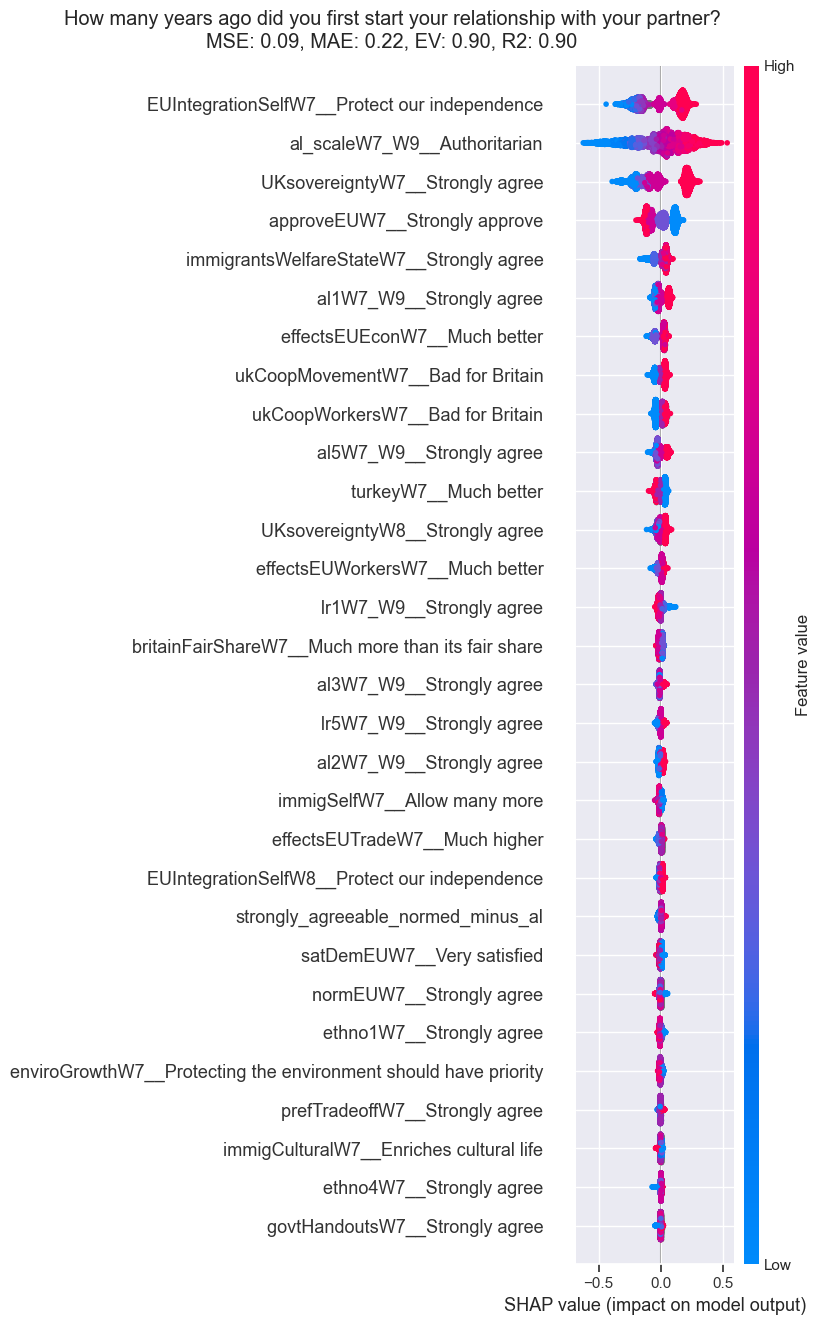

CPU times: total: 1h 29min 22s
Wall time: 15min 24s


In [924]:
%%time
name = "euroW7"
BES_reduced_with_na[fname_stub] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,name.split("W")[0],"eu","echr"],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for euroW7 
 
 
   
 r 
 p 
 N 
 
 
 
 
 euUndermineIdentityW7__Strongly agree 
 0.880000 
 0.00 
 22673 
 
 
 euParlOverRideW7__Strongly agree 
 0.870000 
 0.00 
 22673 
 
 
 UKsovereigntyW7__Strongly agree 
 0.800000 
 0.00 
 22571 
 
 
 EUIntegrationSelfW7__Protect our independence 
 0.790000 
 0.00 
 22157 
 
 
 euExpRefW7_To leave the European Union 
 0.760000 
 0.00 
 5091 
 
 
 euRedTapeW7__Strongly agree 
 0.760000 
 0.00 
 22673 
 
 
 euRefVoteUnsqueezeW7_Leave the EU 
 0.760000 
 0.00 
 20283 
 
 
 happyEULeaveW11__Extremely happy 
 0.760000 
 0.00 
 13726 
 
 
 al_scaleW7_W9__Authoritarian 
 0.750000 
 0.00 
 22673 
 
 
 euIDW7_The leave side 
 0.750000 
 0.00 
 5085 
 
 
 euRefVoteW7_Leave the EU 
 0.740000 
 0.00 
 21468 
 
 
 happyLeaveW7__Very happy 
 0.740000 
 0.00 
 5433 
 
 
 euRefVote2W8_Leave the EU 
 0.730000 
 0.00 
 14936 
 
 
 immigrantsWelfareStateW7__Strongly agree 
 0.730000 
 0.00 
 22475 
 
 
 p_eurefvote_I voted to leave 
 0.720000 
 0.00 
 20118 
 
 
 euPriorityBalanceW12__Control immigration 
 0.720000 
 0.00 
 14158 
 
 
 al_scaleW13__Authoritarian 
 0.710000 
 0.00 
 13049 
 
 
 euMemberJoinW7__Strongly agree 
 0.710000 
 0.00 
 22673 
 
 
 dealPriorityRedTapeW17__Extremely important 
 0.700000 
 0.00 
 2135 
 
 
 ukCoopMovementW7__Bad for Britain 
 0.700000 
 0.00 
 22281 
 
 
 

 
 Top 20 negative (spearman) correlations for euroW7 
 
 
   
 r 
 p 
 N 
 
 
 
 
 euLawsLevelW7__Strongly agree 
 -0.770000 
 0.00 
 22673 
 
 
 approveEUW7__Strongly approve 
 -0.760000 
 0.00 
 22447 
 
 
 euScepticismW7__Work towards single European[...] 
 -0.760000 
 0.00 
 5496 
 
 
 echrW7__Strongly agree 
 -0.750000 
 0.00 
 22673 
 
 
 euUKRichW7__Strongly agree 
 -0.740000 
 0.00 
 22673 
 
 
 immigSelfW7__Allow many more 
 -0.730000 
 0.00 
 21307 
 
 
 eesEUIntegrationSelfW3__Unification should be[...] 
 -0.720000 
 0.00 
 6266 
 
 
 immigCulturalW7__Enriches cultural life 
 -0.700000 
 0.00 
 22304 
 
 
 euFinancialHelpW7__Strongly agree 
 -0.700000 
 0.00 
 22098 
 
 
 brexitSelfW16__Remain in the EU 
 -0.690000 
 0.00 
 1936 
 
 
 immigEconW7__Good for economy 
 -0.680000 
 0.00 
 22155 
 
 
 dealVremainW18_Remain in the EU 
 -0.680000 
 0.00 
 9314 
 
 
 remainVnodealW16_Remain in the EU 
 -0.670000 
 0.00 
 7516 
 
 
 europeannessW11W12__Very strongly European 
 -0.670000 
 0.00 
 16628 
 
 
 euMoreW7__Many more 
 -0.650000 
 0.00 
 22122 
 
 
 asylumMoreW7__Many more 
 -0.650000 
 0.00 
 22060 
 
 
 euCloserW8__Strongly agree 
 -0.650000 
 0.00 
 17868 
 
 
 immigrationLevelW4__Increased a lot 
 -0.640000 
 0.00 
 15407 
 
 
 customsUnionW16__Strongly support 
 -0.630000 
 0.00 
 7309 
 
 
 euPreventWarW8__Strongly agree 
 -0.630000 
 0.00 
 17675

MSE: 0.12, MAE: 0.26, EV: 0.86, R2: 0.86


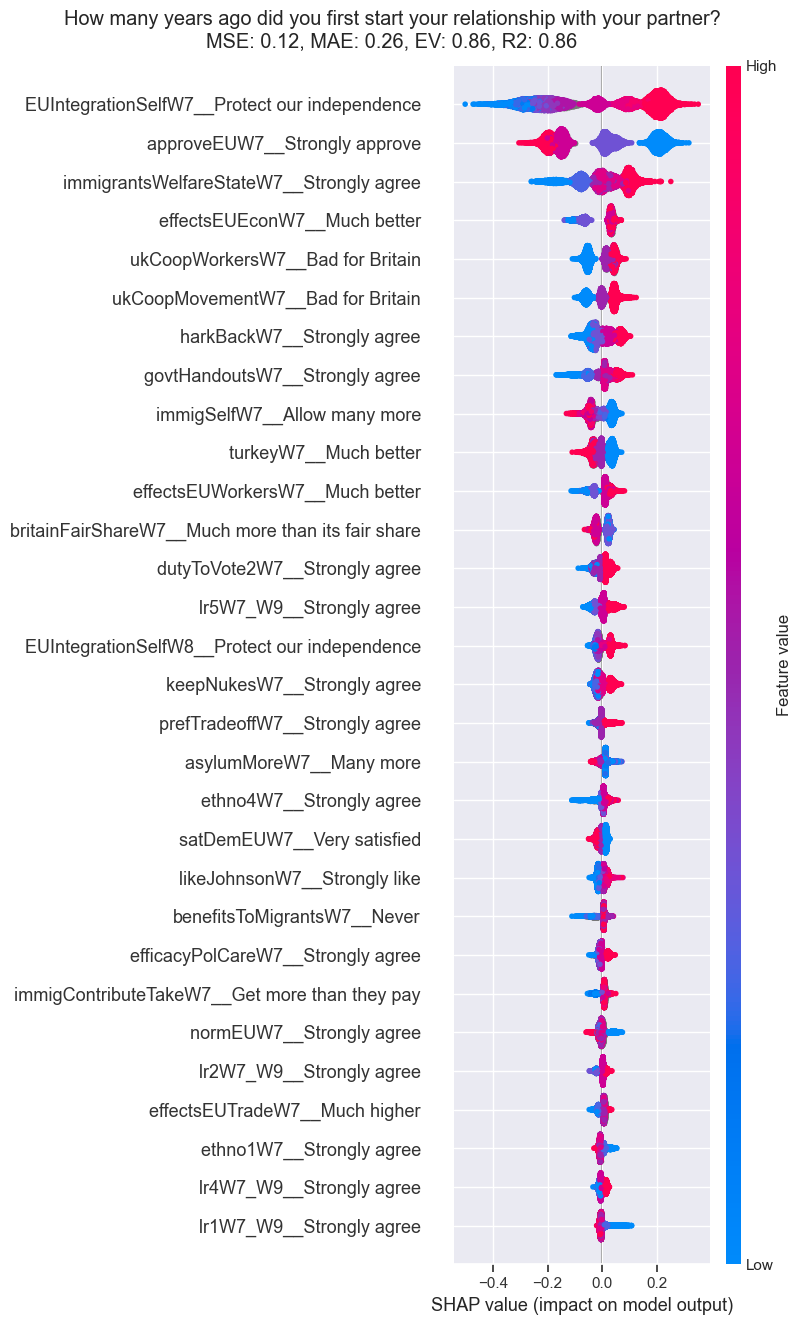

CPU times: total: 1h 1min 32s
Wall time: 10min 18s


In [925]:
%%time
name = "euroW7"
BES_reduced_with_na[fname_stub] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,name.split("W")[0],"eu","echr","UKsovereignty","al"],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for aomW7 
 
 
   
 r 
 p 
 N 
 
 
 
 
 aom7W7__Strongly agree 
 0.850000 
 0.00 
 6247 
 
 
 aom6W7__Strongly agree 
 0.740000 
 0.00 
 6247 
 
 
 al_scaleW7_W9__Authoritarian 
 0.600000 
 0.00 
 6247 
 
 
 aom4W7__Strongly agree 
 0.590000 
 0.00 
 6247 
 
 
 al_scaleW13__Authoritarian 
 0.560000 
 0.00 
 3506 
 
 
 strongLeaderW14__Strongly agree 
 0.510000 
 0.00 
 3076 
 
 
 al2W7_W9__Strongly agree 
 0.490000 
 0.00 
 6247 
 
 
 overseasAidW12__Strongly agree 
 0.480000 
 0.00 
 805 
 
 
 aom5W7__Strongly agree 
 0.470000 
 0.00 
 6247 
 
 
 al4W7_W9__Strongly agree 
 0.470000 
 0.00 
 6247 
 
 
 al2W6__Strongly agree 
 0.470000 
 0.00 
 4191 
 
 
 immigContributeTakeW7__Get more than they pay 
 0.460000 
 0.00 
 5385 
 
 
 immigrantsWelfareStateW1__Strongly agree 
 0.460000 
 0.00 
 3466 
 
 
 nhsEUW14__Strongly agree 
 0.450000 
 0.00 
 2813 
 
 
 al3W17_W19__Strongly agree 
 0.440000 
 0.00 
 2393 
 
 
 al1W13__Strongly agree 
 0.440000 
 0.00 
 3686 
 
 
 al1W7_W9__Strongly agree 
 0.440000 
 0.00 
 6247 
 
 
 al3W21__Strongly agree 
 0.440000 
 0.00 
 1937 
 
 
 britChristianW11__Very important 
 0.440000 
 0.00 
 3639 
 
 
 euPriorityBalanceW12__Control immigration 
 0.440000 
 0.00 
 3788 
 
 
 

 
 Top 20 negative (spearman) correlations for aomW7 
 
 
   
 r 
 p 
 N 
 
 
 
 
 aom2W7__Strongly agree 
 -0.590000 
 0.00 
 6247 
 
 
 aom3W7__Strongly agree 
 -0.530000 
 0.00 
 6247 
 
 
 redistBrexitW25__Government should be less[...] 
 -0.490000 
 0.00 
 1055 
 
 
 cvEconBrexitW21__Save the economy even if it[...] 
 -0.460000 
 0.00 
 822 
 
 
 immigSelfW12__Allow many more 
 -0.440000 
 0.00 
 788 
 
 
 immigEconW8__Good for economy 
 -0.440000 
 0.00 
 4845 
 
 
 asylumMoreW7__Many more 
 -0.430000 
 0.00 
 6025 
 
 
 paperLast3_10W18_Yes 
 -0.420000 
 0.00 
 1544 
 
 
 redistUKIPW7__Government should be less concerned[...] 
 -0.420000 
 0.00 
 4526 
 
 
 p_edlevelW12__Postgrad 
 -0.410000 
 0.00 
 3445 
 
 
 lrBrexitW21__Right 
 -0.410000 
 0.00 
 1107 
 
 
 p_edlevelUniW12__Postgrad 
 -0.400000 
 0.00 
 3791 
 
 
 immigCulturalW2__Enriches cultural life 
 -0.400000 
 0.00 
 3682 
 
 
 tryReduceInequalityGrnW4_Yes 
 -0.390000 
 0.00 
 3666 
 
 
 auth2W10_Self-reliance 
 -0.370000 
 0.00 
 3388 
 
 
 p_education_ageW8__Still at school/Full time[...] 
 -0.360000 
 0.00 
 4885 
 
 
 euLeaveBigBusinessW13__Much more likely 
 -0.360000 
 0.00 
 3484 
 
 
 europeannessW9__Very strongly European 
 -0.350000 
 0.00 
 4737 
 
 
 lrUKIPW16__Right 
 -0.350000 
 0.00 
 1793 
 
 
 euFinancialHelpW7__Strongly agree 
 -0.350000 
 0.00 
 6015

MSE: 0.32, MAE: 0.44, EV: 0.60, R2: 0.60


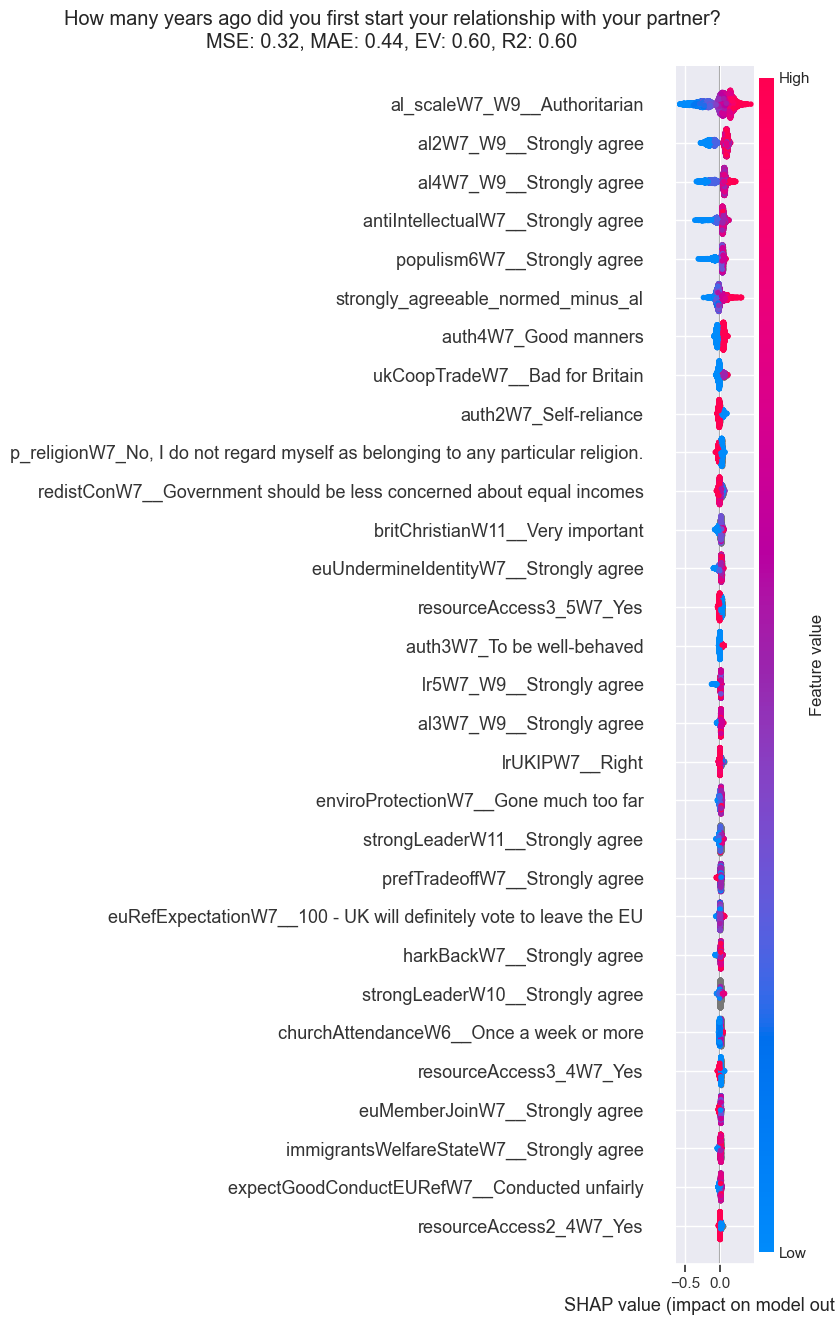

CPU times: total: 15min 48s
Wall time: 3min 32s


In [934]:
%%time
name = "aomW7"
BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,name.split("W")[0]],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for authLongW10 
 
 
   
 r 
 p 
 N 
 
 
 
 
 al_scaleW10_W12__Authoritarian 
 0.830000 
 0.00 
 5948 
 
 
 al3W10_W12__Strongly agree 
 0.740000 
 0.00 
 5948 
 
 
 al_scaleW13__Authoritarian 
 0.740000 
 0.00 
 3914 
 
 
 al1W10_W12__Strongly agree 
 0.740000 
 0.00 
 5948 
 
 
 al5W10_W12__Strongly agree 
 0.680000 
 0.00 
 5948 
 
 
 al3W13__Strongly agree 
 0.650000 
 0.00 
 4153 
 
 
 al1W23__Strongly agree 
 0.650000 
 0.00 
 2255 
 
 
 al2W10_W12__Strongly agree 
 0.620000 
 0.00 
 5948 
 
 
 al5W23__Strongly agree 
 0.610000 
 0.00 
 2274 
 
 
 al2W13__Strongly agree 
 0.590000 
 0.00 
 4068 
 
 
 immigrantsWelfareStateW3__Strongly agree 
 0.570000 
 0.00 
 2516 
 
 
 authLong2W10__Strongly agree 
 0.520000 
 0.00 
 5948 
 
 
 govtHandoutsW20__Strongly agree 
 0.520000 
 0.00 
 2012 
 
 
 dealPriorityImmigW15__Extremely important 
 0.520000 
 0.00 
 2995 
 
 
 overseasAidW11__Strongly agree 
 0.520000 
 0.00 
 4271 
 
 
 euPriorityBalanceW11__Control immigration 
 0.510000 
 0.00 
 4017 
 
 
 immigContributeTakeW7__Get more than they pay 
 0.510000 
 0.00 
 3068 
 
 
 euParlOverRideW7__Strongly agree 
 0.510000 
 0.00 
 3449 
 
 
 UKsovereigntyW8__Strongly agree 
 0.490000 
 0.00 
 3909 
 
 
 euUndermineIdentityW8__Strongly agree 
 0.490000 
 0.00 
 3909 
 
 
 

 
 Top 20 negative (spearman) correlations for authLongW10 
 
 
   
 r 
 p 
 N 
 
 
 
 
 authLong1W10__Strongly agree 
 -0.670000 
 0.00 
 5948 
 
 
 authLong4W10__Strongly agree 
 -0.660000 
 0.00 
 5948 
 
 
 immigSelfW12__Allow many more 
 -0.570000 
 0.00 
 532 
 
 
 asylumMoreW25__Many more 
 -0.550000 
 0.00 
 961 
 
 
 immigEconW3__Good for economy 
 -0.540000 
 0.00 
 2491 
 
 
 immigCulturalW7__Enriches cultural life 
 -0.520000 
 0.00 
 3448 
 
 
 paperLast3_10W18_Yes 
 -0.490000 
 0.00 
 1502 
 
 
 euFinancialHelpW2__Strongly agree 
 -0.490000 
 0.00 
 2467 
 
 
 eesEUIntegrationSelfW3__Unification should be[...] 
 -0.490000 
 0.00 
 2183 
 
 
 natSecuritySelfW13__Protect civil liberties 
 -0.490000 
 0.00 
 3876 
 
 
 echrW8__Strongly agree 
 -0.490000 
 0.00 
 3898 
 
 
 euLawsLevelW8__Strongly agree 
 -0.470000 
 0.00 
 3892 
 
 
 immigrationLevelW6__Increased a lot 
 -0.470000 
 0.00 
 2841 
 
 
 warmSyriansW11__Very warm 
 -0.460000 
 0.00 
 3921 
 
 
 euUKRichW8__Strongly agree 
 -0.450000 
 0.00 
 3813 
 
 
 familiesMoreW7__Many more 
 -0.450000 
 0.00 
 3374 
 
 
 immigExpDVW2__Strongly agree 
 -0.450000 
 0.00 
 1522 
 
 
 likeLucasW11__Strongly like 
 -0.450000 
 0.00 
 2946 
 
 
 bestPMW8_Jeremy Corbyn 
 -0.440000 
 0.00 
 1981 
 
 
 likeSNPW18__Strongly like 
 -0.440000 
 0.00 
 2812

MSE: 0.34, MAE: 0.43, EV: 0.74, R2: 0.74


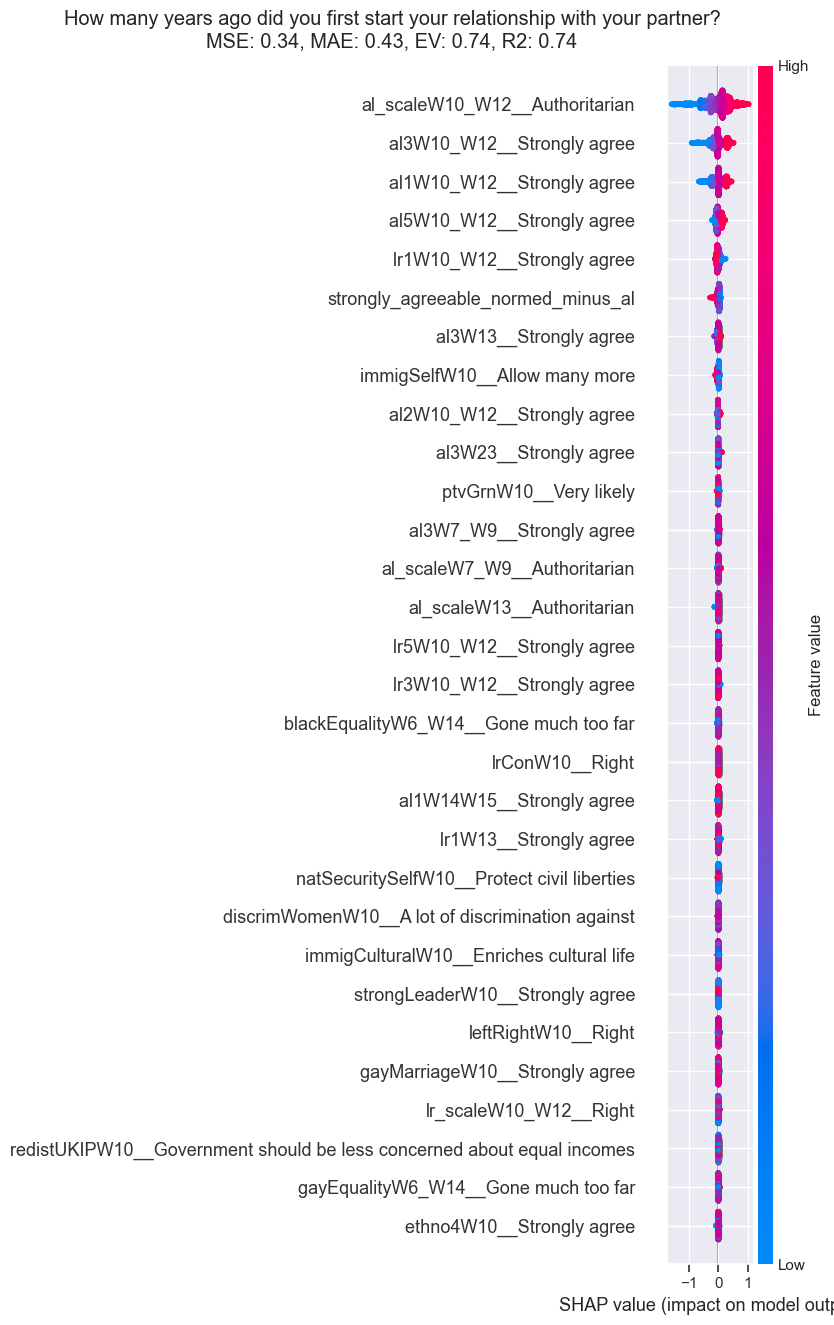

CPU times: total: 9min 59s
Wall time: 2min 25s


In [935]:
%%time
name = "authLongW10"
BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,name.split("W")[0]],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for sdoDomAndAntiEgalW15 
 
 
   
 r 
 p 
 N 
 
 
 
 
 sdodominance1W15__Strongly favour 
 0.750000 
 0.00 
 4017 
 
 
 sdoantiegal2W15__Strongly favour 
 0.740000 
 0.00 
 4017 
 
 
 sdodominance2W15__Strongly favour 
 0.700000 
 0.00 
 4017 
 
 
 sdoantiegal1W15__Strongly favour 
 0.590000 
 0.00 
 4017 
 
 
 leftRightW18__Right 
 0.520000 
 0.00 
 2350 
 
 
 al_scaleW14W15__Authoritarian 
 0.490000 
 0.00 
 4017 
 
 
 likeConW11__Strongly like 
 0.460000 
 0.00 
 2153 
 
 
 al_scaleW17_W19__Authoritarian 
 0.450000 
 0.00 
 2382 
 
 
 generalElectionVoteUnsqueezeW11_Conservative 
 0.450000 
 0.00 
 1509 
 
 
 ptvConW21__Very likely 
 0.450000 
 0.00 
 1909 
 
 
 likeMayW11__Strongly like 
 0.440000 
 0.00 
 2147 
 
 
 approveUKGovtW11__Strongly approve 
 0.440000 
 0.00 
 2182 
 
 
 ethnoW10 
 0.440000 
 0.00 
 1699 
 
 
 authLongW10 
 0.440000 
 0.00 
 1789 
 
 
 al1W14W15__Strongly agree 
 0.430000 
 0.00 
 4017 
 
 
 redistSelfW22__Government should be less concerned[...] 
 0.420000 
 0.00 
 1820 
 
 
 conLookAfterBAW19__Very closely 
 0.420000 
 0.00 
 1869 
 
 
 handleEUNegotiateW11__Very well 
 0.420000 
 0.00 
 2115 
 
 
 govtHandoutsW20__Strongly agree 
 0.420000 
 0.00 
 1982 
 
 
 generalElectionVoteW11_Conservative 
 0.420000 
 0.00 
 1964 
 
 
 

 
 Top 20 negative (spearman) correlations for sdoDomAndAntiEgalW15 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestPMW8_Jeremy Corbyn 
 -0.470000 
 0.00 
 936 
 
 
 changeEconomyLabW12__Getting a lot better 
 -0.410000 
 0.00 
 2177 
 
 
 preferConMajorityW4__Ranked fifth 
 -0.410000 
 0.00 
 1290 
 
 
 ptvLabW13__Very likely 
 -0.410000 
 0.00 
 2224 
 
 
 likeLabW17__Strongly like 
 -0.410000 
 0.00 
 2454 
 
 
 likeCorbynW18__Strongly like 
 -0.400000 
 0.00 
 2720 
 
 
 lr1W23__Strongly agree 
 -0.400000 
 0.00 
 2002 
 
 
 generalElectionVoteUnsqueezeW12_Labour 
 -0.400000 
 0.00 
 1451 
 
 
 lr1W17_W19__Strongly agree 
 -0.390000 
 0.00 
 2467 
 
 
 asylumMoreW25__Many more 
 -0.390000 
 0.00 
 965 
 
 
 likeGrnW4__Strongly like 
 -0.390000 
 0.00 
 670 
 
 
 echrW15__Strongly agree 
 -0.380000 
 0.00 
 3868 
 
 
 welfarePreferenceW11__Much too low 
 -0.380000 
 0.00 
 1916 
 
 
 generalElectionVoteW8_Labour 
 -0.380000 
 0.00 
 1628 
 
 
 bestOnMIIW13_Labour 
 -0.370000 
 0.00 
 1959 
 
 
 paperLast3_10W18_Yes 
 -0.360000 
 0.00 
 1284 
 
 
 changeEducationLabW12__Getting a lot better 
 -0.360000 
 0.00 
 2143 
 
 
 abolishPrivSchoolW17__Strongly support 
 -0.360000 
 0.00 
 2472 
 
 
 cutsTooFarNationalW6__Gone much too far 
 -0.360000 
 0.00 
 1327 
 
 
 likeSturgeonW11__Strongly like 
 -0.360000 
 0.00 
 2095

MSE: 0.36, MAE: 0.47, EV: 0.45, R2: 0.45


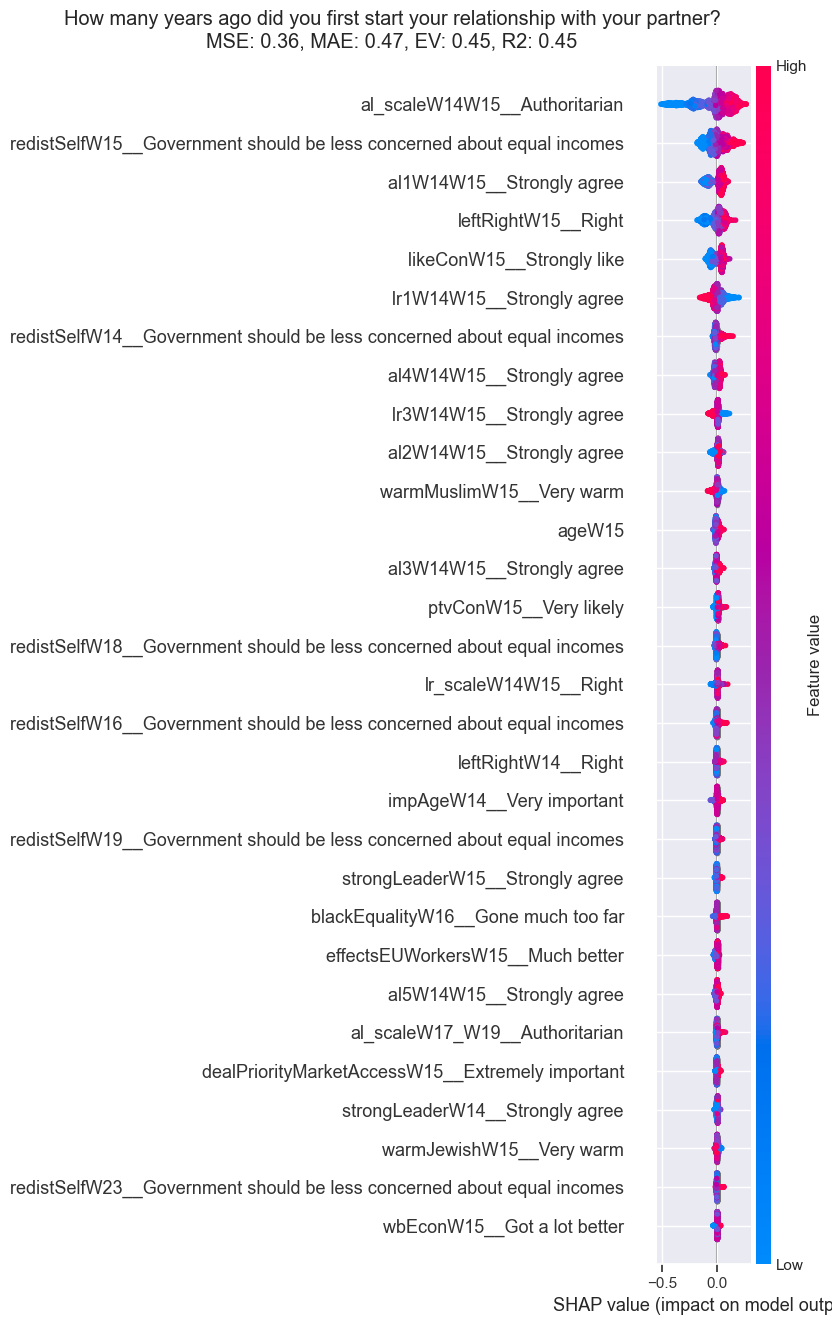

CPU times: total: 8min 5s
Wall time: 1min 56s


In [940]:
%%time
name = "sdoDomAndAntiEgalW15"
BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,name.split("W")[0],"sdo"],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for ethnoW10 
 
 
   
 r 
 p 
 N 
 
 
 
 
 al_scaleW10_W12__Authoritarian 
 0.800000 
 0.00 
 21942 
 
 
 ethno5W10__Strongly agree 
 0.730000 
 0.00 
 21942 
 
 
 ethno2W10__Strongly agree 
 0.720000 
 0.00 
 21942 
 
 
 al_scaleW13__Authoritarian 
 0.720000 
 0.00 
 14568 
 
 
 al1W10_W12__Strongly agree 
 0.700000 
 0.00 
 21942 
 
 
 authLongW10 
 0.690000 
 0.00 
 5427 
 
 
 al3W10_W12__Strongly agree 
 0.650000 
 0.00 
 21942 
 
 
 al5W10_W12__Strongly agree 
 0.640000 
 0.00 
 21942 
 
 
 al1W13__Strongly agree 
 0.630000 
 0.00 
 15202 
 
 
 ethno4W10__Strongly agree 
 0.620000 
 0.00 
 21942 
 
 
 al2W10_W12__Strongly agree 
 0.610000 
 0.00 
 21942 
 
 
 immigrantsWelfareStateW8__Strongly agree 
 0.590000 
 0.00 
 14586 
 
 
 al3W13__Strongly agree 
 0.580000 
 0.00 
 15369 
 
 
 al2W13__Strongly agree 
 0.580000 
 0.00 
 15092 
 
 
 al5W13__Strongly agree 
 0.580000 
 0.00 
 15258 
 
 
 euPriorityBalanceW12__Control immigration 
 0.570000 
 0.00 
 15295 
 
 
 euParlOverRideW8__Strongly agree 
 0.570000 
 0.00 
 14554 
 
 
 EUIntegrationSelfW12__Protect our independence 
 0.560000 
 0.00 
 15617 
 
 
 euUndermineIdentityW7__Strongly agree 
 0.560000 
 0.00 
 12716 
 
 
 dealPriorityImmigW15__Extremely important 
 0.560000 
 0.00 
 10930 
 
 
 

 
 Top 20 negative (spearman) correlations for ethnoW10 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigSelfW12__Allow many more 
 -0.580000 
 0.00 
 1976 
 
 
 immigCulturalW13__Enriches cultural life 
 -0.550000 
 0.00 
 15157 
 
 
 asylumMoreW20__Many more 
 -0.540000 
 0.00 
 1773 
 
 
 immigEconW8__Good for economy 
 -0.530000 
 0.00 
 14503 
 
 
 echrW8__Strongly agree 
 -0.520000 
 0.00 
 14510 
 
 
 warmSyriansW11__Very warm 
 -0.520000 
 0.00 
 3675 
 
 
 natSecuritySelfW13__Protect civil liberties 
 -0.510000 
 0.00 
 14535 
 
 
 paperLast3_10W18_Yes 
 -0.500000 
 0.00 
 5686 
 
 
 euLawsLevelW8__Strongly agree 
 -0.500000 
 0.00 
 14523 
 
 
 bestPMW18_Jeremy Corbyn 
 -0.490000 
 0.00 
 1794 
 
 
 eesEUIntegrationSelfW3__Unification should be[...] 
 -0.490000 
 0.00 
 4196 
 
 
 immigrationLevelW6__Increased a lot 
 -0.490000 
 0.00 
 10528 
 
 
 dealVremainW18_Remain in the EU 
 -0.490000 
 0.00 
 9698 
 
 
 likeSturgeonW11__Strongly like 
 -0.480000 
 0.00 
 15443 
 
 
 euLeaveBigBusinessW11__Much more likely 
 -0.480000 
 0.00 
 15160 
 
 
 cantLiveWithEU_4W19_Unacceptable 
 -0.480000 
 0.00 
 2474 
 
 
 likeSNPW18__Strongly like 
 -0.480000 
 0.00 
 10381 
 
 
 warmEasternW11__Very warm 
 -0.480000 
 0.00 
 3722 
 
 
 approveEUW9__Strongly approve 
 -0.470000 
 0.00 
 14186 
 
 
 europeannessW11W12__Very strongly European 
 -0.470000 
 0.00 
 18139

MSE: 0.15, MAE: 0.30, EV: 0.78, R2: 0.78


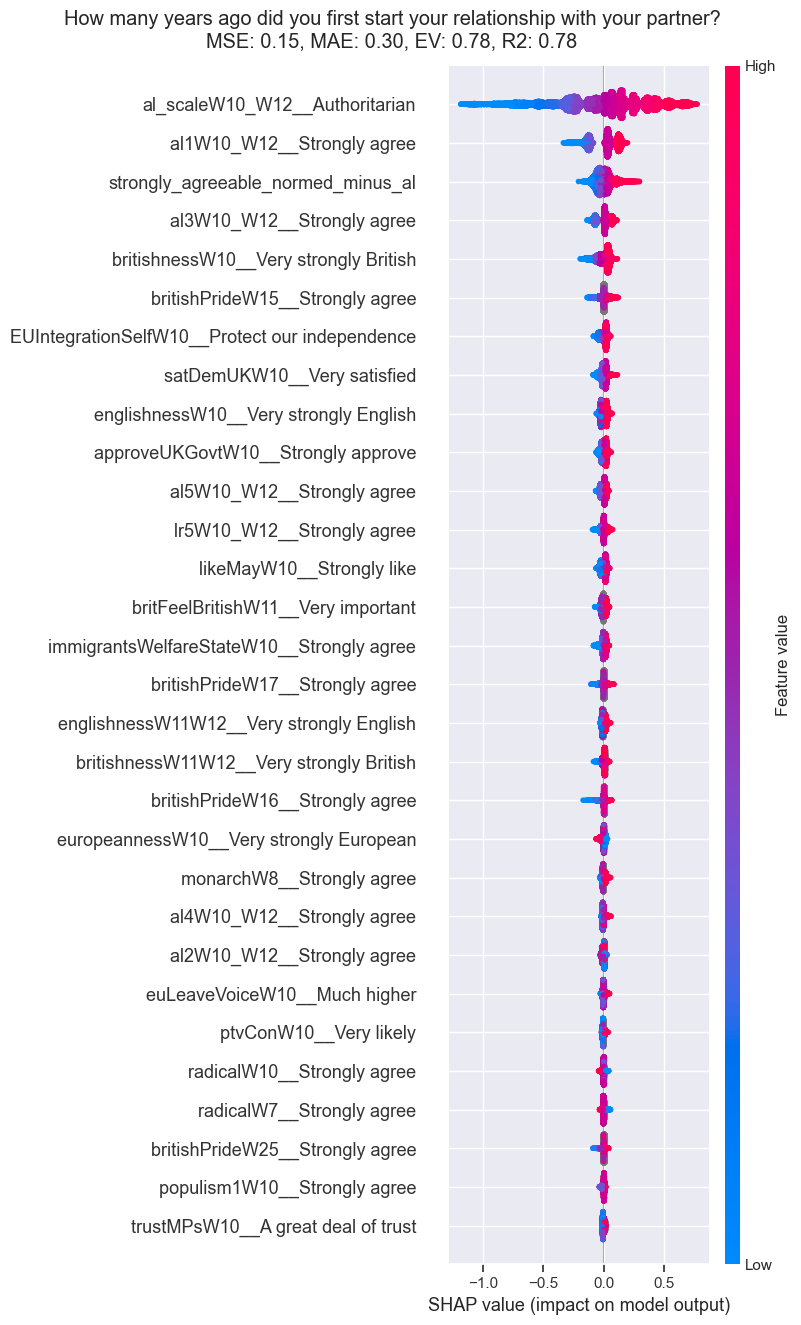

CPU times: total: 1h 23min 5s
Wall time: 13min 41s


In [937]:
%%time
name = "ethnoW10"
BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,name.split("W")[0]],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for empathyW20 
 
 
   
 r 
 p 
 N 
 
 
 
 
 ocfa2EW20_Acq 
 1.000000 
 0.00 
 4372 
 
 
 empathy2W20__Strongly agree 
 0.560000 
 0.00 
 4372 
 
 
 empathy3W20__Strongly agree 
 0.520000 
 0.00 
 4372 
 
 
 empathy1W20__Strongly agree 
 0.480000 
 0.00 
 4372 
 
 
 empathy5W20__Strongly agree 
 0.440000 
 0.00 
 4372 
 
 
 strongly_agreeable_normed_minus_al 
 0.370000 
 0.00 
 4372 
 
 
 al_scaleW6__Authoritarian 
 0.270000 
 0.00 
 1011 
 
 
 al_scaleW1_W5__Authoritarian 
 0.250000 
 0.00 
 1120 
 
 
 lr5W20__Strongly agree 
 0.250000 
 0.00 
 4372 
 
 
 cogempathyIRTW14 
 0.250000 
 0.00 
 1483 
 
 
 immigrantsWelfareStateW1__Strongly agree 
 0.250000 
 0.00 
 877 
 
 
 al2W21__Strongly agree 
 0.240000 
 0.00 
 2167 
 
 
 al5W6__Strongly agree 
 0.240000 
 0.00 
 1048 
 
 
 empathy6W20__Strongly agree 
 0.230000 
 0.00 
 4372 
 
 
 al1W1_W5__Strongly agree 
 0.230000 
 0.00 
 1161 
 
 
 empathy9W20__Strongly agree 
 0.230000 
 0.00 
 4372 
 
 
 immigManipCheck2W2__Very worried 
 0.230000 
 0.00 
 578 
 
 
 empathy8W20__Strongly agree 
 0.230000 
 0.00 
 4372 
 
 
 al5W1_W5__Strongly agree 
 0.220000 
 0.00 
 1160 
 
 
 al2W1_W5__Strongly agree 
 0.220000 
 0.00 
 1158 
 
 
 

 
 Top 20 negative (spearman) correlations for empathyW20 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigCulturalW2__Enriches cultural life 
 -0.220000 
 0.00 
 936 
 
 
 p_gross_householdW2__£150,000 and over 
 -0.200000 
 0.00 
 758 
 
 
 redistUKIPW7__Government should be less concerned[...] 
 -0.190000 
 0.00 
 869 
 
 
 immigEconW2__Good for economy 
 -0.190000 
 0.00 
 929 
 
 
 immigExpDVW2__Strongly agree 
 -0.190000 
 0.00 
 555 
 
 
 immigSelfW9__Allow many more 
 -0.190000 
 0.00 
 1252 
 
 
 lr_scaleW20__Right 
 -0.180000 
 0.00 
 4372 
 
 
 p_edlevelW2__Postgrad 
 -0.170000 
 0.00 
 787 
 
 
 lr_scaleW1_W5__Right 
 -0.170000 
 0.00 
 1142 
 
 
 likeBennettW4__Strongly like 
 -0.170000 
 0.00 
 686 
 
 
 p_education_ageW5__Still at school/Full time[...] 
 -0.170000 
 0.00 
 1068 
 
 
 euFinancialHelpW2__Strongly agree 
 -0.160000 
 0.00 
 915 
 
 
 asylumMoreW8__Many more 
 -0.160000 
 0.00 
 1308 
 
 
 partyIdStrengthW3__Not very strong 
 -0.160000 
 0.00 
 804 
 
 
 redistBrexitW25__Government should be less[...] 
 -0.160000 
 0.00 
 1008 
 
 
 cvEconBrexitW22__Save the economy even if it[...] 
 -0.160000 
 0.00 
 823 
 
 
 likeLucasW10__Strongly like 
 -0.160000 
 0.00 
 808 
 
 
 achieveReduceImmigNoneW4_Yes 
 -0.160000 
 0.00 
 855 
 
 
 mii_catW3_Economy-general 
 -0.160000 
 0.00 
 858 
 
 
 likeBergerW15__Strongly like 
 -0.160000 
 0.00 
 717

MSE: 0.41, MAE: 0.48, EV: 0.16, R2: 0.16


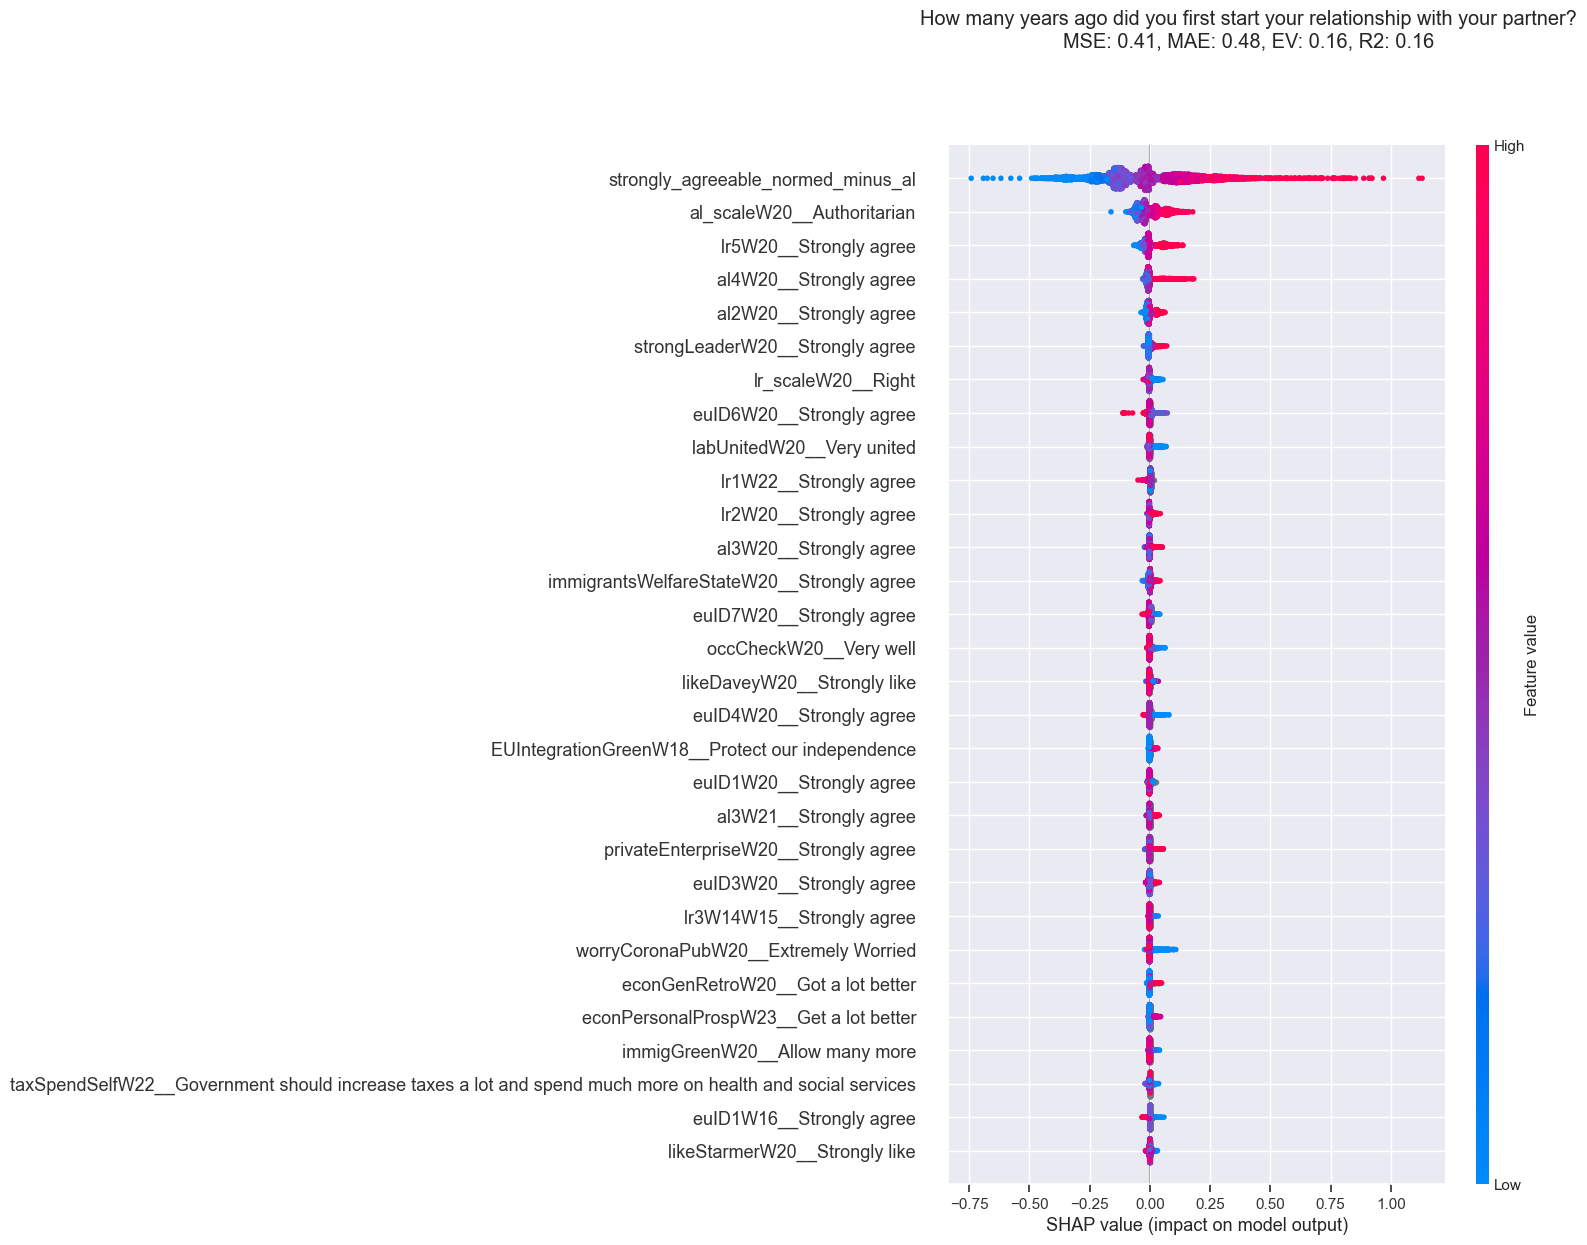

CPU times: total: 5min 53s
Wall time: 1min 38s


In [941]:
%%time
name = "empathyW20"
BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,name.split("W")[0],"ocfa"],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for zeroSumW14 
 
 
   
 r 
 p 
 N 
 
 
 
 
 ocfa2Z_Acq 
 1.000000 
 0.00 
 5836 
 
 
 zeroSum11W14__Strongly agree 
 0.500000 
 0.00 
 5836 
 
 
 zeroSum5W14__Strongly agree 
 0.440000 
 0.00 
 5836 
 
 
 zeroSum9W14__Strongly agree 
 0.440000 
 0.00 
 5836 
 
 
 strongly_agreeable_normed_minus_al 
 0.420000 
 0.00 
 5836 
 
 
 zeroSum4W14__Strongly agree 
 0.410000 
 0.00 
 5836 
 
 
 zeroSum1W14__Strongly agree 
 0.410000 
 0.00 
 5836 
 
 
 al_scaleW14W15__Authoritarian 
 0.390000 
 0.00 
 5836 
 
 
 aomW7 
 0.360000 
 0.00 
 2518 
 
 
 al_scaleW10_W12__Authoritarian 
 0.340000 
 0.00 
 3481 
 
 
 al4W14W15__Strongly agree 
 0.310000 
 0.00 
 5836 
 
 
 ethnoW10 
 0.310000 
 0.00 
 2827 
 
 
 al1W24__Strongly agree 
 0.300000 
 0.00 
 1244 
 
 
 strongLeaderW14__Strongly agree 
 0.300000 
 0.00 
 5674 
 
 
 al2W14W15__Strongly agree 
 0.300000 
 0.00 
 5836 
 
 
 overseasAidW12__Strongly agree 
 0.300000 
 0.00 
 685 
 
 
 al5W14W15__Strongly agree 
 0.290000 
 0.00 
 5836 
 
 
 al2W10_W12__Strongly agree 
 0.280000 
 0.00 
 3603 
 
 
 al3W14W15__Strongly agree 
 0.280000 
 0.00 
 5836 
 
 
 zeroSum7W14__Strongly agree 
 0.270000 
 0.00 
 5836 
 
 
 

 
 Top 20 negative (spearman) correlations for zeroSumW14 
 
 
   
 r 
 p 
 N 
 
 
 
 
 redistBrexitW24__Government should be less[...] 
 -0.270000 
 0.00 
 587 
 
 
 tryReduceInequalityGrnW4_Yes 
 -0.240000 
 0.00 
 2200 
 
 
 cvEconBrexitW21__Save the economy even if it[...] 
 -0.240000 
 0.00 
 993 
 
 
 immigSelfW12__Allow many more 
 -0.230000 
 0.00 
 661 
 
 
 redistUKIPW7__Government should be less concerned[...] 
 -0.230000 
 0.00 
 2069 
 
 
 p_edlevelW1__Postgrad 
 -0.230000 
 0.00 
 1787 
 
 
 asylumMoreW8__Many more 
 -0.220000 
 0.00 
 3262 
 
 
 p_edlevelUniW8__Postgrad 
 -0.220000 
 0.00 
 3084 
 
 
 immigEconW8__Good for economy 
 -0.200000 
 0.00 
 3287 
 
 
 lrBrexitW21__Right 
 -0.190000 
 0.00 
 1326 
 
 
 auth2W10_Self-reliance 
 -0.190000 
 0.00 
 3144 
 
 
 paperLast3_10W18_Yes 
 -0.190000 
 0.00 
 1692 
 
 
 EUIntegrationBrexitW21__Protect our independence 
 -0.180000 
 0.00 
 1347 
 
 
 immigGreenW7__Allow many more 
 -0.180000 
 0.00 
 1992 
 
 
 resourceAccess3_5W7_Yes 
 -0.180000 
 0.00 
 2749 
 
 
 lrUKIPW11__Right 
 -0.180000 
 0.00 
 2899 
 
 
 lr_scaleW14W15__Right 
 -0.180000 
 0.00 
 5836 
 
 
 EUIntegrationUKIPW11__Protect our independence 
 -0.180000 
 0.00 
 3147 
 
 
 immigCulturalW8__Enriches cultural life 
 -0.180000 
 0.00 
 3316 
 
 
 EUIntegrationConW8__Protect our independence 
 -0.170000 
 0.00 
 3043

MSE: 0.38, MAE: 0.47, EV: 0.28, R2: 0.28


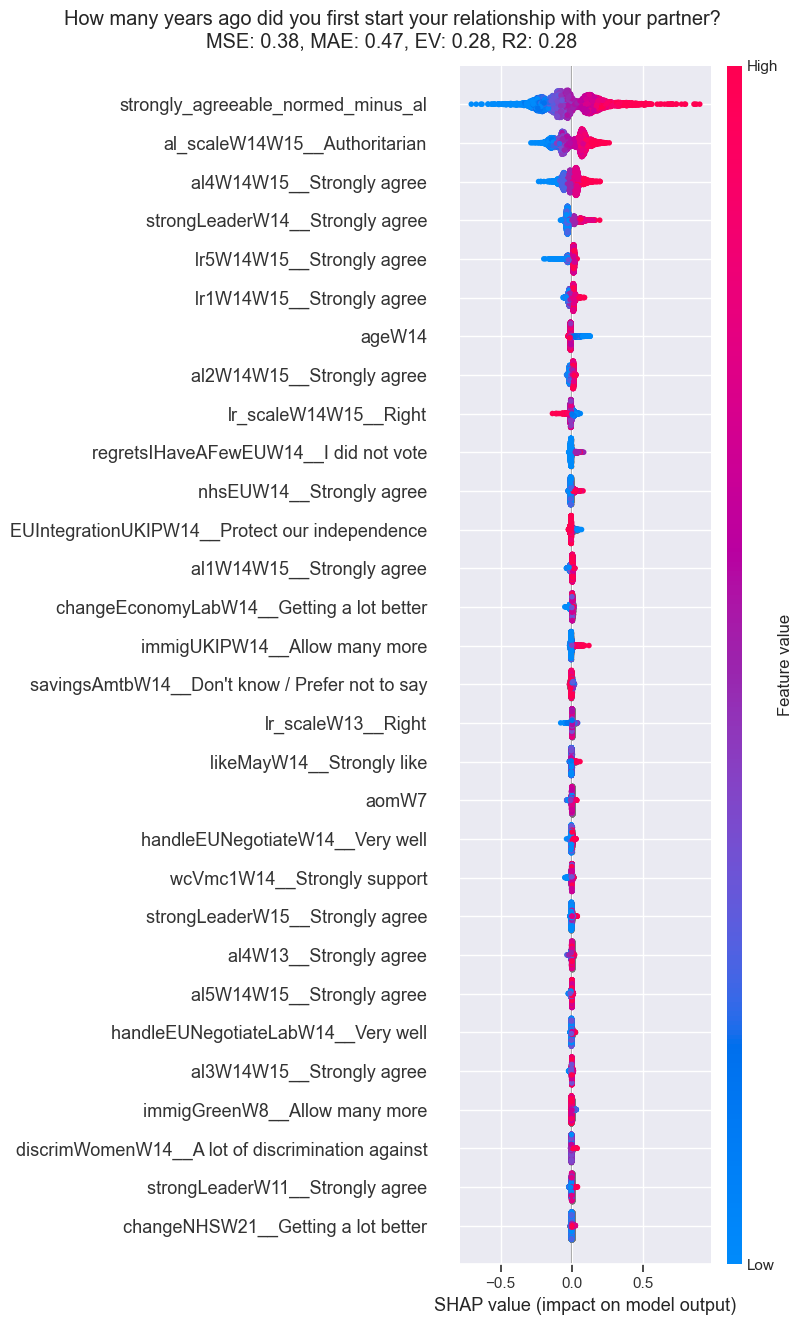

CPU times: total: 6min 13s
Wall time: 1min 43s


In [942]:
%%time
name = "zeroSumW14"
BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,name.split("W")[0],"ocfa"],
                                                    verbosity=0)

In [955]:
%%time
name = "acq_mean"
BES_reduced_with_na[name] = Acq_df[name]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,name.split("W")[0],'ocfa2E_Acq', 'ocfa2Z_Acq', 'ocfa2EW20_Acq',
                                                                     'aomW7', 'authLongW10',
       'sdoDomAndAntiEgalW15', 'ethnoW10', 'empathyW20', 'zeroSumW14'],
                                                    verbosity=0)

#        'strongly_agreeable_normed_minus_al',

Top 20 positive (spearman) correlations for acq_mean 
 
 
   
 r 
 p 
 N 
 
 
 
 
 ethnoW10 
 0.890000 
 0.00 
 21942 
 
 
 authLongW10 
 0.860000 
 0.00 
 5948 
 
 
 empathyW20 
 0.790000 
 0.00 
 4372 
 
 
 al_scaleW7_W9__Authoritarian 
 0.790000 
 0.00 
 33904 
 
 
 ocfa2EW20_Acq 
 0.790000 
 0.00 
 4372 
 
 
 euUndermineIdentityW8__Strongly agree 
 0.760000 
 0.00 
 28648 
 
 
 euParlOverRideW8__Strongly agree 
 0.760000 
 0.00 
 28577 
 
 
 al_scaleW13__Authoritarian 
 0.740000 
 0.00 
 22748 
 
 
 UKsovereigntyW8__Strongly agree 
 0.720000 
 0.00 
 28439 
 
 
 aomW7 
 0.720000 
 0.00 
 6247 
 
 
 zeroSumW14 
 0.700000 
 0.00 
 5836 
 
 
 ocfa2Z_Acq 
 0.700000 
 0.00 
 5836 
 
 
 EUIntegrationSelfW8__Protect our independence 
 0.700000 
 0.00 
 28368 
 
 
 immigrantsWelfareStateW8__Strongly agree 
 0.700000 
 0.00 
 28688 
 
 
 al1W7_W9__Strongly agree 
 0.680000 
 0.00 
 34467 
 
 
 euIDW7_The leave side 
 0.670000 
 0.00 
 5897 
 
 
 euRedTapeW8__Strongly agree 
 0.670000 
 0.00 
 27736 
 
 
 euRefVoteUnsqueezeW8_Leave the EU 
 0.670000 
 0.00 
 22683 
 
 
 al5W7_W9__Strongly agree 
 0.650000 
 0.00 
 34524 
 
 
 euPriorityBalanceW12__Control immigration 
 0.650000 
 0.00 
 24975 
 
 
 

 
 Top 20 negative (spearman) correlations for acq_mean 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigSelfW7__Allow many more 
 -0.690000 
 0.00 
 24900 
 
 
 euLawsLevelW8__Strongly agree 
 -0.680000 
 0.00 
 28473 
 
 
 echrW8__Strongly agree 
 -0.670000 
 0.00 
 28499 
 
 
 immigCulturalW8__Enriches cultural life 
 -0.660000 
 0.00 
 28738 
 
 
 eesEUIntegrationSelfW3__Unification should be[...] 
 -0.650000 
 0.00 
 8145 
 
 
 euUKRichW8__Strongly agree 
 -0.640000 
 0.00 
 28007 
 
 
 immigEconW8__Good for economy 
 -0.640000 
 0.00 
 28497 
 
 
 approveEUW9__Strongly approve 
 -0.630000 
 0.00 
 26224 
 
 
 asylumMoreW7__Many more 
 -0.630000 
 0.00 
 26055 
 
 
 euFinancialHelpW7__Strongly agree 
 -0.620000 
 0.00 
 26001 
 
 
 euScepticismW7__Work towards single European[...] 
 -0.610000 
 0.00 
 6362 
 
 
 euMoreW7__Many more 
 -0.590000 
 0.00 
 26132 
 
 
 controlImmigW8__Complete control 
 -0.590000 
 0.00 
 7073 
 
 
 immigrationLevelW4__Increased a lot 
 -0.580000 
 0.00 
 20827 
 
 
 euCloserW8__Strongly agree 
 -0.580000 
 0.00 
 28579 
 
 
 europeannessW8__Very strongly European 
 -0.580000 
 0.00 
 29059 
 
 
 bestPMW18_Jeremy Corbyn 
 -0.580000 
 0.00 
 2899 
 
 
 warmSyriansW11__Very warm 
 -0.570000 
 0.00 
 5418 
 
 
 britainFairShareW8__Much more than its fair share 
 -0.570000 
 0.00 
 23795 
 
 
 remainVnodealW17_Remain in the EU 
 -0.570000 
 0.00 
 3653

MSE: 0.04, MAE: 0.12, EV: 0.94, R2: 0.94


XGBoostError: [19:20:01] D:\bld\xgboost-split_1712072626037\work\src\common\io.h:232: bad_malloc: Failed to allocate 4015750368 bytes.

In [957]:
gc.collect()

0

In [932]:
Acq_df[name+"_acq"].corr(Acq_df["euroW7"+"_acq"])

0.4901284908694736

In [952]:
Acq_df.corr()

euroW7_acq  euroW8_acq  aomW7_acq  authLongW10_acq  \
euroW7_acq                  1.000000    0.926528   0.490128         0.654313   
euroW8_acq                  0.926528    1.000000   0.498204         0.644620   
aomW7_acq                   0.490128    0.498204   1.000000              NaN   
authLongW10_acq             0.654313    0.644620        NaN         1.000000   
sdoDomAndAntiEgalW15_acq    0.437952    0.446561   0.691025         0.442737   
ethnoW10_acq                0.707479    0.707915   0.497686         0.699922   
ethnoW7_acq                 0.706055    0.693466   0.500171         0.608658   
ethnoW9_acq                 0.724564    0.721055        NaN         0.612219   
empathyW20_acq              0.204589    0.194510   0.325844         0.195049   
empathyW14_acq              0.097594    0.118622   0.306582        -0.370334   
zeroSumW14_acq              0.217595    0.200655   0.355437         0.403364   
acq_mean                    0.914088    0.920149   0.748788         0.876372   

                          sdoDomAndAntiEgalW15_acq  ethnoW10_acq  ethnoW7_acq  \
euroW7_acq                                0.437952      0.707479     0.706055   
euroW8_acq                                0.446561      0.707915     0.693466   
aomW7_acq                                 0.691025      0.497686     0.500171   
authLongW10_acq                           0.442737      0.699922     0.608658   
sdoDomAndAntiEgalW15_acq                  1.000000      0.465550     0.406610   
ethnoW10_acq                              0.465550      1.000000     0.798184   
ethnoW7_acq                               0.406610      0.798184     1.000000   
ethnoW9_acq                               0.430887      0.828397     0.838852   
empathyW20_acq                            0.086864      0.187884     0.194743   
empathyW14_acq                                 NaN      0.157552     0.144125   
zeroSumW14_acq                                 NaN      0.299896     0.293067   
acq_mean                                  0.485597      0.901494     0.870427   

                          ethnoW9_acq  empathyW20_acq  empathyW14_acq  \
euroW7_acq                   0.724564        0.204589        0.097594   
euroW8_acq                   0.721055        0.194510        0.118622   
aomW7_acq                         NaN        0.325844        0.306582   
authLongW10_acq              0.612219        0.195049       -0.370334   
sdoDomAndAntiEgalW15_acq     0.430887        0.086864             NaN   
ethnoW10_acq                 0.828397        0.187884        0.157552   
ethnoW7_acq                  0.838852        0.194743        0.144125   
ethnoW9_acq                  1.000000        0.273846        0.333258   
empathyW20_acq               0.273846        1.000000        0.331576   
empathyW14_acq               0.333258        0.331576        1.000000   
zeroSumW14_acq               0.198204        0.173743             NaN   
acq_mean                     0.894944        0.820420        0.687377   

                          zeroSumW14_acq  acq_mean  
euroW7_acq                      0.217595  0.914088  
euroW8_acq                      0.200655  0.920149  
aomW7_acq                       0.355437  0.748788  
authLongW10_acq                 0.403364  0.876372  
sdoDomAndAntiEgalW15_acq             NaN  0.485597  
ethnoW10_acq                    0.299896  0.901494  
ethnoW7_acq                     0.293067  0.870427  
ethnoW9_acq                     0.198204  0.894944  
empathyW20_acq                  0.173743  0.820420  
empathyW14_acq                       NaN  0.687377  
zeroSumW14_acq                  1.000000  0.730166  
acq_mean                        0.730166  1.000000

In [945]:
Acq_df.corr().mean().index

Index(['euroW7_acq', 'euroW8_acq', 'aomW7_acq', 'authLongW10_acq',
       'sdoDomAndAntiEgalW15_acq', 'ethnoW10_acq', 'ethnoW7_acq',
       'ethnoW9_acq', 'empathyW20_acq', 'empathyW14_acq', 'zeroSumW14_acq'],
      dtype='object')

In [949]:
Acq_df["acq_mean"] = Acq_df[['euroW7_acq', 'euroW8_acq', 'aomW7_acq', 'authLongW10_acq',
       'ethnoW10_acq', 'ethnoW7_acq',
       'ethnoW9_acq', 'empathyW20_acq', 'empathyW14_acq', 'zeroSumW14_acq']].mean(axis=1)

In [920]:
fname_stub

'zeroSumW14'

In [950]:
Acq_df.notnull().sum()

euroW7_acq                  22673
euroW8_acq                  24997
aomW7_acq                    6247
authLongW10_acq              5948
sdoDomAndAntiEgalW15_acq     4017
ethnoW10_acq                21942
ethnoW7_acq                 24800
ethnoW9_acq                  5712
empathyW20_acq               4372
empathyW14_acq               4478
zeroSumW14_acq               5836
acq_mean                    45777
dtype: int64

In [951]:
Acq_df.corrwith( BES_reduced_with_na["strongly_agreeable_normed_minus_al"] )

euroW7_acq                  0.296778
euroW8_acq                  0.299107
aomW7_acq                   0.385954
authLongW10_acq             0.214857
sdoDomAndAntiEgalW15_acq   -0.035618
ethnoW10_acq                0.327792
ethnoW7_acq                 0.317542
ethnoW9_acq                 0.335689
empathyW20_acq              0.397510
empathyW14_acq              0.252952
zeroSumW14_acq              0.446364
acq_mean                    0.350812
dtype: float64

In [906]:
BES_Panel[search(BES_Panel,"empathy\dW20").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).dropna()

empathy1W20  empathy2W20  empathy3W20  empathy4W20  empathy5W20  \
id                                                                        
18              2.0          2.0          2.0          1.0          2.0   
62              2.0          2.0          2.0          0.0          2.0   
116             2.0          2.0          2.0          1.0          2.0   
117             2.0          2.0          2.0          1.0          1.0   
126             3.0          3.0          3.0          0.0          3.0   
...             ...          ...          ...          ...          ...   
102834          1.0          2.0          2.0          1.0          2.0   
102836          2.0          2.0          2.0          1.0          2.0   
102842          2.0          3.0          3.0          0.0          2.0   
102847          2.0          2.0          2.0          1.0          2.0   
102856          2.0          2.0          2.0          1.0          2.0   

        empathy6W20  empathy7W20  empathy8W20  empathy9W20  
id                                                          
18              2.0          1.0          1.0          1.0  
62              2.0          0.0          0.0          0.0  
116             2.0          1.0          1.0          0.0  
117             1.0          1.0          0.0          1.0  
126             2.0          0.0          0.0          0.0  
...             ...          ...          ...          ...  
102834          1.0          1.0          1.0          1.0  
102836          2.0          1.0          1.0          1.0  
102842          2.0          1.0          1.0          1.0  
102847          2.0          0.0          1.0          1.0  
102856          1.0          1.0          1.0          1.0  

[5129 rows x 9 columns]

In [911]:
output_df_dict["empathyW20"]["Acq"].notnull().sum()

4372

In [ ]:
# E:\Users\Gamer\Documents\GitHub\BES_analysis\BES_analysis_code\small data files

In [962]:
file_list = ['euroW7.RData','euroW8.RData','aomW7.RData','authLongW10.RData','sdoDomAndAntiEgalW15.RData','ethnoW10.RData',
 'ethnoW7.RData','ethnoW9.RData','empathyW20.RData','empathyW14.RData','zeroSumW14.RData']

for fname in file_list:
    file_stub = fname.split(".")[0]
    output_df_dict[file_stub].to_pickle(BES_small_data_files+file_stub+".zip",compression='zip')



'..\\BES_analysis_code\\small data files\\'

comp_model  \
id                                                         
1      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
2      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
6      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
7      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
8      LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
...                                                  ...   
51060  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
51061  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
51062  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
51065  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   
51067  LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...   

                                              full_model     id  wave  \
id                                                                      
1      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      1   7.0   
2      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      2   7.0   
6      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      6   7.0   
7      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      7   7.0   
8      LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...      8   7.0   
...                                                  ...    ...   ...   
51060  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51060   7.0   
51061  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51061   7.0   
51062  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51062   7.0   
51065  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51065   7.0   
51067  LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...  51067   7.0   

            edlevel2        edlevel  lr1  lr2  lr3  lr4  ...  euro7  euro8  \
id                                                       ...                 
1                NaN            NaN  4.0  4.0  4.0  4.0  ...    4.0    0.0   
2      Undergraduate      Undergrad  1.0  3.0  2.0  2.0  ...    3.0    1.0   
6               GCSE     GCSE/equiv  4.0  3.0  4.0  4.0  ...    3.0    1.0   
7            A-level  A-level/equiv  3.0  4.0  3.0  4.0  ...    4.0    0.0   
8      Undergraduate      Undergrad  1.0  3.0  2.0  3.0  ...    3.0    1.0   
...              ...            ...  ...  ...  ...  ...  ...    ...    ...   
51060       Postgrad       Postgrad  1.0  3.0  1.0  1.0  ...    1.0    4.0   
51061  Undergraduate      Undergrad  3.0  3.0  3.0  2.0  ...    2.0    1.0   
51062  Undergraduate      Undergrad  3.0  1.0  1.0  1.0  ...    2.0    0.0   
51065            NaN            NaN  2.0  2.0  3.0  2.0  ...    2.0    0.0   
51067        A-level  A-level/equiv  4.0  4.0  4.0  4.0  ...    0.0    4.0   

       LeftUncorrected  AuthUncorrected  LeftCorrected  AuthCorrected  \
id                                                                      
1             1.181951         1.147550       0.541525       1.238610   
2            -0.759933        -0.244177      -0.878254      -0.462793   
6             1.009009         0.632256       0.877251       0.651709   
7             0.772083         1.505840       0.128173       1.417834   
8            -0.531812        -0.825314      -0.805105      -0.982932   
...                ...              ...            ...            ...   
51060        -1.413105        -1.290826      -0.605088      -1.046544   
51061        -0.284535        -0.572463       0.269068      -0.292292   
51062        -1.358332        -0.421247      -0.339647      -0.329556   
51065        -0.633413        -0.098270      -0.485385      -0.047850   
51067         0.955171        -2.651640       1.736363      -2.343190   

              E       Acq  RightUncorrected  RightCorrected  
id                                                           
1     -1.395448  1.383751         -1.181951       -0.541525  
2     -0.241441  0.091645          0.759933        0.878254  
6     -0.138909  0.362899         -1.009009       -0.877251  
7     -0.908701  1.064725         -0.772

In [ ]:
##########################################################################################

In [104]:
value_wt = dict()

value_wt[1] = "W1_W5"
value_wt[2] = "W1_W5"
value_wt[3] = "W1_W5"
value_wt[4] = "W1_W5"
value_wt[5] = "W1_W5"
value_wt[6] = "W6"
value_wt[7] = "W7_W9"
value_wt[8] = "W7_W9"
value_wt[9] = "W7_W9"
value_wt[10] = "W10_W12"
value_wt[11] = "W10_W12"
value_wt[12] = "W10_W12"
value_wt[13] = "W13"
value_wt[14] = "W14W15"
value_wt[15] = "W14W15"
value_wt[16] = "W16"
value_wt[17] = "W17_W19"
value_wt[18] = "W17_W19"
value_wt[19] = "W17_W19"
value_wt[20] = "W20"
value_wt[21] = "W21"
value_wt[22] = "W22"
value_wt[23] = "W23"
value_wt[24] = "W24"
value_wt[25] = "W25"


In [16]:
agree_df = pd.DataFrame(index = BES_Panel.index)

for wave in list(range(1,26)):

    temp = BES_reduced_with_na[search(BES_reduced_with_na,"W"+str(wave)+"__Strongly agree").index]
    temp = temp.drop(search(temp,"^al\d"+value_wt[wave]).index,axis=1)
    temp = (temp-temp.mean())/temp.std()

    agree_df[wave] = temp.mean(axis=1)

# strongly_agreeable_normed_minus_al.hist(bins=100);

In [23]:
(agree_df.corr().sum()-1)/24

1     0.264464
2     0.236020
3     0.286866
4     0.289729
5     0.343173
6     0.382551
7     0.364081
8     0.229140
9     0.407192
10    0.400078
11    0.394879
12    0.344254
13    0.358538
14    0.320830
15    0.358891
16    0.421985
17    0.359055
18    0.122924
19    0.340245
20    0.428467
21    0.414602
22    0.378974
23    0.437674
24    0.372179
25    0.406275
dtype: float64

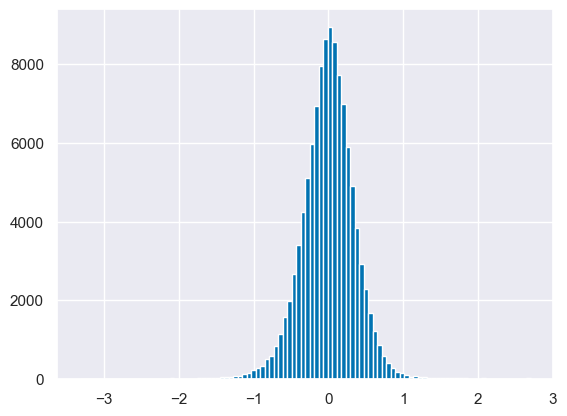

In [57]:
BES_reduced_with_na["doubly_strongly_agreeable"]=agree_df.mean(axis=1)
BES_reduced_with_na["doubly_strongly_agreeable"].hist(bins=100);

In [ ]:
### maybe do the same thing with DKs and Midpoints?

### also think about dummied Strongly Agree variables??

In [197]:
vcs = BES_Panel.stack().value_counts()

In [222]:
vcs.head(60).index

# No, Yes, Don't know, 5, Agree, Disagree, Neitehr agree nor disagree, Strongly agree, Strongly disagree



Index([                                           'No',
                                          'Don't know',
                                                 'Yes',
                                               'Agree',
                                                   '5',
                                                    '',
                                            'Disagree',
                                                   '2',
                                                   '3',
                          'Neither agree nor disagree',
                                      'Strongly agree',
                                                   '4',
                                                   '6',
                                                   '7',
                                    'Strongly dislike',
                                                   '8',
                                                   0.0,
                                                

In [217]:
%%time
dks = BES_Panel=="Don't know"
BES_reduced_with_na["Dontknowishness"] = (dks[dks.columns[dks.mean()!=0]]-dks.mean()[dks.mean()!=0]).mean(axis=1)
BES_reduced_with_na["Dontknowishness"].hist(bins=100)

CPU times: total: 17.3 s
Wall time: 21 s


CPU times: total: 6.25 s
Wall time: 6.38 s


<Axes: >

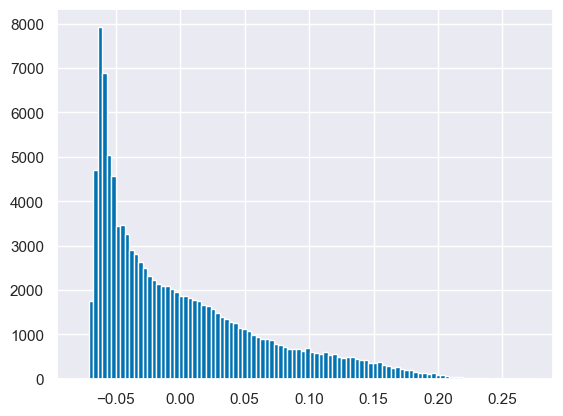

In [220]:
%%time
dks = BES_Panel=="No"
BES_reduced_with_na["Noishness"] = (dks[dks.columns[dks.mean()!=0]]-dks.mean()[dks.mean()!=0]).mean(axis=1)
BES_reduced_with_na["Noishness"].hist(bins=100)

CPU times: total: 7 s
Wall time: 7.04 s


<Axes: >

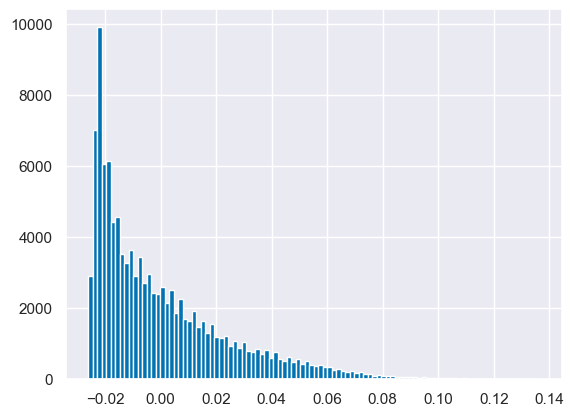

In [221]:
%%time
dks = BES_Panel=="Yes"
BES_reduced_with_na["Yesishness"] = (dks[dks.columns[dks.mean()!=0]]-dks.mean()[dks.mean()!=0]).mean(axis=1)
BES_reduced_with_na["Yesishness"].hist(bins=100)

CPU times: total: 5.59 s
Wall time: 5.59 s


<Axes: >

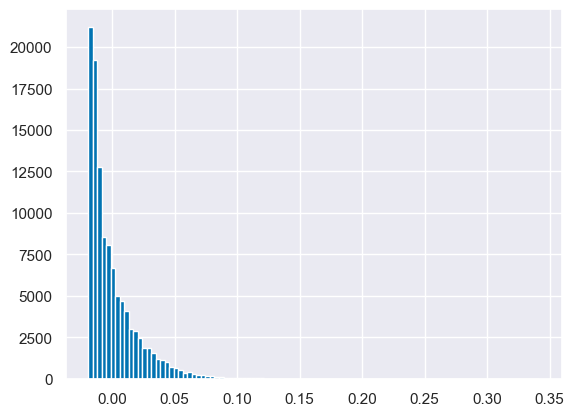

In [223]:
%%time
dks = BES_Panel=="5"
BES_reduced_with_na["5ishness"] = (dks[dks.columns[dks.mean()!=0]]-dks.mean()[dks.mean()!=0]).mean(axis=1)
BES_reduced_with_na["5ishness"].hist(bins=100)

CPU times: total: 4.39 s
Wall time: 4.38 s


<Axes: >

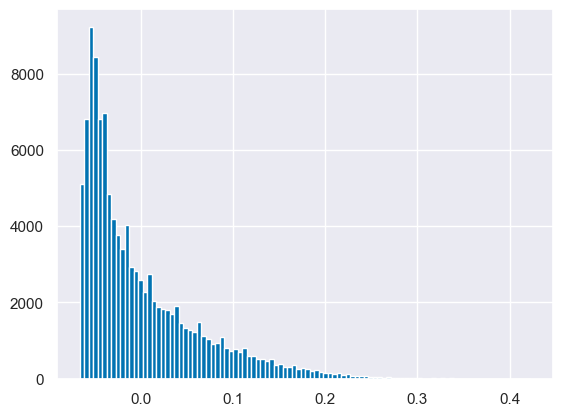

In [224]:
%%time
# Agree, Disagree, Neitehr agree nor disagree, Strongly agree, Strongly disagree
dks = BES_Panel=="Agree"
BES_reduced_with_na["Agreeishness"] = (dks[dks.columns[dks.mean()!=0]]-dks.mean()[dks.mean()!=0]).mean(axis=1)
BES_reduced_with_na["Agreeishness"].hist(bins=100)

CPU times: total: 4.16 s
Wall time: 4.18 s


<Axes: >

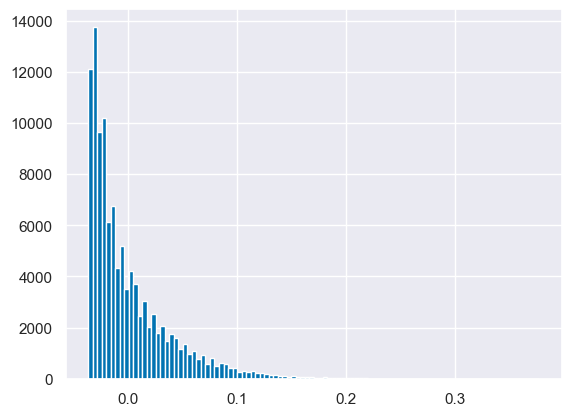

In [225]:
%%time
dks = BES_Panel=="Disagree"
BES_reduced_with_na["Disagreeishness"] = (dks[dks.columns[dks.mean()!=0]]-dks.mean()[dks.mean()!=0]).mean(axis=1)
BES_reduced_with_na["Disagreeishness"].hist(bins=100)

CPU times: total: 4.2 s
Wall time: 4.2 s


<Axes: >

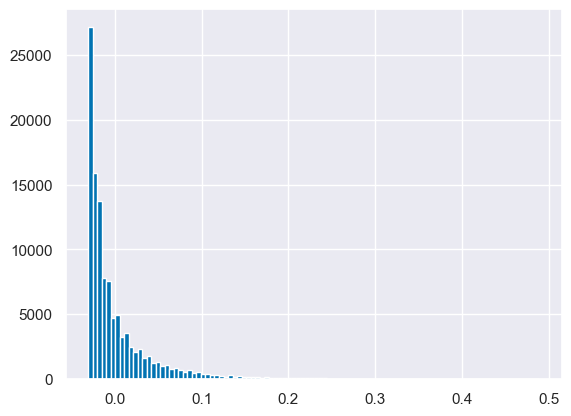

In [226]:
%%time
dks = BES_Panel=="Strongly agree"
BES_reduced_with_na["Strongly_agreeishness"] = (dks[dks.columns[dks.mean()!=0]]-dks.mean()[dks.mean()!=0]).mean(axis=1)
BES_reduced_with_na["Strongly_agreeishness"].hist(bins=100)

CPU times: total: 4.02 s
Wall time: 4.04 s


<Axes: >

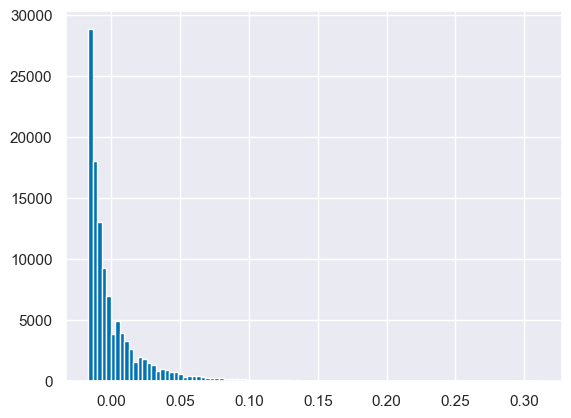

In [227]:
%%time
dks = BES_Panel=="Strongly disagree"
BES_reduced_with_na["Strongly_disagreeishness"] = (dks[dks.columns[dks.mean()!=0]]-dks.mean()[dks.mean()!=0]).mean(axis=1)
BES_reduced_with_na["Strongly_disagreeishness"].hist(bins=100)

CPU times: total: 4.19 s
Wall time: 4.21 s


<Axes: >

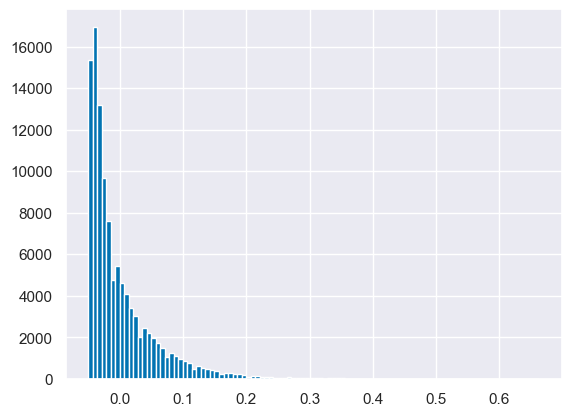

In [228]:
%%time
dks = BES_Panel=="Neither agree nor disagree"
BES_reduced_with_na["Neither_agree_nor_disagreeishness"] = (dks[dks.columns[dks.mean()!=0]]-dks.mean()[dks.mean()!=0]).mean(axis=1)
BES_reduced_with_na["Neither_agree_nor_disagreeishness"].hist(bins=100)

In [233]:
search(BES_Panel,"(start|end)time").head(50)

starttimeW1     30590
starttimeW2     30895
starttimeW3     28574
starttimeW4     31552
starttimeW5     30970
starttimeW6     30258
starttimeW7     30895
starttimeW8     33502
starttimeW9     30036
starttimeW10    30237
starttimeW11    30956
starttimeW12    34394
starttimeW13    31135
starttimeW14    31063
starttimeW15    30842
starttimeW16    37959
starttimeW17    34366
starttimeW18    37825
starttimeW19    32177
starttimeW20    31468
starttimeW21    30281
starttimeW22    28113
starttimeW23    30949
starttimeW24    15439
starttimeW25    30407
endtimeW1       30590
endtimeW2       30895
endtimeW3       28574
endtimeW4       31552
endtimeW5       30970
endtimeW6       30258
endtimeW7       30895
endtimeW8       33502
endtimeW9       30036
endtimeW10      30237
endtimeW11      30956
endtimeW12      34394
endtimeW13      31135
endtimeW14      31063
endtimeW15      30842
endtimeW16      37959
endtimeW17      34366
endtimeW18      37825
endtimeW19      32177
endtimeW20      31468
endtimeW21

In [256]:
BES_reduced_with_na

turnoutUKGeneralW1__Very likely that I will vote  \
id                                                         
1                                                    4.0   
2                                                    4.0   
3                                                    4.0   
4                                                    4.0   
5                                                    4.0   
...                                                  ...   
113062                                               NaN   
113063                                               NaN   
113064                                               NaN   
113065                                               NaN   
113066                                               NaN   

        turnoutUKGeneralW2__Very likely that I will vote  \
id                                                         
1                                                    4.0   
2                                                    NaN   
3                                                    4.0   
4                                                    4.0   
5                                                    4.0   
...                                                  ...   
113062                                               NaN   
113063                                               NaN   
113064                                               NaN   
113065                                               NaN   
113066                                               NaN   

        turnoutUKGeneralW3__Very likely that I will vote  \
id                                                         
1                                                    NaN   
2                                                    4.0   
3                                                    4.0   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
113062                                               NaN   
113063                                               NaN   
113064                                               NaN   
113065                                               NaN   
113066                                               NaN   

        turnoutUKGeneralW4__Very likely that I will vote  \
id                                                         
1                                                    4.0   
2                                                    4.0   
3                                                    4.0   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
113062                                               NaN   
113063                                               NaN   
113064                                               NaN   
113065                                               NaN   
113066                                               NaN   

        turnoutUKGeneralW5__Very likely that I will vote  \
id                                                         
1                                                    4.0   
2                                                    4.0   
3                                                    4.0   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
113062                                               NaN   
113063                                               NaN   
113064                                               NaN   
113065                                               NaN   
113066                                               NaN   

        turnoutUKGeneralW7__Very likely that I will vote  \
id                                         

In [376]:
for wave in range(1,26):
    BES_reduced_with_na["durationW"+str(wave)] = (BES_Panel["endtimeW"+str(wave)] - BES_Panel["starttimeW"+str(wave)]).apply(lambda x: np.nan if pd.isna(x) else x.seconds)
    overflow = BES_reduced_with_na["durationW"+str(wave)]>3000
    BES_reduced_with_na["durationW"+str(wave)+"_overflow"] = np.nan
    BES_reduced_with_na.loc[overflow,"durationW"+str(wave)+"_overflow"] = BES_reduced_with_na.loc[overflow,"durationW"+str(wave)]
    BES_reduced_with_na.loc[overflow,"durationW"+str(wave)] = np.nan

In [284]:
sammael_ser = pd.Series()

for thresh in range(1,20):

    sammael_ser.loc[thresh] = BES_reduced_with_na[search(BES_reduced_with_na,"duration").index][BES_reduced_with_na[search(BES_reduced_with_na,"duration").index]<=(500*thresh)].corr().mean().mean()
#.corr()


<Axes: >

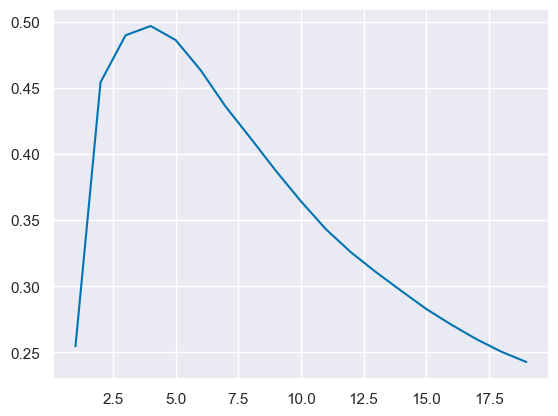

In [285]:
sns.lineplot(sammael_ser)

<Axes: >

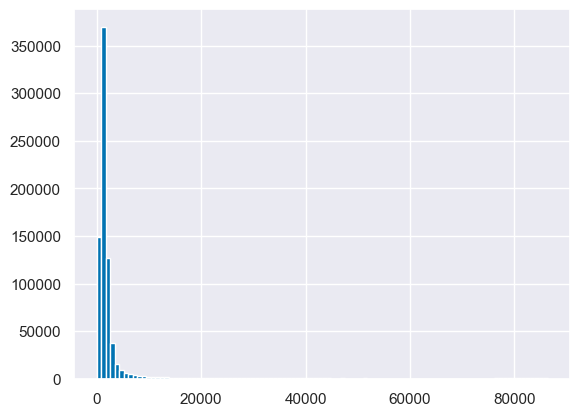

In [262]:
BES_reduced_with_na[search(BES_reduced_with_na,"duration").index].stack().hist(bins=100)

In [290]:
BES_reduced_with_na[search(BES_reduced_with_na,"duration").index].quantile(.9).median()

4354.600000000002

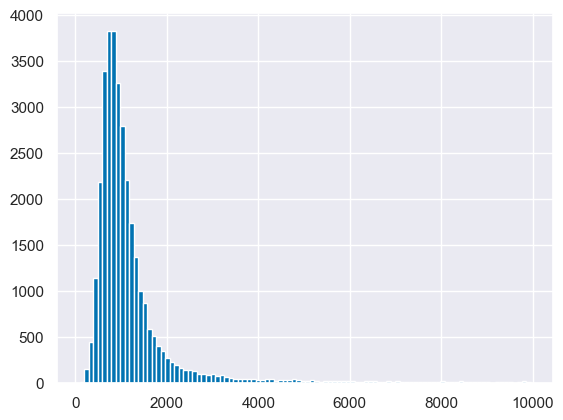

In [292]:
BES_reduced_with_na["durationW12"][BES_reduced_with_na["durationW12"]<10000].hist(bins=100);

In [ ]:
####### SEMOPY #############

In [59]:
import semopy
ex = semopy.examples.example_article
desc , data = ex.get_model() , ex.get_data()
print( desc )


# Measurement part
eta1 =~ y1 + y2 + y3
eta2 =~ y3 + y2
eta3 =~ y4 + y5
eta4 =~ y4 + y6
# Structural part
eta3 ~ x2 + x1
eta4 ~ x3
x3 ~ eta1 + eta2 + x1
x4 ~ eta4 + x6
y7 ~ x4 + x6
# Additional covariances
y6 ~~ y5
x2 ~~ eta2


In [60]:
print( data.head())

         y1        y2        y3        y4        y5        y6        y7  \
0  0.729838 -0.781150 -0.473951 -0.235157  1.788449  1.006386 -1.185177   
1 -1.895332  0.313026 -1.861669 -0.685510  2.521576  0.801619 -0.377373   
2  0.771990 -2.019936 -0.452560  0.179766  0.695212  5.799455  0.501696   
3 -0.956471 -0.374326  0.040394  1.510737  4.147963  0.524349  0.928159   
4  0.959640 -0.997909 -0.299834  1.716303  4.204924  2.931316 -0.139461   

         x2        x3        x4        x1        x6  
0 -0.205913  0.248128  1.984575 -1.187765 -0.025494  
1 -0.379988 -0.111877  2.139032 -0.397323 -0.217159  
2 -1.701278  2.465438  1.908656  0.534365  0.058370  
3 -2.415389  0.464182 -0.089787  0.091094 -0.603859  
4 -1.432744  1.872705  2.284195 -0.851540 -0.343206  


In [61]:
m = semopy.Model( desc )
r = m.fit( data )
print( r )


Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.091
Number of iterations: 58
Params: -0.488 -0.782 -0.183 1.225 1.444 -1.147 -1.344 1.223 1.071 -0.348 1.291 1.454 0.840 -0.388 -0.625 -0.106 1.252 -0.084 1.264 1.182 -0.499 0.870 0.804 1.114 1.010 0.696 0.871 0.844 0.654 0.824 1.097


In [62]:
ins = m.inspect()
print( ins )

    lval  op  rval  Estimate  Std. Err    z-value   p-value
0   eta3   ~    x2 -1.146663  0.065317  -17.55527       0.0
1   eta3   ~    x1 -1.344422  0.076917 -17.478884       0.0
2   eta4   ~    x3  1.222542  0.038071  32.112318       0.0
3     x3   ~  eta1  1.070822  0.287943   3.718868    0.0002
4     x3   ~  eta2 -0.347555  0.146593  -2.370895  0.017745
5     x3   ~    x1  1.291230  0.075725  17.051592       0.0
6     x4   ~  eta4  1.454421  0.041067   35.41557       0.0
7     x4   ~    x6  0.839923   0.06817  12.320923       0.0
8     y1   ~  eta1  1.000000         -          -         -
9     y2   ~  eta1 -0.488414  0.664931  -0.734533  0.462624
10    y2   ~  eta2 -0.781996  0.912859  -0.856646  0.391641
11    y3   ~  eta1 -0.182725  0.140074  -1.304484  0.192069
12    y3   ~  eta2  1.000000         -          -         -
13    y4   ~  eta3  1.000000         -          -         -
14    y4   ~  eta4  1.000000         -          -         -
15    y5   ~  eta3  1.224550  0.048392  

In [64]:
import numpy as np
params = ex.get_params()
mape = np.mean( semopy.utils.compare_results(m , params ))
print('MAPE : {:. f}% ',format( mape * 100))

MAPE : {:. f}%  19.939889286859813


In [65]:
import semopy
ex = semopy.examples.example_article
desc , data = ex.get_model() , ex.get_data()
m = semopy.ModelMeans( desc )
m.fit( data )
print( m.inspect())

    lval  op  rval  Estimate  Std. Err    z-value   p-value
0   eta3   ~    x2 -1.146671  0.065539 -17.495993       0.0
1   eta4   ~    x3  1.222544   0.03795  32.214424       0.0
2     x3   ~  eta1  1.831707  0.727248   2.518683  0.011779
3     x3   ~  eta2 -0.345268  0.143256  -2.410154  0.015946
4     x4   ~  eta4  1.454411  0.040911  35.550814       0.0
5   eta3   ~    x1 -1.344433   0.07717 -17.421604       0.0
6     x3   ~    x1  1.291013  0.075713  17.051312       0.0
7     x4   ~    x6  0.839896  0.068167  12.321151       0.0
8     y7   ~    x6 -0.624860  0.057998 -10.773906       0.0
9     y1   ~  eta1  1.000000         -          -         -
10    y2   ~  eta1  1.212918    1.8049   0.672014  0.501575
11    y2   ~  eta2 -0.753647  0.830757   -0.90718  0.364311
12    y3   ~  eta1 -2.416658  0.644398  -3.750258  0.000177
13    y3   ~  eta2  1.000000         -          -         -
14    y4   ~  eta3  1.000000         -          -         -
15    y4   ~  eta4  1.000000         -  

In [67]:
import numpy as np
params = ex.get_params()
mape = np.mean( semopy.utils.compare_results(m , params ))
print ('MAPE : {:.2 f}% ',format( mape * 100))


MAPE : {:.2 f}%  20.24133317813592


In [69]:
import semopy
ex = semopy.examples.example_article
desc = ex.get_model()
data , k = ex.get_data( random_effects =1)
print ( data.shape , '\n', data.head())


(300, 13) 
          y1        y2        y3        y4        y5        y6        y7  \
0  0.570959 -0.014071  0.467279 -0.815086  2.386323  1.486312 -1.686760   
1 -2.292133 -0.907395 -1.894549  0.939781  2.576540  2.727008  0.503615   
2  0.129772 -0.591307  0.112034 -0.157425 -1.787150  5.156951  0.265526   
3 -1.010035 -0.863170 -1.924978 -0.921666  5.607192  0.939346  0.260975   
4  0.489841 -2.039194  0.264125  0.563737  4.921915  3.049270 -1.087477   

         x2        x3        x4        x1        x6  group  
0 -2.347889 -1.791310  2.655684 -1.187765 -0.025494      0  
1 -1.462239  0.592950  3.906910 -0.397323 -0.217159      1  
2  0.172799  2.823826 -0.256718  0.534365  0.058370      2  
3 -2.192825  1.318076 -0.005204  0.091094 -0.603859      3  
4  0.355360  1.199293  3.305967 -0.851540 -0.343206      4  


In [70]:
print(k)

group       0         1         2         3         4         5         6    \
group                                                                         
0      1.276339  0.173997 -0.710607 -0.229578 -0.038895 -0.041551 -0.106728   
1      0.173997  1.309169 -0.919644 -0.153522 -0.174939 -0.370156  1.068893   
2     -0.710607 -0.919644  1.925128 -0.525704 -0.136755  0.582606 -1.647053   
3     -0.229578 -0.153522 -0.525704  1.432452  0.427417 -0.327594  0.706245   
4     -0.038895 -0.174939 -0.136755  0.427417  1.008045 -0.009405 -0.062295   
...         ...       ...       ...       ...       ...       ...       ...   
295    0.121851 -0.112642  0.321652 -0.636870 -0.784493  0.199025 -0.266807   
296    0.315276  0.173544 -0.686905  0.202466  0.013071 -0.281027  0.293248   
297   -0.804434 -0.336275  0.659232  0.593491  0.319450 -0.069333 -0.360636   
298    0.060165  0.178187 -0.685588  0.554983  0.268504 -0.132512  1.083546   
299    0.033744 -0.255817 -0.092021  0.004187  0.658

In [71]:
m = semopy.ModelEffects( desc ,)
m.fit( data , group ='group', k =k ,)


SolverResult(fun=5012.138698954037, success=True, n_it=160, x=array([ 1.10760418e+01,  2.21712251e+01, -2.61768527e-01,  1.17597532e+00,
        1.42232023e+00, -1.36910412e+00,  1.29446887e+00,  4.57881675e-01,
        8.48032218e-01,  1.52660679e+00, -6.62074646e-01,  4.79378733e-01,
       -9.94703145e-01, -6.46715217e-01, -5.07853534e-01, -8.66994622e-01,
        1.30708811e+00,  1.01061998e+00, -1.00776320e+00, -9.67999906e-01,
        1.22557908e+00,  1.63526876e+00, -5.01337291e-01,  1.43959540e+00,
       -3.84348997e-01, -3.23150673e-01,  2.87691302e-17,  1.67044731e-02,
        1.46297972e+00,  3.26540897e-01, -7.44413947e-01,  2.14861843e+00,
        1.58034387e+00,  3.61621320e-01,  1.81060467e+00,  1.34914475e-17,
        1.62499688e-17,  1.76229093e-17,  1.02675225e-17,  2.67179344e-17,
        0.00000000e+00,  2.21303114e+00,  2.83999347e+01,  3.54142157e+00,
        1.00211191e+00,  2.08781010e+00,  2.44849496e+00,  2.28035273e+00,
        8.18557799e-18,  1.91280499e-1

In [72]:
import numpy as np
params = ex.get_params()
mape = np.mean( semopy.utils.compare_results(m , params ))
print ('MAPE : {:.2 f}% ',format( mape * 100))
# MAPE : 20.69%

MAPE : {:.2 f}%  21.18121355730389


In [73]:
m = semopy.ModelMeans( desc )
m.fit( data )
mape = np.mean( semopy.utils.compare_results(m , params ))
print ('MAPE : {:.2 f}% ',format( mape * 100))


MAPE : {:.2 f}%  57.845238402735156


In [74]:
import semopy
ex = semopy.examples.example_article
desc = ex.get_model()
data , ( k1 , k2 ) = ex.get_data( random_effects =2 , moving_average = True )

In [75]:
from semopy.effects import EffectStatic , EffectMA
ef = [ EffectStatic ('group', k1 ) , EffectStatic ('group', k2 ) ,
    EffectMA ('time', 2)]

In [76]:
m = semopy.ModelGeneralizedEffects( desc , ef )
r = m.fit( data )


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [78]:
import numpy as np
params = ex.get_params()
mape = np.mean( semopy.utils.compare_results(m , params ))
print ('MAPE : {:.2 f}% ',format( mape * 100))


MAPE : {:.2 f}%  inf


In [79]:
import semopy
desc = semopy.examples.example_article.get_model()
print ( desc )


# Measurement part
eta1 =~ y1 + y2 + y3
eta2 =~ y3 + y2
eta3 =~ y4 + y5
eta4 =~ y4 + y6
# Structural part
eta3 ~ x2 + x1
eta4 ~ x3
x3 ~ eta1 + eta2 + x1
x4 ~ eta4 + x6
y7 ~ x4 + x6
# Additional covariances
y6 ~~ y5
x2 ~~ eta2


In [80]:
import semopy
ex = semopy.examples.univariate_regression_many
desc , data = ex.get_model() , ex.get_data()
print ( desc )


y ~ x1 + x2 + x3


In [83]:
desc = '''y ∼ a*x1 + b * x2 + c
# We explicitly define variance parameter :
y ∼∼ v * y
CONSTRAINT(exp(a) + exp(b) = 10)
CONSTRAINT(v < cos(a)^2 + sin(b )^2) '''
m = semopy.Model( desc )
r = m.fit( data )
m.inspect()


KeyError: 'Variables c are missing from data.'

In [84]:
import semopy
import numpy as np
import random
random.seed(123)
ex = semopy.examples.political_democracy
desc , data = ex.get_model() , ex.get_data()
inds = list( np.ndindex( data.shape ))
inds = tuple( zip(*random.sample( inds , 10)))
true_vals = data.values[ inds ]
data.values[ inds ] = np.nan

In [89]:
m = semopy.ModelMeans( desc )
r = m.fit( data , )
pred = m.predict( data ,)[ data.columns ].values[ inds ]
mape = np.mean(abs(( pred - true_vals ) / true_vals )) * 100
mse = np.mean(( pred - true_vals ) ** 2)
print ('MAPE : {:.2 f}% , MSE: {:.2 f}%',( mape , mse ))


MAPE : {:.2 f}% , MSE: {:.2 f}% (14.585509850962266, 0.4149021309311326)


In [ ]:
##################################

In [118]:
value_subset = BES_reduced_with_na[search(BES_reduced_with_na,
    "^empathy\d+W14")\
    .sort_index().index].dropna()
factor_align = value_subset.corr()[value_subset.columns[0]]/value_subset.corr()[value_subset.columns[0]].abs()
print(pg.cronbach_alpha(value_subset*factor_align))
display(value_subset.corr())
display((value_subset.corr().abs().sum().sort_values()-1)/(len(value_subset.columns)-1))
print(semopy.efa.explore_cfa_model(fix_df_var_names(value_subset),min_loadings=2))

(0.8210064437155677, array([0.814, 0.828]))


empathy10W14__Strongly agree  \
empathy10W14__Strongly agree                      1.000000   
empathy1W14__Strongly agree                      -0.231718   
empathy2W14__Strongly agree                      -0.241137   
empathy3W14__Strongly agree                      -0.226842   
empathy4W14__Strongly agree                       0.319776   
empathy5W14__Strongly agree                      -0.292566   
empathy6W14__Strongly agree                      -0.361050   
empathy7W14__Strongly agree                       0.634727   
empathy8W14__Strongly agree                       0.670921   
empathy9W14__Strongly agree                       0.557191   

                              empathy1W14__Strongly agree  \
empathy10W14__Strongly agree                    -0.231718   
empathy1W14__Strongly agree                      1.000000   
empathy2W14__Strongly agree                      0.609992   
empathy3W14__Strongly agree                      0.536659   
empathy4W14__Strongly agree                     -0.267864   
empathy5W14__Strongly agree                      0.351310   
empathy6W14__Strongly agree                      0.193654   
empathy7W14__Strongly agree                     -0.218835   
empathy8W14__Strongly agree                     -0.197583   
empathy9W14__Strongly agree                     -0.123449   

                              empathy2W14__Strongly agree  \
empathy10W14__Strongly agree                    -0.241137   
empathy1W14__Strongly agree                      0.609992   
empathy2W14__Strongly agree                      1.000000   
empathy3W14__Strongly agree                      0.706781   
empathy4W14__Strongly agree                     -0.267810   
empathy5W14__Strongly agree                      0.401781   
empathy6W14__Strongly agree                      0.205032   
empathy7W14__Strongly agree                     -0.242465   
empathy8W14__Strongly agree                     -0.244132   
empathy9W14__Strongly agree                     -0.128214   

                              empathy3W14__Strongly agree  \
empathy10W14__Strongly agree                    -0.226842   
empathy1W14__Strongly agree                      0.536659   
empathy2W14__Strongly agree                      0.706781   
empathy3W14__Strongly agree                      1.000000   
empathy4W14__Strongly agree                     -0.243106   
empathy5W14__Strongly agree                      0.412828   
empathy6W14__Strongly agree                      0.193832   
empathy7W14__Strongly agree                     -0.224395   
empathy8W14__Strongly agree                     -0.231657   
empathy9W14__Strongly agree                     -0.130157   

                              empathy4W14__Strongly agree  \
empathy10W14__Strongly agree                     0.319776   
empathy1W14__Strongly agree                     -0.267864   
empathy2W14__Strongly agree                     -0.267810   
empathy3W14__Strongly agree                     -0.243106   
empathy4W14__Strongly agree                      1.000000   
empathy5W14__Strongly agree                     -0.188594   
empathy6W14__Strongly agree                     -0.018203   
empathy7W14__Strongly agree                      0.375941   
empathy8W14__Strongly agree                      0.374943   
empathy9W14__Strongly agree                      0.212284   

                              empathy5W14__Strongly agree  \
empathy10W14__Strongly agree                    -0.292566   
empathy1W14__Strongly agree                      0.351310   
empathy2W14__Strongly agree                      0.401781   
empathy3W14__Strongly agree                      0.412828   
empathy4W14__Strongly agree                     -0.188594   
empathy5W14__Strongly agree                      1.000000   
empathy6W14__Strongly agree                      0.356846   
empathy7W14__Strongly agree                     -0.294540   
empathy8W14__Strongly agree                     -0.291080   
empathy9W14__Strongly agree                     -

empathy6W14__Strongly agree     0.243650
empathy4W14__Strongly agree     0.252058
empathy9W14__Strongly agree     0.285951
empathy1W14__Strongly agree     0.303451
empathy5W14__Strongly agree     0.308477
empathy3W14__Strongly agree     0.322917
empathy2W14__Strongly agree     0.338594
empathy8W14__Strongly agree     0.382427
empathy7W14__Strongly agree     0.382952
empathy10W14__Strongly agree    0.392881
dtype: float64

eta1 =~ empathy10W14 + empathy8W14 + empathy7W14 + empathy9W14 + empathy5W14 + empathy6W14 + empathy4W14
eta2 =~ empathy2W14 + empathy3W14 + empathy1W14 + empathy5W14 + empathy6W14 + empathy4W14 + empathy9W14



In [119]:
value_subset.columns = ["".join( x.split("W14")[0].split("pathy") ) for x in value_subset.columns]

In [120]:
value_subset

em10  em1  em2  em3  em4  em5  em6  em7  em8  em9
id                                                      
18      1.0  2.0  3.0  2.0  1.0  2.0  2.0  1.0  1.0  2.0
19      0.0  2.0  2.0  3.0  1.0  3.0  3.0  0.0  0.0  0.0
24      2.0  2.0  2.0  2.0  1.0  2.0  1.0  1.0  2.0  2.0
29      1.0  2.0  2.0  2.0  1.0  2.0  2.0  1.0  1.0  1.0
62      0.0  2.0  2.0  2.0  0.0  3.0  2.0  1.0  1.0  0.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
75171   3.0  1.0  1.0  1.0  3.0  1.0  1.0  2.0  2.0  3.0
75174   1.0  3.0  3.0  3.0  0.0  3.0  1.0  1.0  1.0  2.0
75175   1.0  2.0  2.0  2.0  1.0  2.0  2.0  1.0  1.0  1.0
75176   3.0  3.0  3.0  3.0  0.0  2.0  2.0  1.0  0.0  0.0
75180   1.0  2.0  2.0  2.0  1.0  3.0  2.0  1.0  1.0  1.0

[5076 rows x 10 columns]

In [121]:
for item in [1,2,3,4,5]:
    for val in ["al","lr"]:
        value = val+str(item)+value_wt[14]+"__Strongly agree"
        value_subset[val+str(item)] = BES_reduced_with_na.loc[value_subset.index,value]
value_subset = value_subset.dropna()

In [94]:
# comp_model = 'LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthUncorrected =~ al1 + al2 + al3 + al4 + al5'
# full_model = 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthCorrected =~ al1 + al2 + al3 + al4 + al5\nE =~ em1 + em2 + em3 + em4 + em5 + em6 + em7 + em8 + em9 + em10\nAcq =~ a*lr1 + a*lr2 + a*lr3 + a*lr4 + a*lr5 + a*al1 + a*al2 + a*al3 + a*al4 + a*al5 + a*em1 + a*em2 + a*em3 + a*em4 + a*em5 + a*em6 + a*em7 + a*em8 + a*em9 + a*em10'

empathy1W14__Strongly agree    5898
empathy2W14__Strongly agree    7113
empathy3W14__Strongly agree    7293
empathy4W14__Strongly agree    7054
empathy5W14__Strongly agree    7058
empathy6W14__Strongly agree    6818
empathy7W14__Strongly agree    6976
empathy8W14__Strongly agree    7213
empathy9W14__Strongly agree    6930
dtype: int64

In [122]:
data , desc = value_subset, 'LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthUncorrected =~ al1 + al2 + al3 + al4 + al5'

m = semopy.Model( desc )
r = m.fit( data )
m.predict_factors( data ).head()

AuthUncorrected  LeftUncorrected
0        -1.707870         0.925196
1        -1.683508         1.119963
2        -0.973203         0.671934
3         0.219972        -0.333398
4        -0.491703         0.386088

In [131]:
%%time
data , desc = value_subset, 'LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\nAuthCorrected =~ al1 + al2 + al3 + al4 + al5\nE =~ em1 + em2 + em3 + em4 + em5 + em6 + em7 + em8 + em9 + em10\nAcq =~ a*lr1 + a*lr2 + a*lr3 + a*lr4 + a*lr5 + a*al1 + a*al2 + a*al3 + a*al4 + a*al5 + a*em1 + a*em2 + a*em3 + a*em4 + a*em5 + a*em6 + a*em7 + a*em8 + a*em9 + a*em10\n'

m = semopy.Model( desc )
# r = m.fit( data,obj="ULS" )
# m.predict_factors( data ).head()

CPU times: total: 0 ns
Wall time: 1e+03 µs


In [ ]:
#waaay too long!

In [96]:
import semopy
ex = semopy.examples.holzinger39
data , desc = ex.get_data() , ex.get_model()
m = semopy.Model( desc )
r = m.fit( data )
m.predict_factors( data ).head()

speed   textual    visual
0  0.061716 -0.137501 -0.816223
1  0.625629 -1.012812  0.049137
2 -0.840137 -1.872462 -0.761486
3 -0.271071  0.018507  0.419352
4  0.194107 -0.122328 -0.416404

In [100]:
desc

'visual =~ x1 + x2 + x3\ntextual =~ x4 + x5 + x6\nspeed =~ x7 + x8 + x9'

In [139]:
# name = 'doubly_strongly_agreeable'

# df, corr_type = make_corr_summary(BES_reduced_with_na, name)
# display_corr(df,name,corr_type)

In [137]:
corrs = BES_reduced_with_na.corrwith( BES_reduced_with_na["doubly_strongly_agreeable"] )

In [141]:
corrs.sort_values().tail(50)

lr1W24__Strongly agree             0.503845
euID6W19__Strongly agree           0.504417
lr5W22__Strongly agree             0.504436
lr1W22__Strongly agree             0.505363
lr5W17_W19__Strongly agree         0.507950
lr1W10_W12__Strongly agree         0.510736
lr2W10_W12__Strongly agree         0.513321
lr5W24__Strongly agree             0.513800
lr4W25__Strongly agree             0.515494
lr2W13__Strongly agree             0.515600
euID7W12__Strongly agree           0.520079
lr2W24__Strongly agree             0.521812
lr4W23__Strongly agree             0.525038
lr3W14W15__Strongly agree          0.525169
lr3W21__Strongly agree             0.526166
lr3W23__Strongly agree             0.526887
lr2W17_W19__Strongly agree         0.527044
euID7W19__Strongly agree           0.527698
lr3W13__Strongly agree             0.528668
lr5W7_W9__Strongly agree           0.530055
lr5W6__Strongly agree              0.530273
lr2W22__Strongly agree             0.531088
lr1W1_W5__Strongly agree        

In [149]:
Acq_df.mean(axis=1).corr(BES_reduced_with_na["doubly_strongly_agreeable"])

0.21069629516248994

In [158]:
Acq_df.drop("authLongW10_acq",axis=1).corr(min_periods=500)

euroW7_acq  euroW8_acq  aomW7_acq  \
euroW7_acq                  1.000000    0.926528   0.490128   
euroW8_acq                  0.926528    1.000000   0.498204   
aomW7_acq                   0.490128    0.498204   1.000000   
sdoDomAndAntiEgalW15_acq    0.437952    0.446561        NaN   
ethnoW10_acq                0.707479    0.707915   0.497686   
ethnoW7_acq                 0.706055    0.693466   0.500171   
ethnoW9_acq                 0.724564    0.721055        NaN   
empathyW20_acq              0.204589    0.194510        NaN   
empathyW14_acq              0.097594    0.118622        NaN   
zeroSumW14_acq              0.217595    0.200655   0.355437   

                          sdoDomAndAntiEgalW15_acq  ethnoW10_acq  ethnoW7_acq  \
euroW7_acq                                0.437952      0.707479     0.706055   
euroW8_acq                                0.446561      0.707915     0.693466   
aomW7_acq                                      NaN      0.497686     0.500171   
sdoDomAndAntiEgalW15_acq                  1.000000      0.465550     0.406610   
ethnoW10_acq                              0.465550      1.000000     0.798184   
ethnoW7_acq                               0.406610      0.798184     1.000000   
ethnoW9_acq                               0.430887      0.828397     0.838852   
empathyW20_acq                                 NaN      0.187884     0.194743   
empathyW14_acq                                 NaN      0.157552     0.144125   
zeroSumW14_acq                                 NaN      0.299896     0.293067   

                          ethnoW9_acq  empathyW20_acq  empathyW14_acq  \
euroW7_acq                   0.724564        0.204589        0.097594   
euroW8_acq                   0.721055        0.194510        0.118622   
aomW7_acq                         NaN             NaN             NaN   
sdoDomAndAntiEgalW15_acq     0.430887             NaN             NaN   
ethnoW10_acq                 0.828397        0.187884        0.157552   
ethnoW7_acq                  0.838852        0.194743        0.144125   
ethnoW9_acq                  1.000000             NaN             NaN   
empathyW20_acq                    NaN        1.000000        0.331576   
empathyW14_acq                    NaN        0.331576        1.000000   
zeroSumW14_acq                    NaN             NaN             NaN   

                          zeroSumW14_acq  
euroW7_acq                      0.217595  
euroW8_acq                      0.200655  
aomW7_acq                       0.355437  
sdoDomAndAntiEgalW15_acq             NaN  
ethnoW10_acq                    0.299896  
ethnoW7_acq                     0.293067  
ethnoW9_acq                          NaN  
empathyW20_acq                       NaN  
empathyW14_acq                       NaN  
zeroSumW14_acq                  1.000000

In [161]:
Acq_df["euroW7_acq"][Acq_df["empathyW14_acq"].notnull()].dropna()

id
19      -1.888765
29      -0.238479
62      -0.944258
99       0.239356
115      0.387555
           ...   
50714   -1.630870
50883   -1.064828
50940   -1.609626
50978    0.219858
51043   -0.674495
Name: euroW7_acq, Length: 1803, dtype: float64

In [ ]:
BES_reduced_with_na.corrwith( BES_reduced_with_na["doubly_strongly_agreeable"] )

In [169]:
BES_reduced_with_na["authLong_scale"] = (BES_reduced_with_na[search(BES_reduced_with_na,"authLong").index]*[1,-1,1,1]).mean(axis=1)

In [177]:
corrs = BES_reduced_with_na[search(BES_reduced_with_na,".*W10").index].corrwith( BES_reduced_with_na["authLong_scale"] )

In [180]:
corrs.dropna().sort_values().tail(50)

# auth4W14_Good manners
# auth1W19_Respect for elders
# auth2W19_Self-reliance
# auth2W14_Self-reliance


# overseasAidW10__Strongly agree
# harkBackW10__Strongly agree
# antiIntellectualW10__Strongly agree
# refAreGoodW10__Strongly agree                           -0.229716
# populism1W10__Strongly agree
# strongLeaderW10__Strongly agree
# gayMarriageW10__Strongly agree

achieveReduceImmigNoneW10_Yes                                                        0.169223
negotiationSpecifics_2W10_Yes                                                        0.170081
effectsEUImmigrationW10__Much higher                                                 0.171717
lr1W10_W12__Strongly agree                                                           0.172855
partyMemberW10__Yes, I am a member of a party                                        0.173640
anyUniW10__Yes, I graduated from higher education                                    0.175141
lrUKIPW10__Right                                                                     0.176051
ldUnitedW10__Very united                                                             0.176360
likeFarronW10__Strongly like                                                         0.176682
grnUnitedW10__Very united                                                            0.180533
euLeaveScotIndepW10__Much more likely                       

In [183]:
BES_reduced_with_na["lr_scale"] = BES_reduced_with_na[search(BES_reduced_with_na,"lr_scale").index].mean(axis=1)
BES_reduced_with_na["al_scale"] = BES_reduced_with_na[search(BES_reduced_with_na,"al_scale").index].mean(axis=1)

In [184]:
corrs = BES_reduced_with_na.corrwith( BES_reduced_with_na["lr_scale"] )

# redistSelf .55-.65
# ptvCon, likeCon

In [375]:
# corrs.sort_values()[60:].head(60)

In [380]:
drop_list = ['doubly_strongly_agreeable', 'authLong_scale', 'lr_scale', 'al_scale',
       'Dontknowishness', 'Noishness', 'Yesishness', '5ishness',
       'Agreeishness', 'Disagreeishness', 'Strongly_agreeishness',
       'Strongly_disagreeishness', 'Neither_agree_nor_disagreeishness',
       'durationW1', 'durationW2', 'durationW3', 'durationW4', 'durationW5',
       'durationW6', 'durationW7', 'durationW8', 'durationW9', 'durationW10',
       'durationW11', 'durationW12', 'durationW13', 'durationW14',
       'durationW15', 'durationW16', 'durationW17', 'durationW18',
       'durationW19', 'durationW20', 'durationW21', 'durationW22',
       'durationW23', 'durationW24', 'durationW25']
drop_list = drop_list + list(search(pd.DataFrame(corrs).T,"^al\d|al_scale").index)
drop_list = drop_list + list(search(BES_reduced_with_na,"melange|overflow").index)


In [373]:
# corrs.dropna().sort_values().head(60)

In [374]:
# corrs.dropna().sort_values()[:-60].tail(60)


# immigSelf, immigEcon, immigCultural
# immigrantsWelfareStateW2__Strongly agree
# euParlOverRideW7__Strongly agree, overseasAidW10__Strongly agree, euUndermineIdentityW8__Strongly agree 

In [ ]:
### synthetic melange of high al_scale/lr_scale corrs
#     *that have agree/disagree*
#     that don't

In [ ]:
corrs = BES_reduced_with_na.corrwith( BES_reduced_with_na["al_scale"] )
corrs.drop(search(pd.DataFrame(corrs).T,"^al\d|al_scale").index).hist(bins=100);

In [ ]:
# thresh
thresh = .5

temp = corrs[corrs.abs()>thresh].drop(drop_list,errors='ignore').sort_values()

temp2 = BES_reduced_with_na[temp.index]*(temp/temp.abs())
temp3=(temp2-temp2.mean())/temp2.std()
# temp2.loc[temp2.index[::100],temp2.columns].corr().mean().sort_values()
temp3.mean(axis=1).hist(bins=100)
BES_reduced_with_na["al_scale_melange"] = temp3.mean(axis=1)

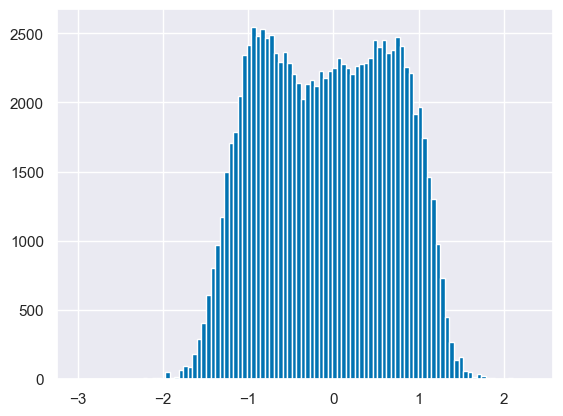

In [364]:
# thresh
thresh = .5

temp = corrs[corrs.abs()>thresh]\
    .drop(drop_list,errors='ignore')\
    .drop(search(pd.DataFrame( corrs ).T,"__Strongly agree").index,errors='ignore').sort_values()

temp2 = BES_reduced_with_na[temp.index]*(temp/temp.abs())
temp3=(temp2-temp2.mean())/temp2.std()
# temp2.loc[temp2.index[::100],temp2.columns].corr().mean().sort_values()
temp3.mean(axis=1).hist(bins=100)
BES_reduced_with_na["al_scale_melange_no_agree"] = temp3.mean(axis=1)

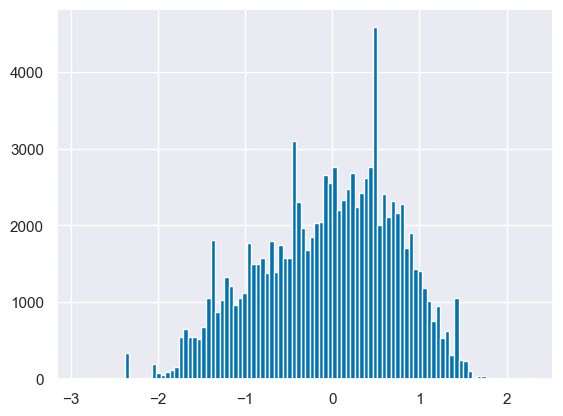

In [368]:
# thresh
thresh = .5

temp = corrs[corrs.abs()>thresh]\
    .drop(drop_list,errors='ignore')

temp = temp[search(pd.DataFrame( temp ).T,"__Strongly agree").index].sort_values()

temp2 = BES_reduced_with_na[temp.index]*(temp/temp.abs())
temp3=(temp2-temp2.mean())/temp2.std()
# temp2.loc[temp2.index[::100],temp2.columns].corr().mean().sort_values()
temp3.mean(axis=1).hist(bins=100)
BES_reduced_with_na["al_scale_melange_agree"] = temp3.mean(axis=1)

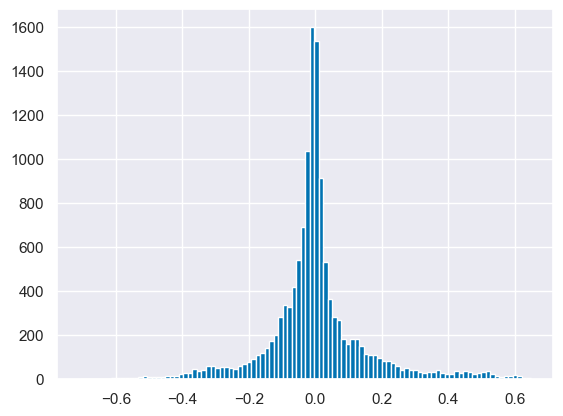

In [369]:
corrs = BES_reduced_with_na.corrwith( BES_reduced_with_na["lr_scale"] )
corrs.drop(search(pd.DataFrame(corrs).T,"^lr\d|lr_scale").index).hist(bins=100);

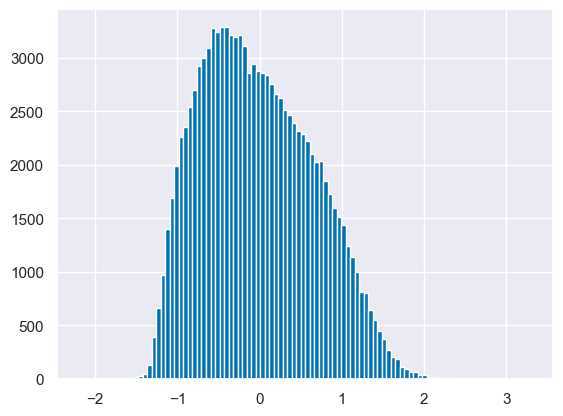

In [370]:
# thresh
thresh = .5
temp = corrs[corrs.abs()>thresh].drop(drop_list,errors='ignore').sort_values()
temp2 = BES_reduced_with_na[temp.index]*(temp/temp.abs())
temp3=(temp2-temp2.mean())/temp2.std()
temp3.mean(axis=1).hist(bins=100)
BES_reduced_with_na["lr_scale_melange"] = temp3.mean(axis=1)

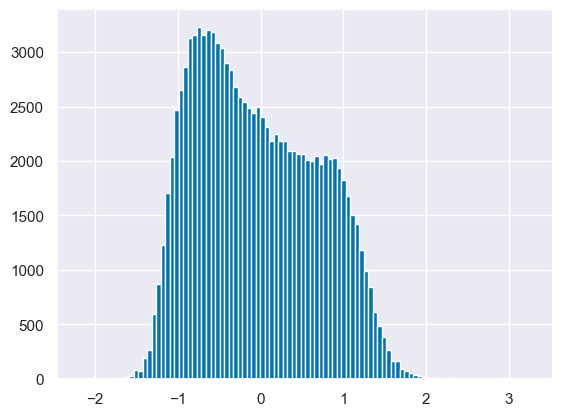

In [371]:
# thresh
thresh = .5
temp = corrs[corrs.abs()>thresh]\
    .drop(drop_list,errors='ignore')\
    .drop(search(pd.DataFrame( corrs ).T,"__Strongly agree").index,errors='ignore').sort_values()
temp2 = BES_reduced_with_na[temp.index]*(temp/temp.abs())
temp3=(temp2-temp2.mean())/temp2.std()
temp3.mean(axis=1).hist(bins=100)
BES_reduced_with_na["lr_scale_melange_no_agree"] = temp3.mean(axis=1)

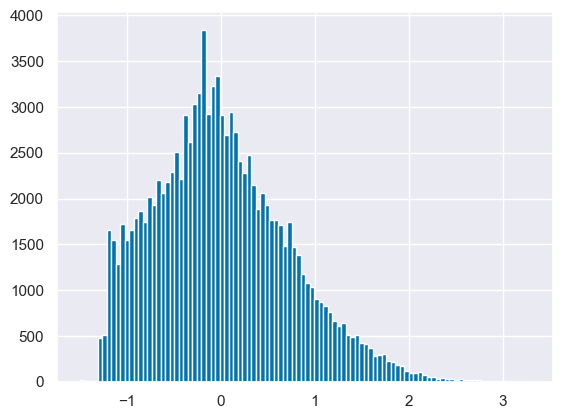

In [372]:
# thresh
thresh = .5
temp = corrs[corrs.abs()>thresh]\
    .drop(drop_list,errors='ignore')
temp = temp[search(pd.DataFrame( temp ).T,"__Strongly agree").index].sort_values()
temp2 = BES_reduced_with_na[temp.index]*(temp/temp.abs())
temp3=(temp2-temp2.mean())/temp2.std()
temp3.mean(axis=1).hist(bins=100)
BES_reduced_with_na["lr_scale_melange_agree"] = temp3.mean(axis=1)

In [378]:
BES_reduced_with_na.columns[-50:]

Index(['durationW7', 'durationW8', 'durationW9', 'durationW10', 'durationW11',
       'durationW12', 'durationW13', 'durationW14', 'durationW15',
       'durationW16', 'durationW17', 'durationW18', 'durationW19',
       'durationW20', 'durationW21', 'durationW22', 'durationW23',
       'durationW24', 'durationW25', 'al_scale_melange',
       'al_scale_melange_no_agree', 'al_scale_melange_agree',
       'lr_scale_melange', 'lr_scale_melange_no_agree',
       'lr_scale_melange_agree', 'durationW1_overflow', 'durationW2_overflow',
       'durationW3_overflow', 'durationW4_overflow', 'durationW5_overflow',
       'durationW6_overflow', 'durationW7_overflow', 'durationW8_overflow',
       'durationW9_overflow', 'durationW10_overflow', 'durationW11_overflow',
       'durationW12_overflow', 'durationW13_overflow', 'durationW14_overflow',
       'durationW15_overflow', 'durationW16_overflow', 'durationW17_overflow',
       'durationW18_overflow', 'durationW19_overflow', 'durationW20_overflow',

al_scale_melange             111070
al_scale_melange_no_agree    110934
al_scale_melange_agree       104924
lr_scale_melange             111121
lr_scale_melange_no_agree    110928
lr_scale_melange_agree       109914
durationW1_overflow            3292
durationW2_overflow            3635
durationW3_overflow            5302
durationW4_overflow            5708
durationW5_overflow            2502
durationW6_overflow            3862
durationW7_overflow            5862
durationW8_overflow            4299
durationW9_overflow            1957
durationW10_overflow           5101
durationW11_overflow           5379
durationW12_overflow           2813
durationW13_overflow           2966
durationW14_overflow           3918
durationW15_overflow           5072
durationW16_overflow           5995
durationW17_overflow           6130
durationW18_overflow           4352
durationW19_overflow           2774
durationW20_overflow           5312
durationW21_overflow           6199
durationW22_overflow        

In [4]:
BES_reduced_with_na

NameError: name 'BES_reduced_with_na' is not defined

In [3]:
pd

NameError: name 'pd' is not defined

NameError: name 'pd' is not defined

In [1]:
BES_reduced_with_na.shape

NameError: name 'BES_reduced_with_na' is not defined